In [1]:
# importing necessary packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure
import scipy as sp

In [2]:
ES = pd.read_csv("ES-1min.csv")
FT = pd.read_csv("FT-1min.csv")

def generate_plots(df, tau):
    df["diff"] = df["Close"].diff(periods = tau)
    plt.figure(figsize = (30,10))
    fig, ax = plt.subplots(1,3)
    sns.set(rc = {"figure.figsize":(20, 15)})
    df["diff"].hist(bins = 50, color = "blue")
    df_line = df.groupby("diff").size()
    df_sum = df["Close"].shape[0]
    df_line = df_line.reset_index()
    df_line.columns = ["X","count"]
    df_line["count"] = df_line["count"]/df_sum
    df_line = df_line[(df_line["X"] > -150) & (df_line["X"] < 150)]
    sns.lineplot(ax = ax[0], x = df_line["X"], y = df_line["count"])
    x = df_line["X"]
    y = df_line["count"]
    print(f"max frequency in pdf is {np.interp(0,x,y)} at the tau value of {tau}")
    sigma_df = df["diff"].std()
    mu_df = df["diff"].mean()
    x = np.random.normal(mu_df, sigma_df, size = 10000)
    sns.distplot(x, kde = True, ax = ax[1])

max frequency in pdf is 0.20819284279786782 at the tau value of 1
max frequency in pdf is 0.10141772878088244 at the tau value of 5
max frequency in pdf is 0.040182888589227014 at the tau value of 30
max frequency in pdf is 0.028353806596585776 at the tau value of 60
max frequency in pdf is 0.01928166511516667 at the tau value of 120
max frequency in pdf is 0.014764435390503127 at the tau value of 180
max frequency in pdf is 0.009147505545603141 at the tau value of 360


<Figure size 3000x1000 with 0 Axes>

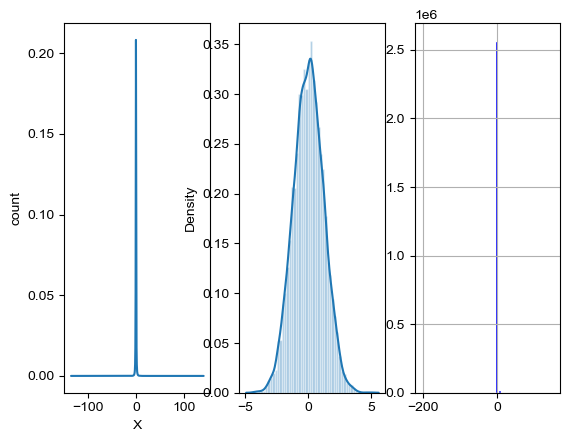

<Figure size 3000x1000 with 0 Axes>

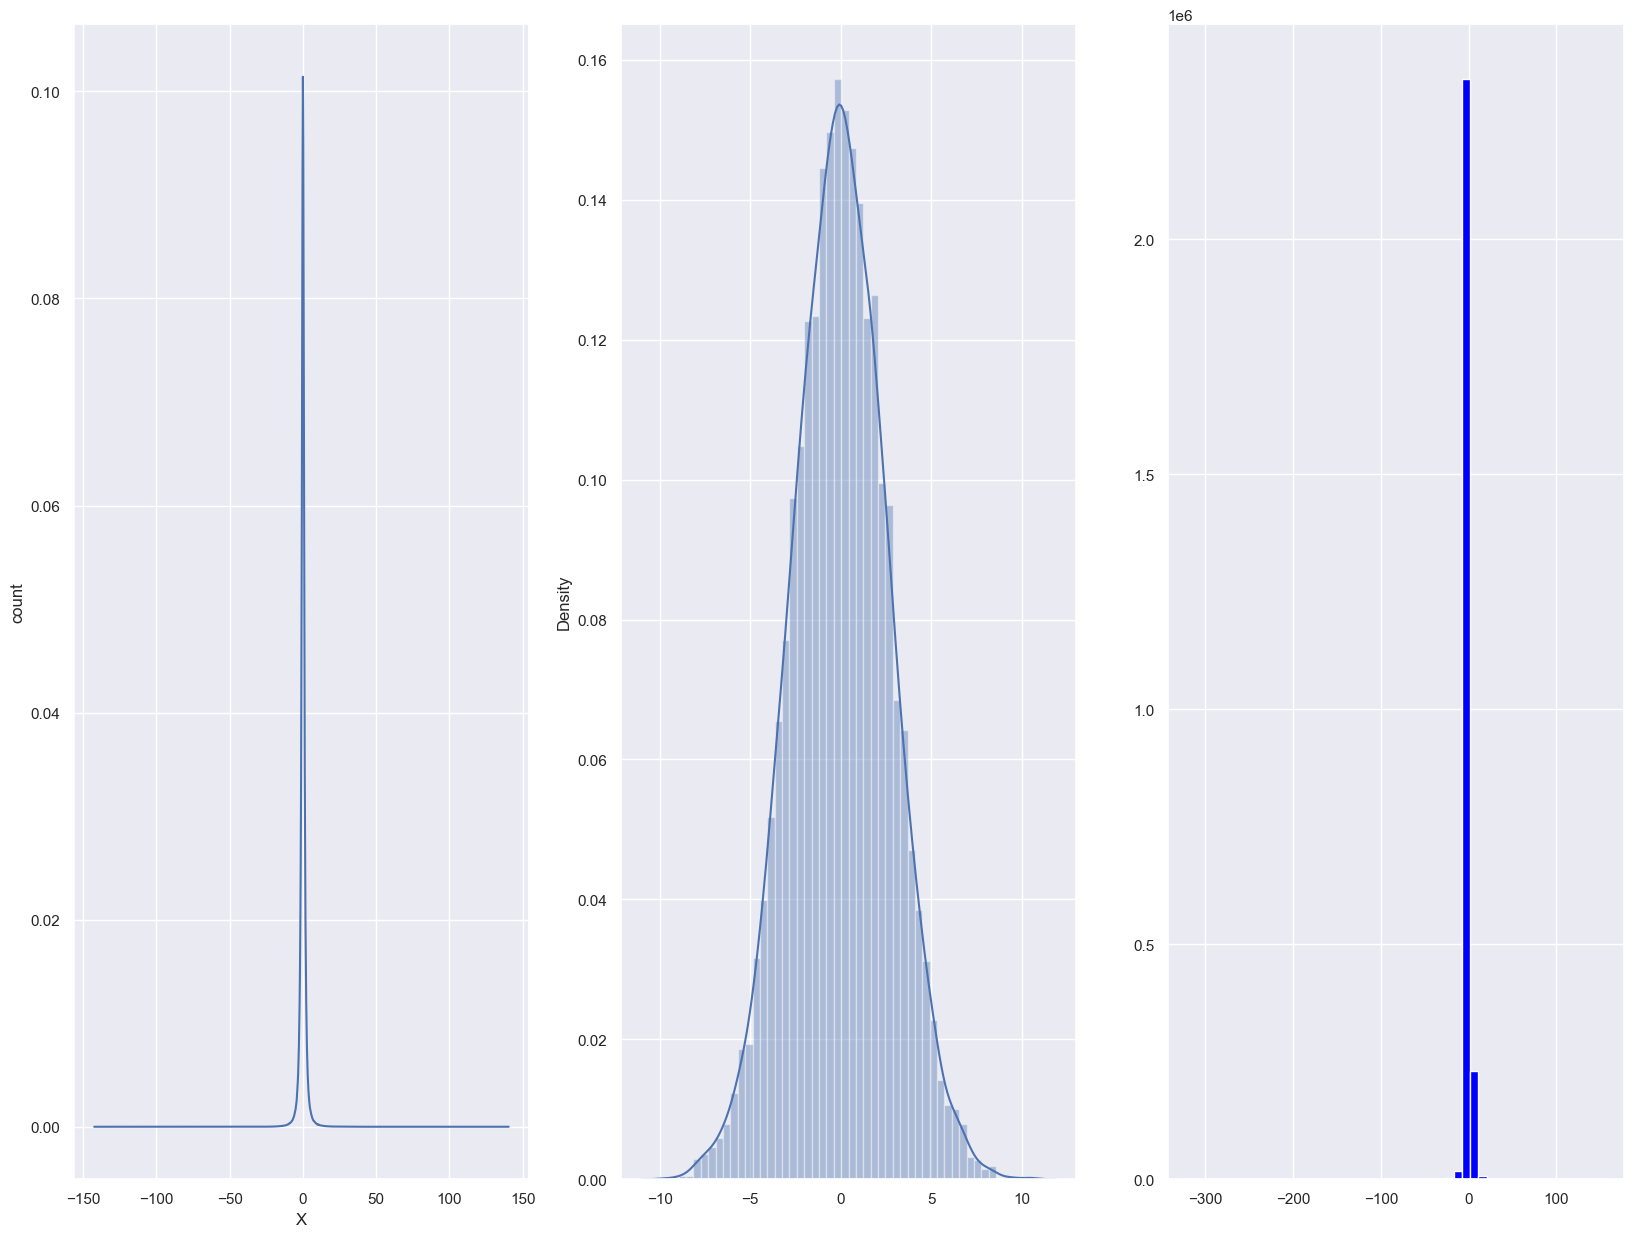

<Figure size 3000x1000 with 0 Axes>

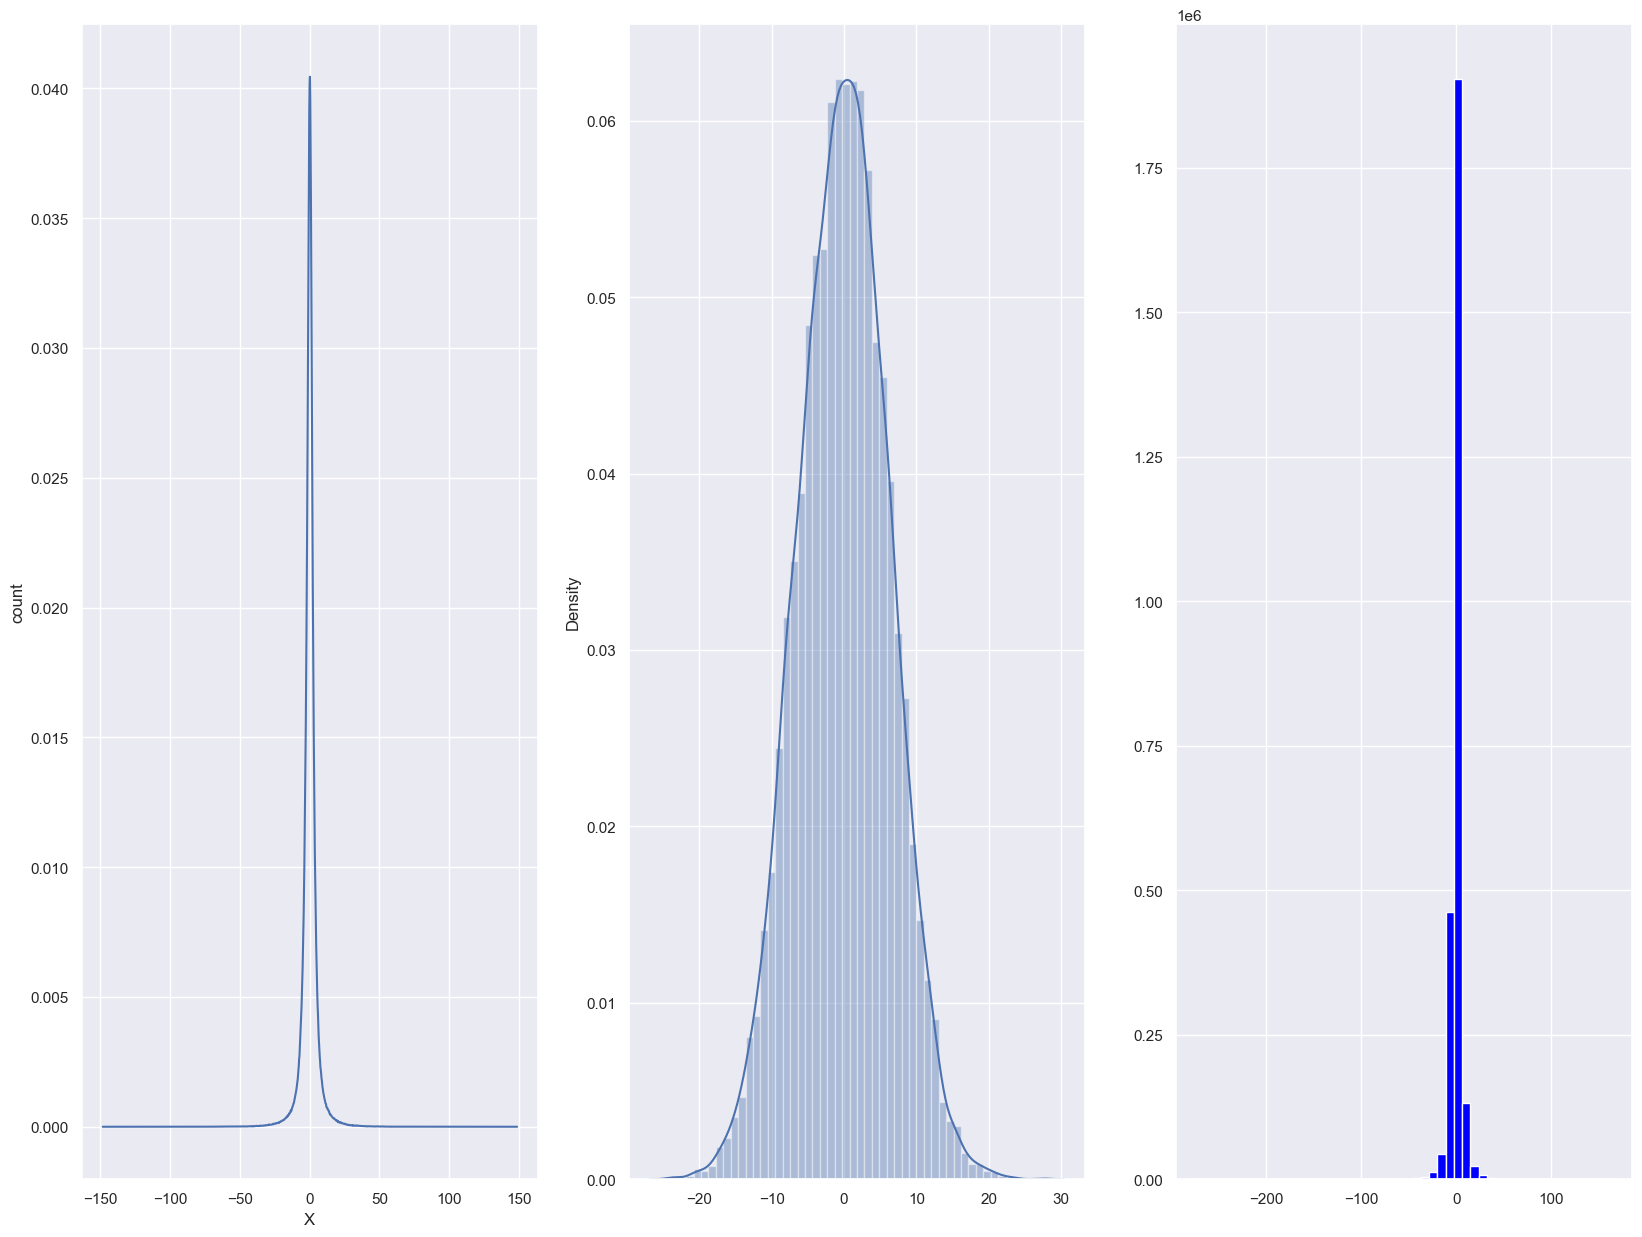

<Figure size 3000x1000 with 0 Axes>

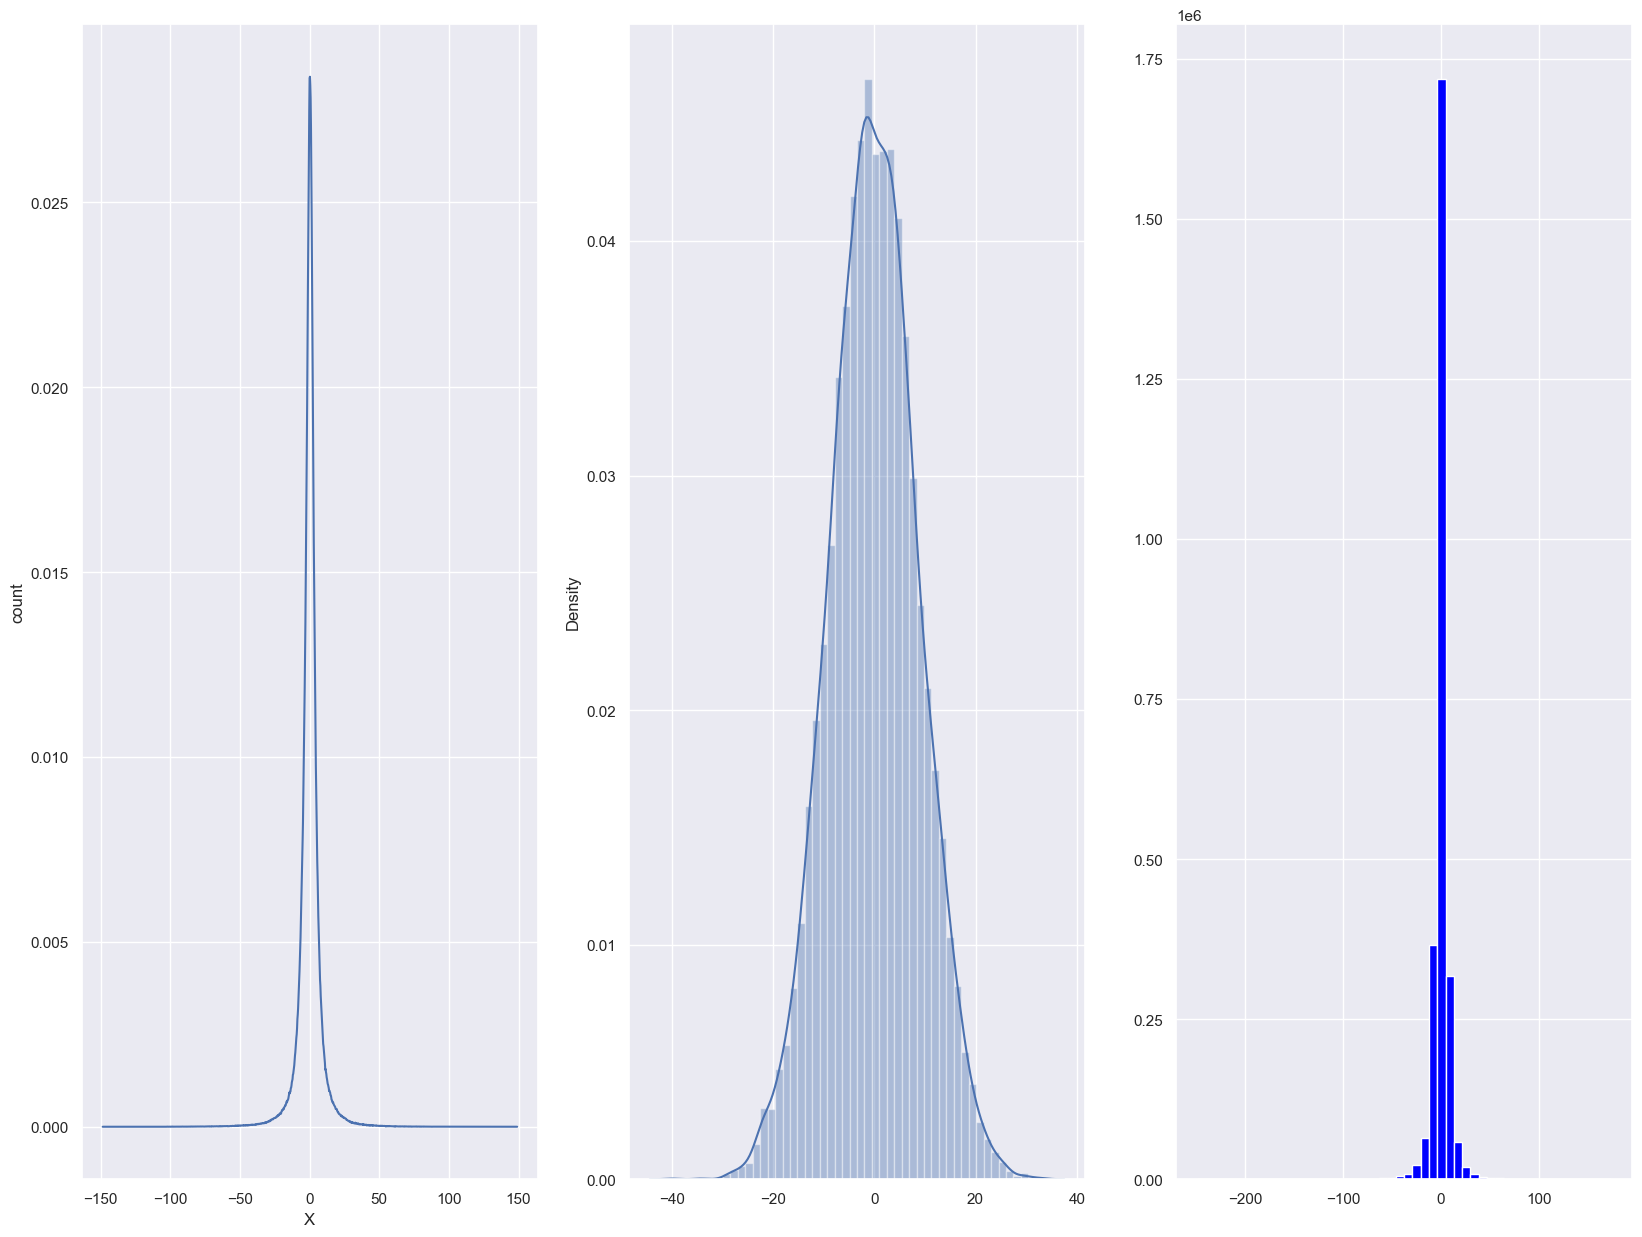

<Figure size 3000x1000 with 0 Axes>

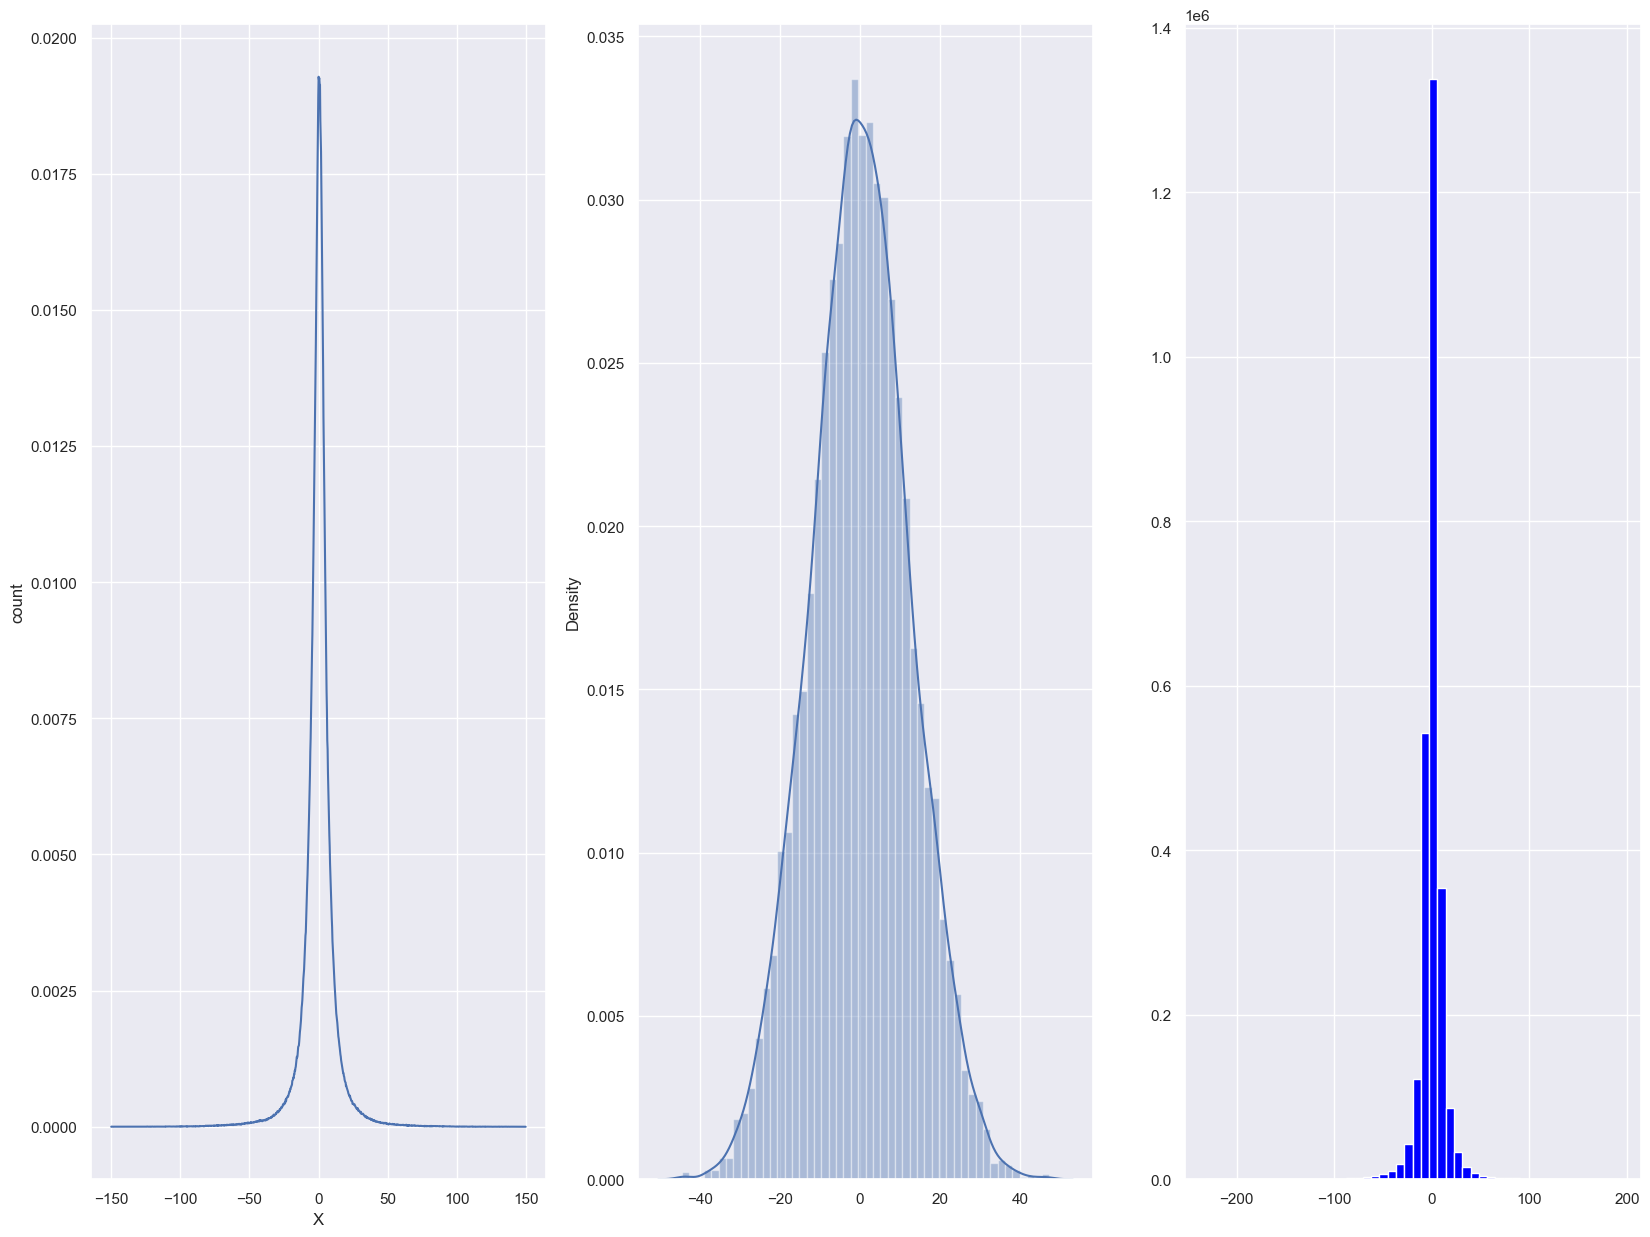

<Figure size 3000x1000 with 0 Axes>

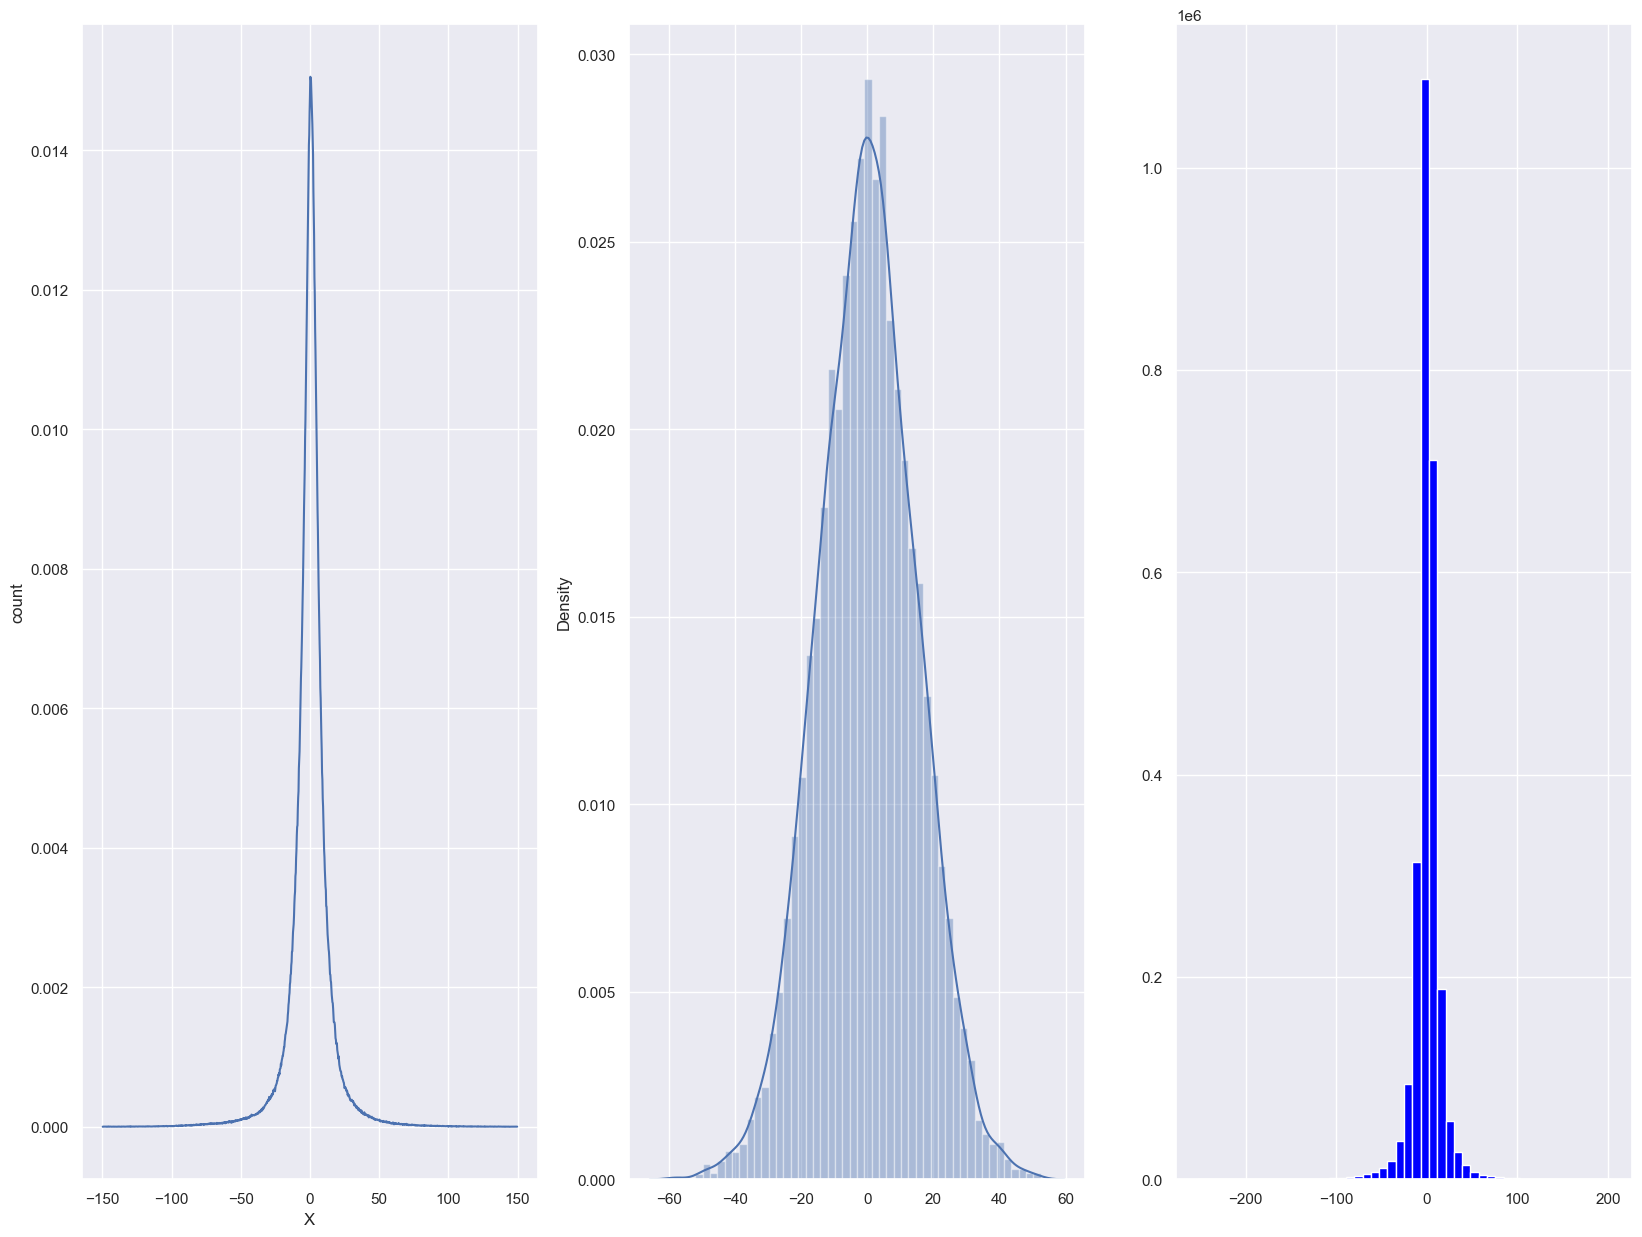

<Figure size 3000x1000 with 0 Axes>

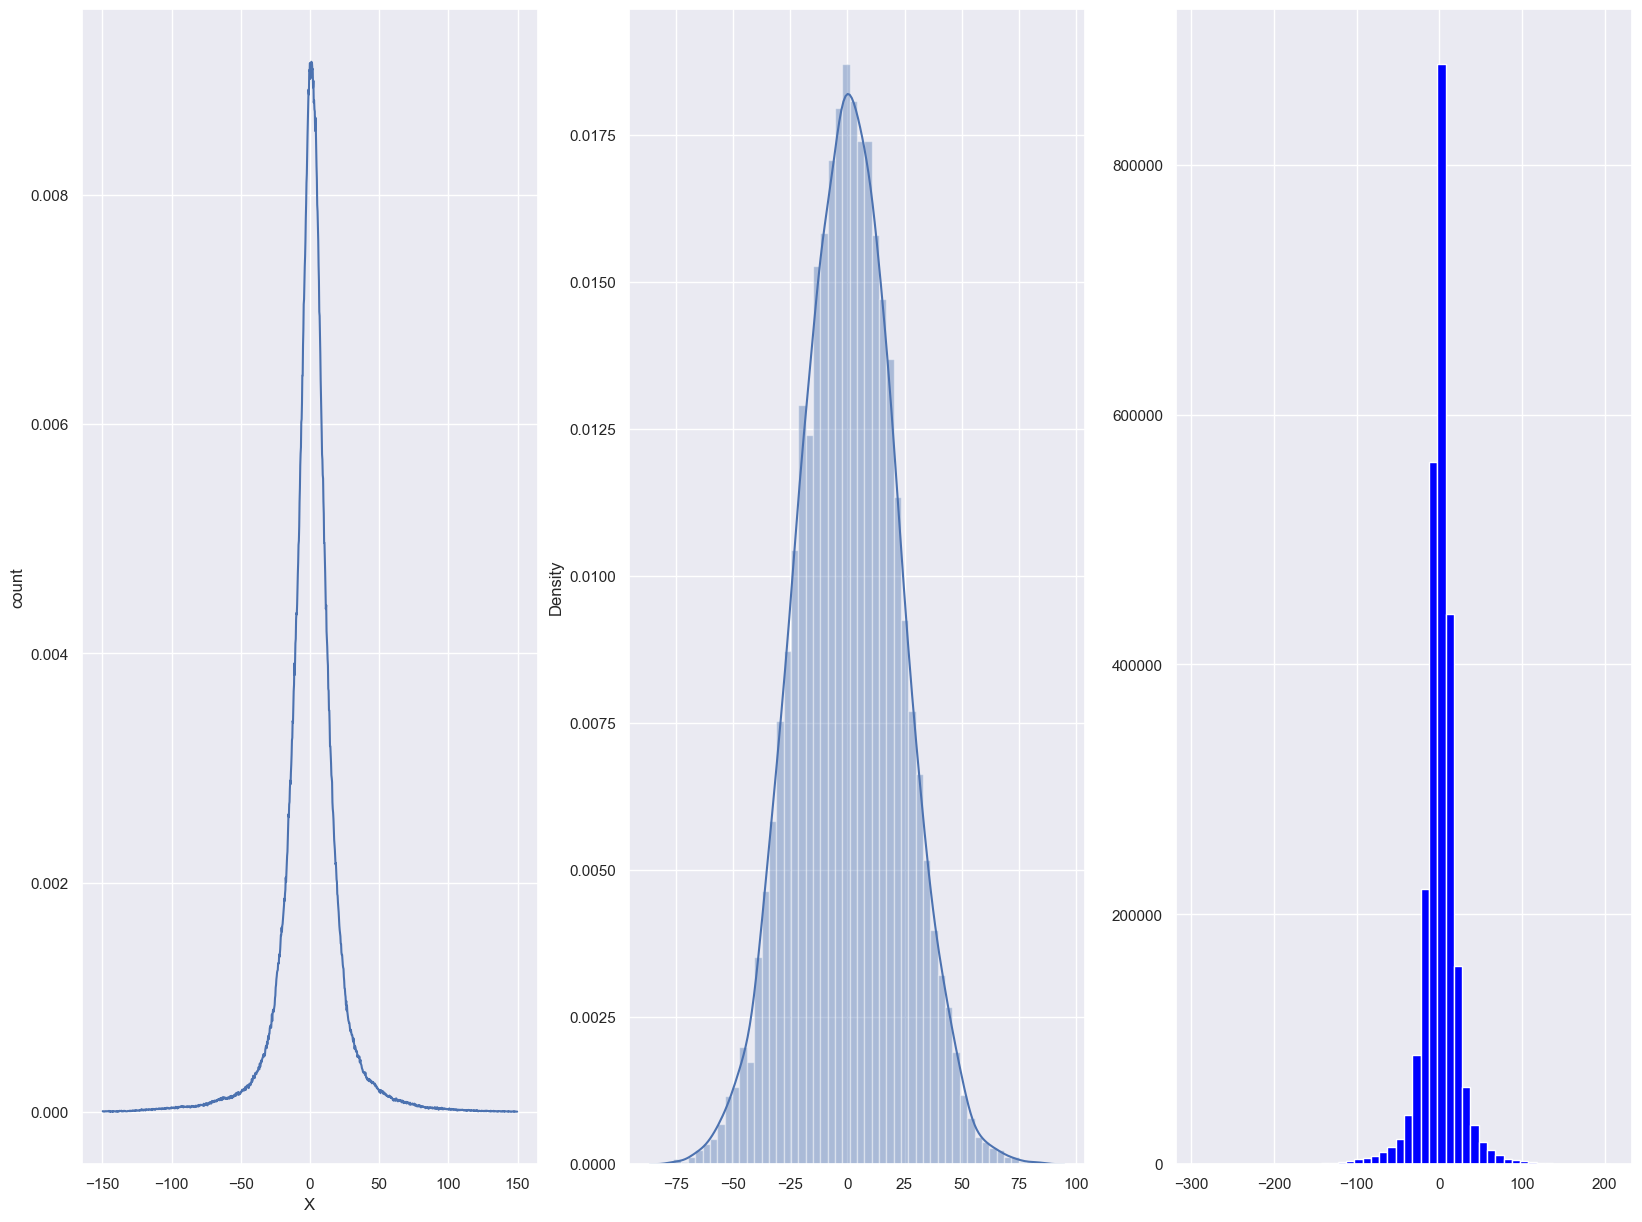

In [3]:
import warnings

warnings.filterwarnings('ignore')

# Generating plots for ES with different tau values
for tau in [1,5,30,60,120,180,360]:
    generate_plots(ES, tau)

max frequency in pdf is 0.14574158787371858 at the tau value of 1
max frequency in pdf is 0.0641087881623027 at the tau value of 5
max frequency in pdf is 0.02476333372136974 at the tau value of 30
max frequency in pdf is 0.01675627433311632 at the tau value of 60
max frequency in pdf is 0.011385850468015022 at the tau value of 120
max frequency in pdf is 0.008932310641826587 at the tau value of 180
max frequency in pdf is 0.005600946233962958 at the tau value of 360


<Figure size 3000x1000 with 0 Axes>

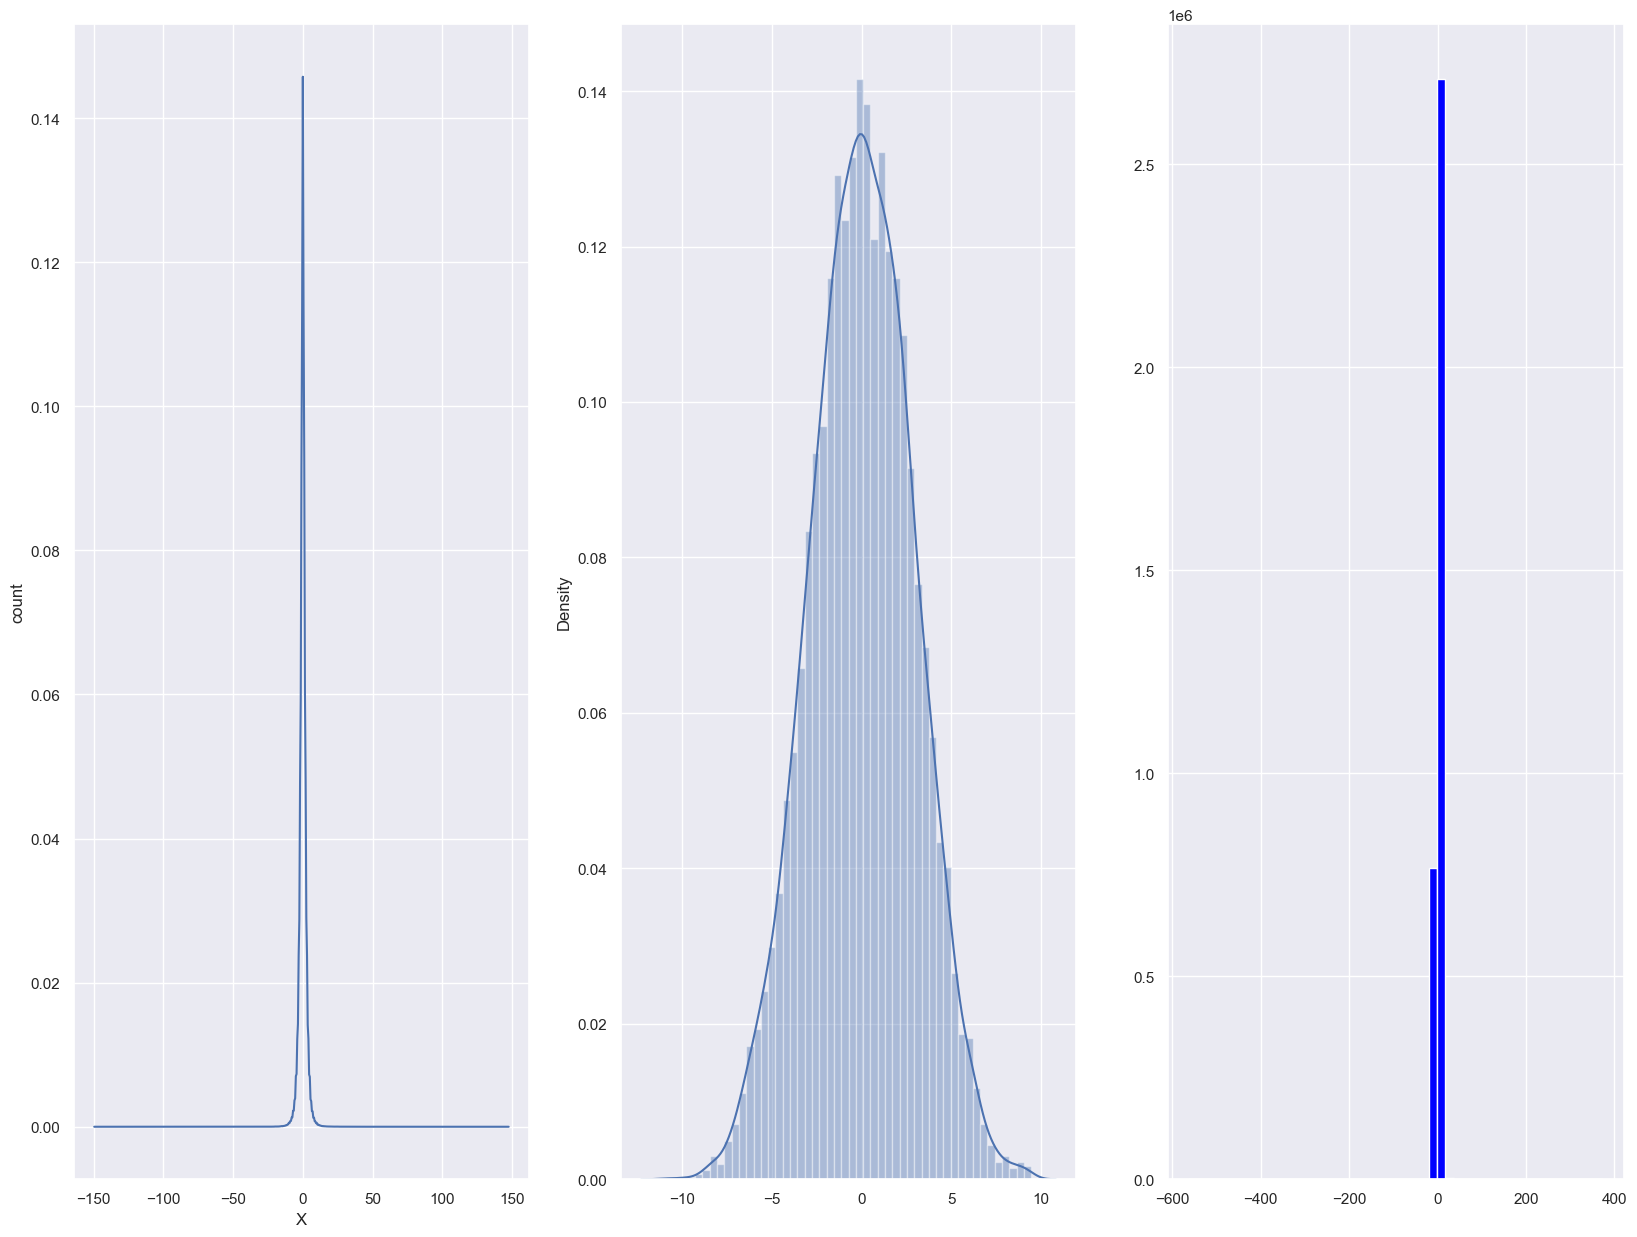

<Figure size 3000x1000 with 0 Axes>

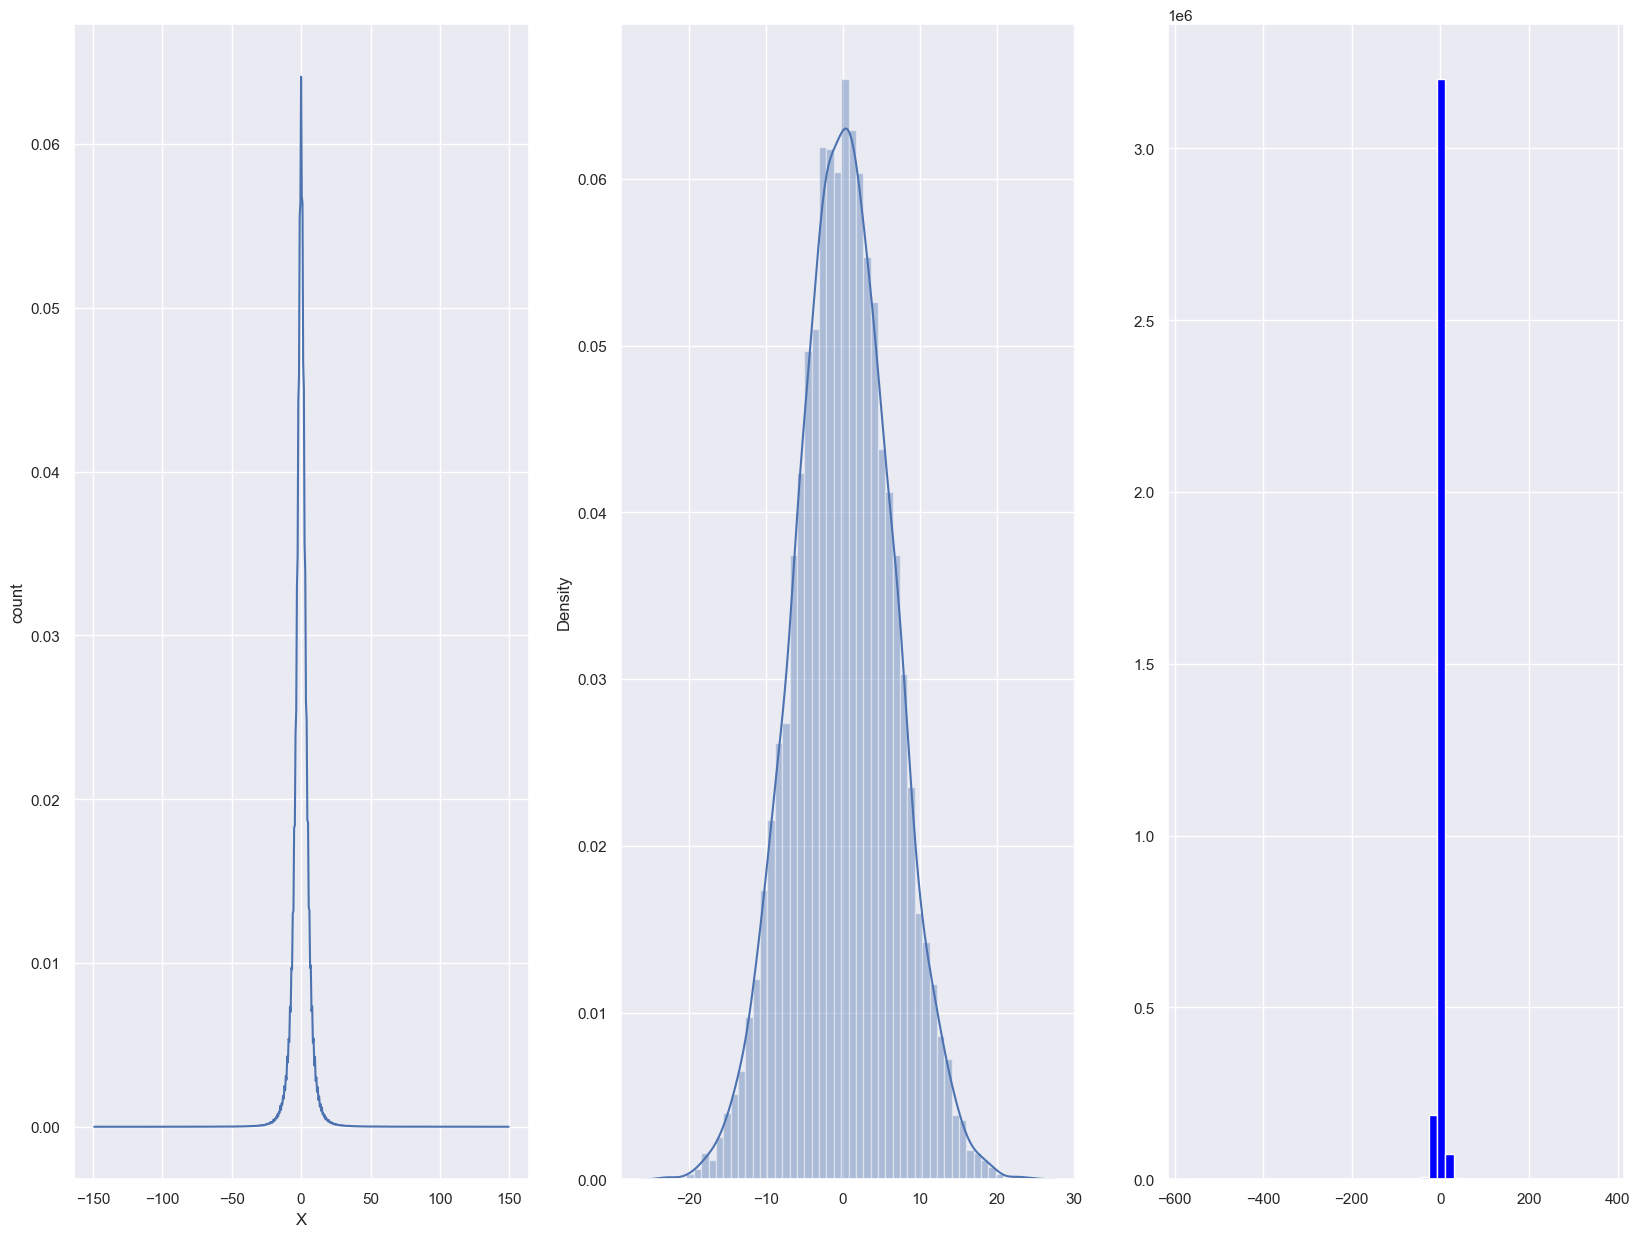

<Figure size 3000x1000 with 0 Axes>

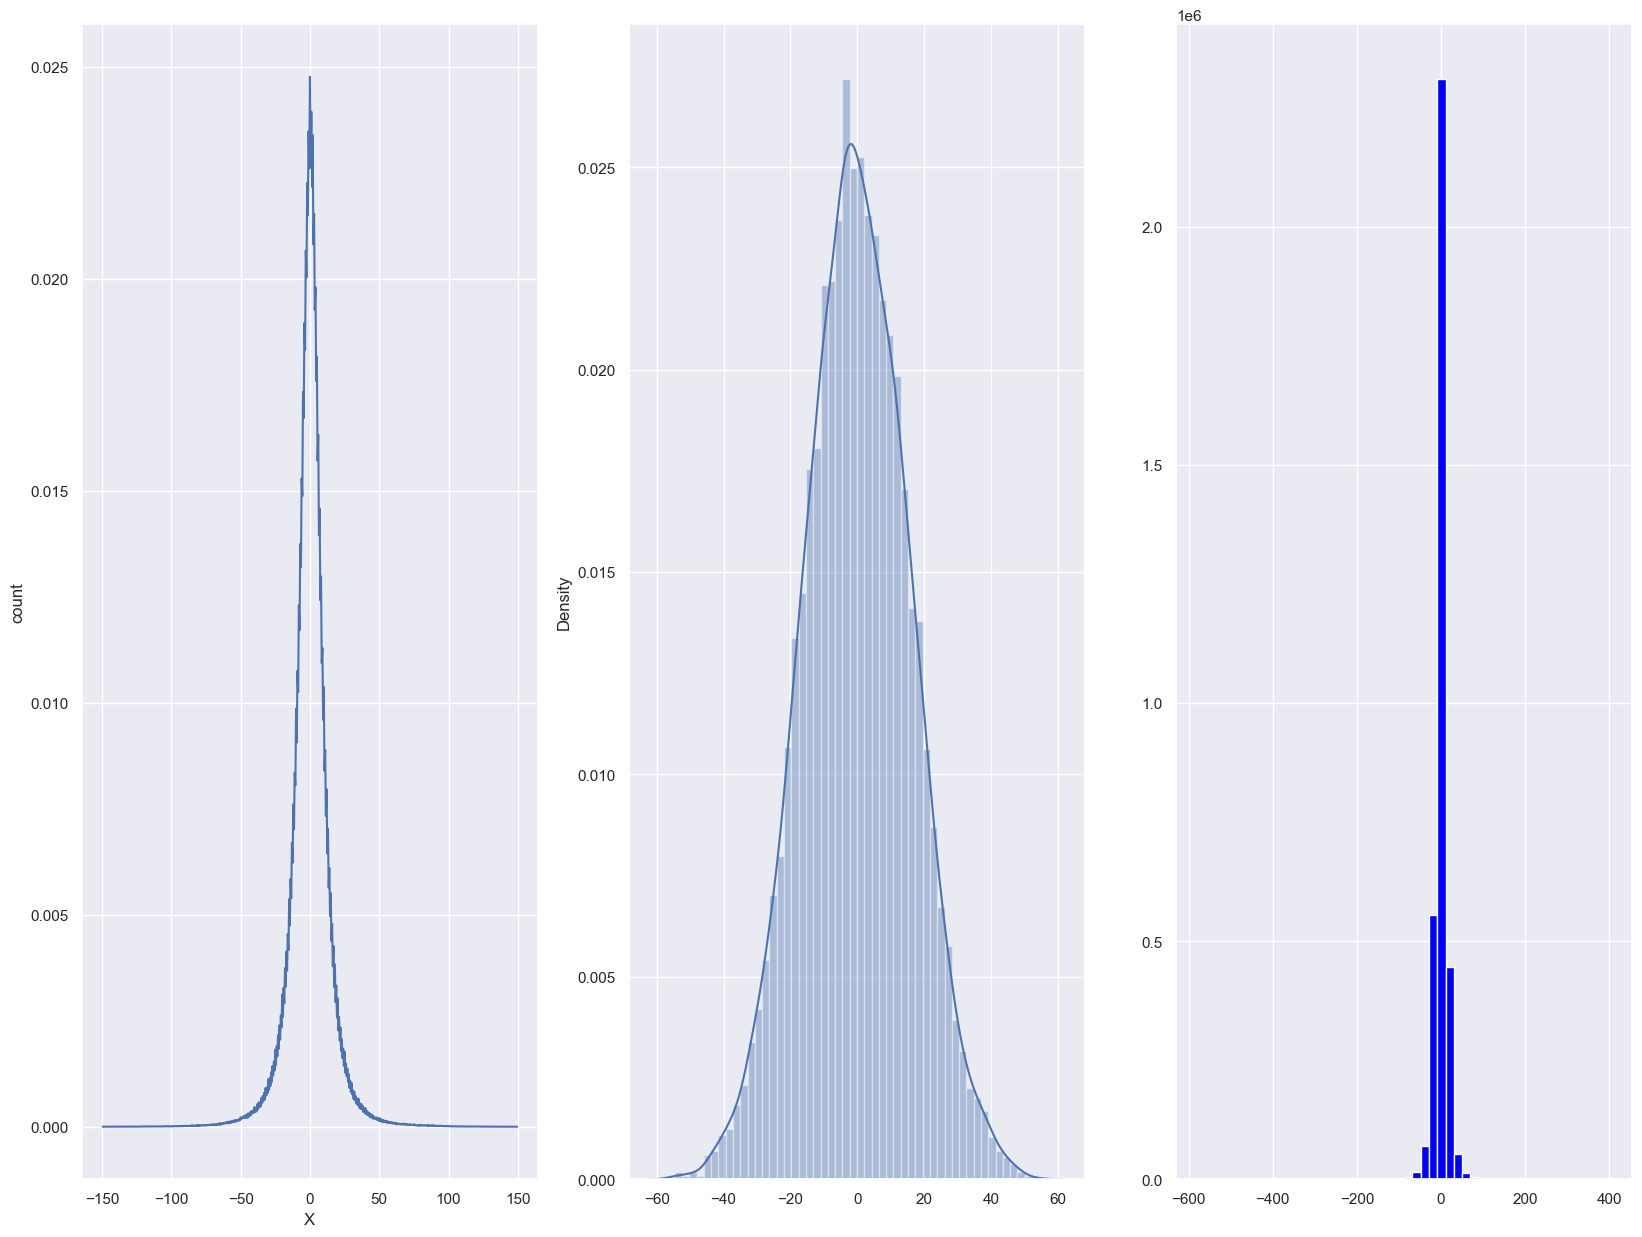

<Figure size 3000x1000 with 0 Axes>

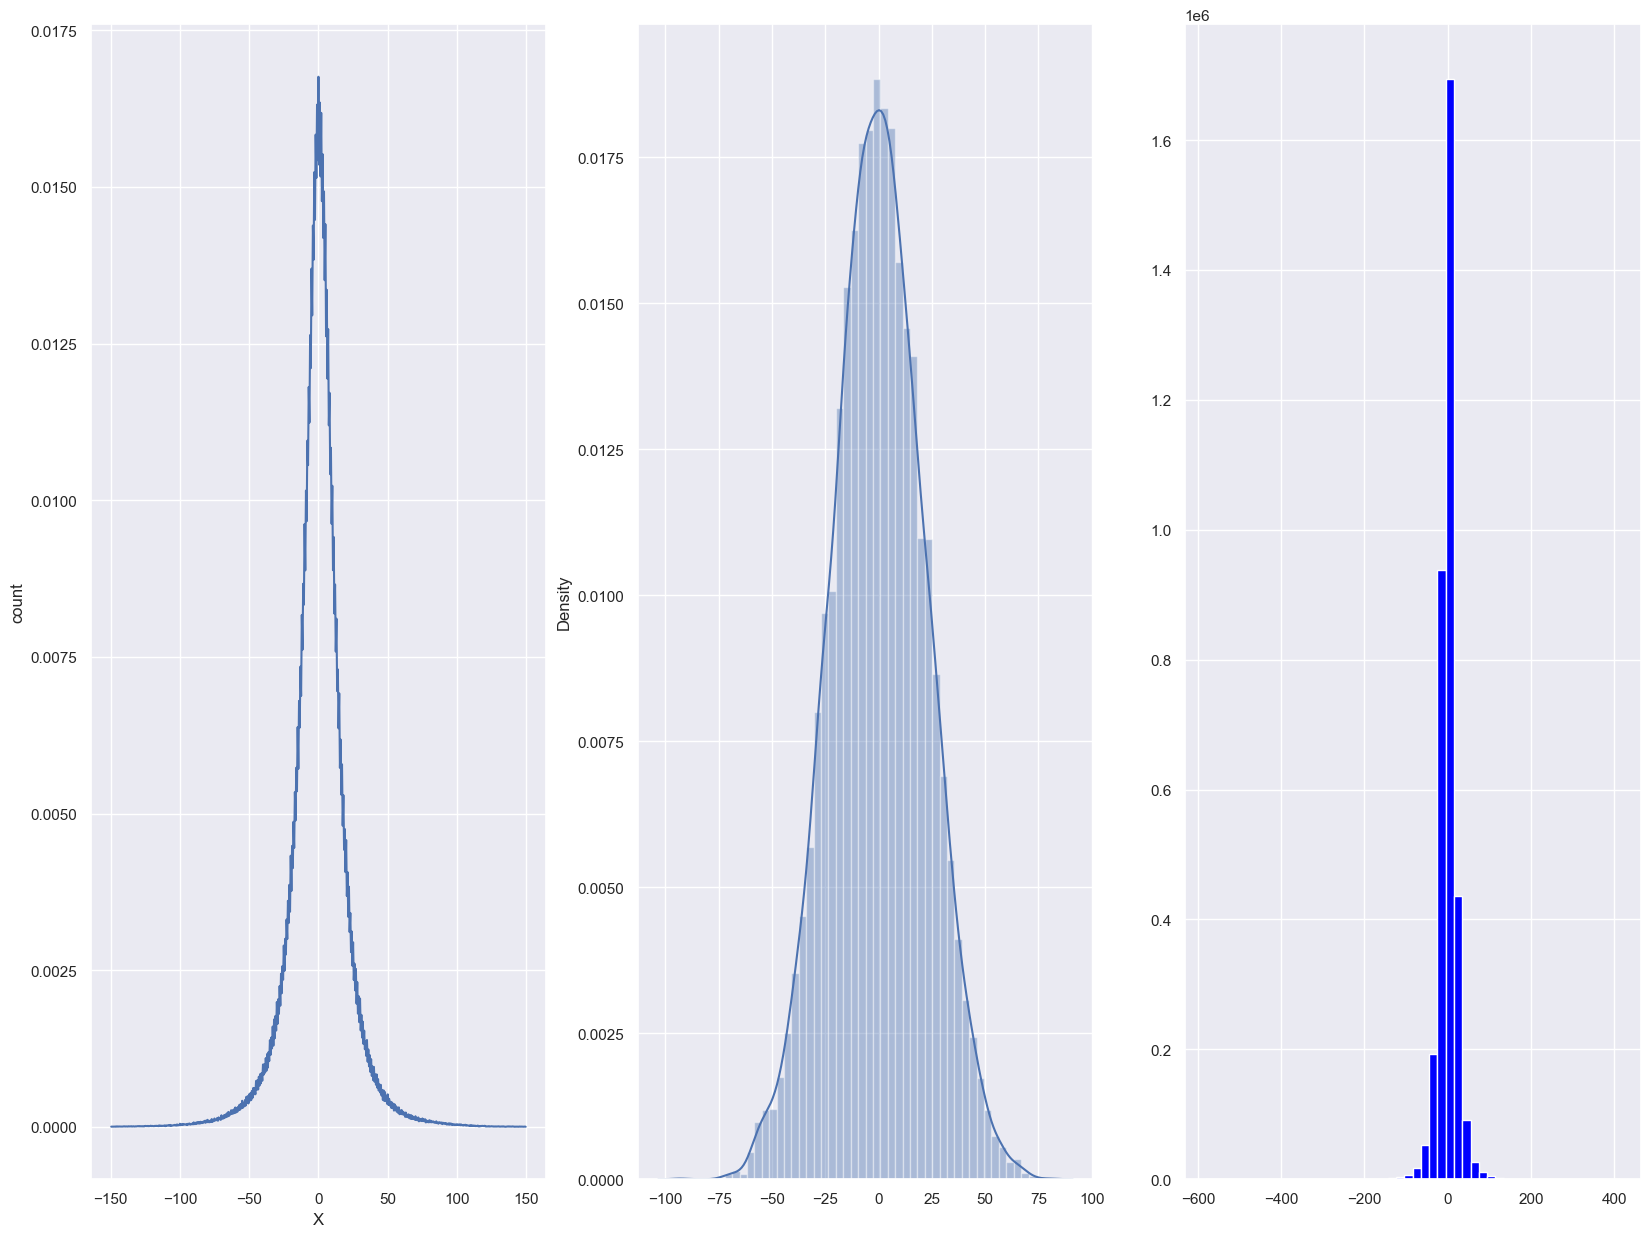

<Figure size 3000x1000 with 0 Axes>

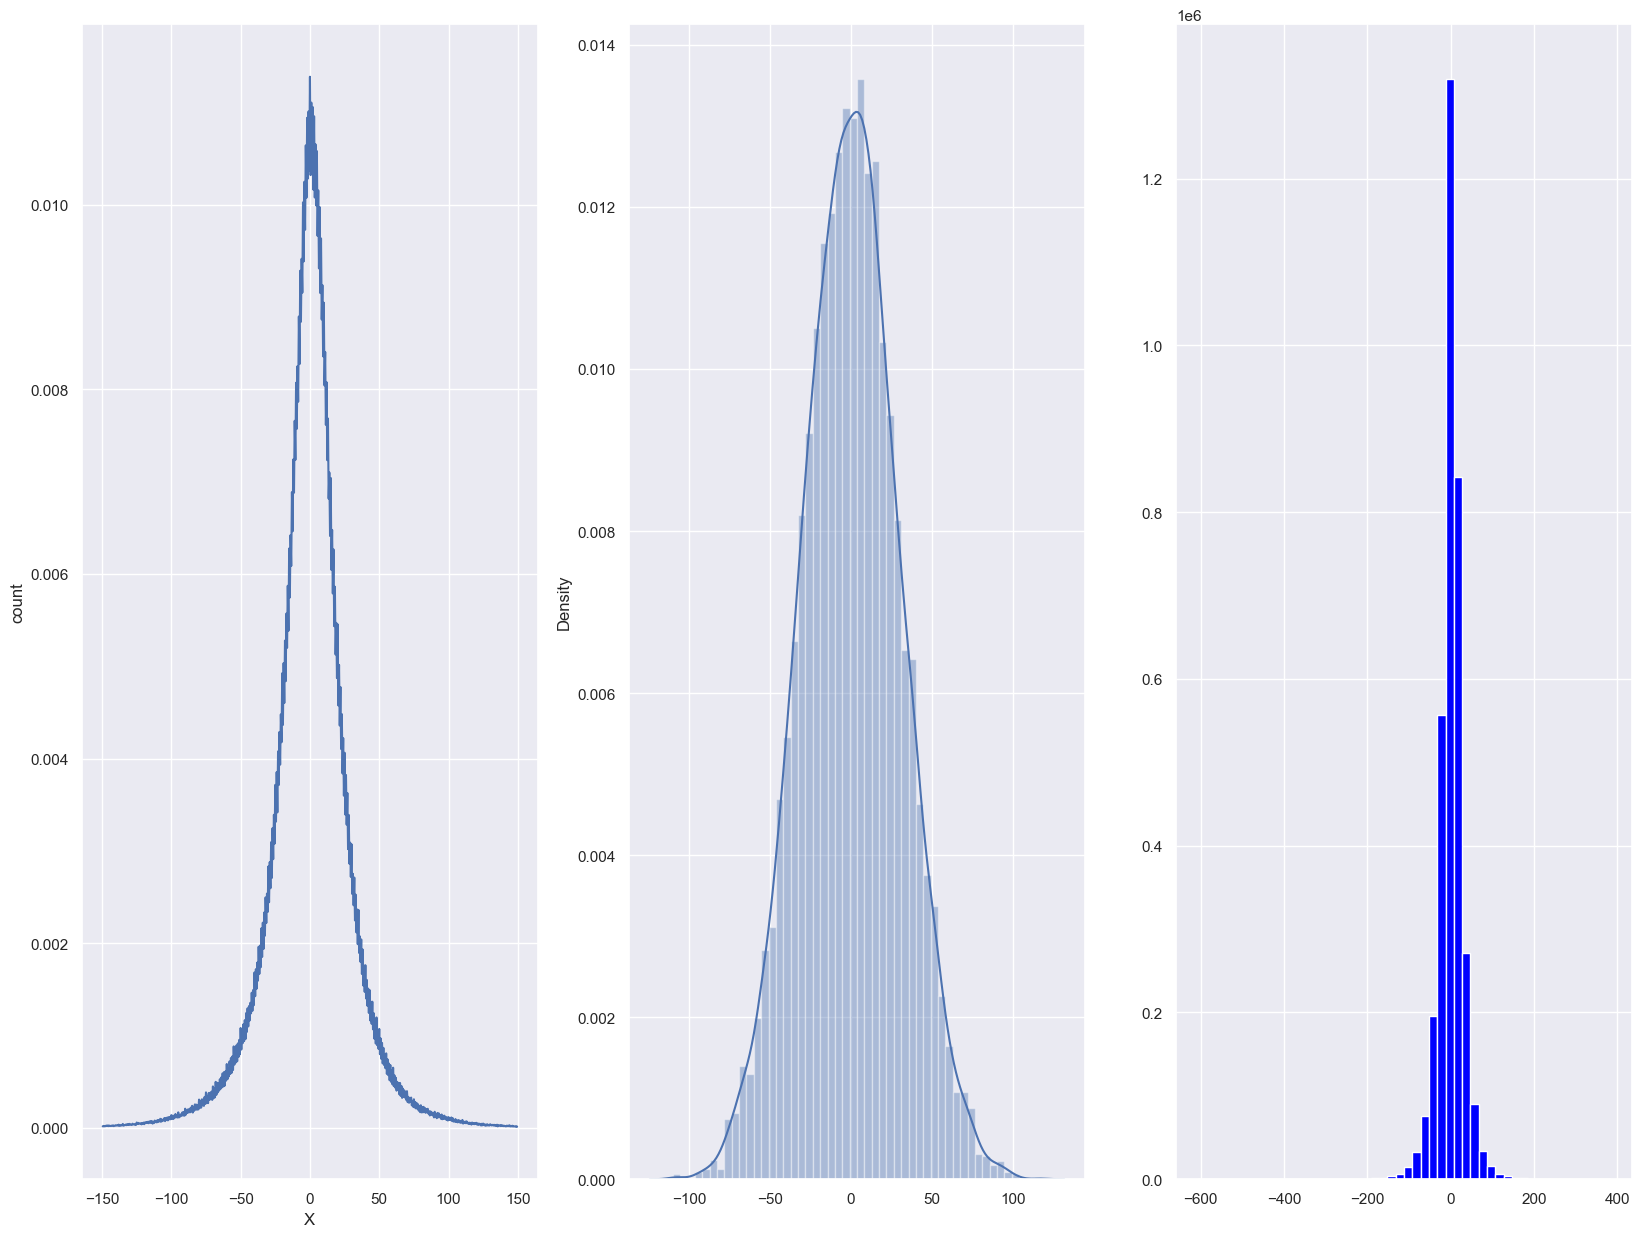

<Figure size 3000x1000 with 0 Axes>

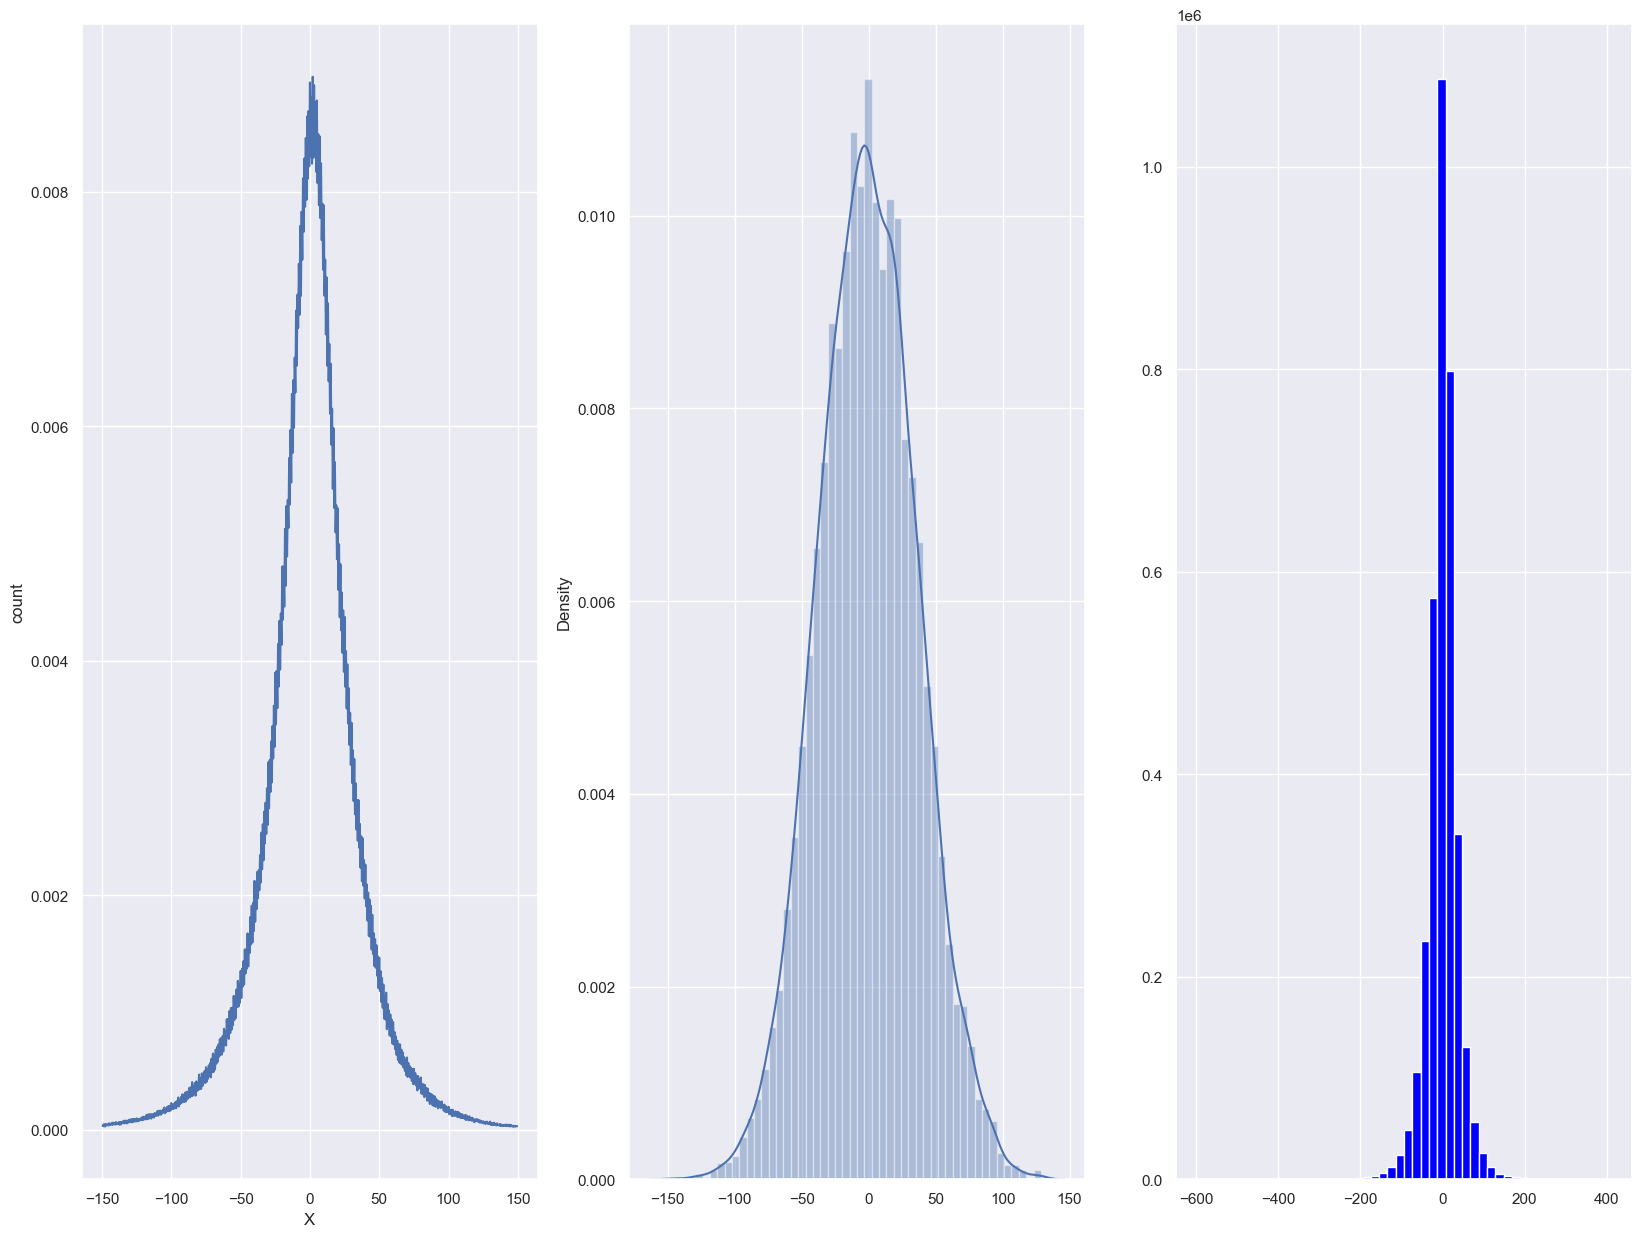

<Figure size 3000x1000 with 0 Axes>

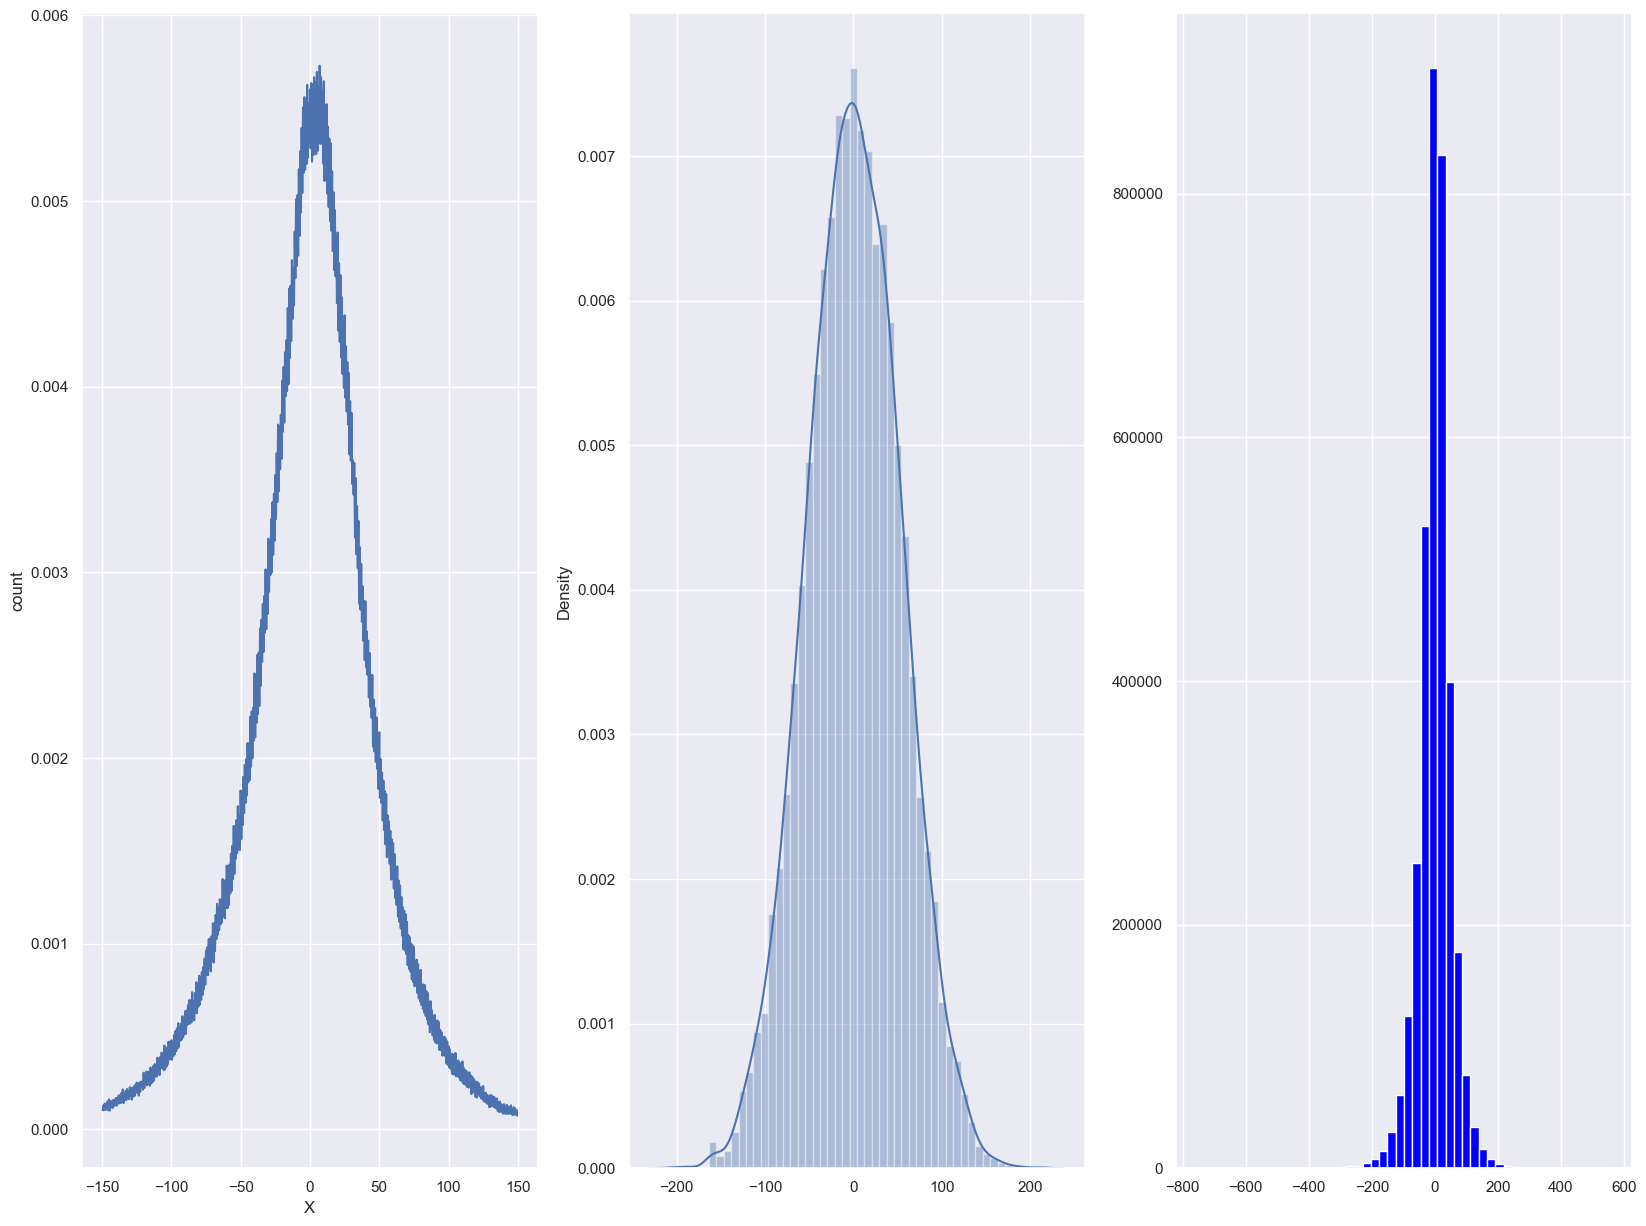

In [4]:
import warnings

warnings.filterwarnings('ignore')

# Generating plots for FT with different tau values
for tau in [1,5,30,60,120,180,360]:
    generate_plots(FT, tau)

- It is easy to notice that log(tau) and log(P(x=0)) possess a linear relationship with the slope = alpha.
- Note: P here denotes the empirically obtained pdf of delta_p
- From our solution to problem 3, we know that ...
$$P_{\alpha,\tau}(0,\tau) = \frac{1}{\gamma\tau^{1/\alpha}}\frac{1}{\pi\alpha}(\mathcal{T}(\frac{1}{\alpha}))$$

- Taking the ratio of the equation considering two different tau values for example gives us ...
$$\frac{P_{\alpha,\tau_1}(0,\tau_1)}{P_{\alpha,\tau_2}(0,\tau_2)} = \frac{\frac{1}{\gamma\tau_1^{1/\alpha}}\frac{1}{\pi\alpha}(\mathcal{T}(\frac{1}{\alpha}))}{\frac{1}{\gamma\tau_2^{1/\alpha}}\frac{1}{\pi\alpha}(\mathcal{T}(\frac{1}{\alpha}))} = \frac{\tau_2^{1/\alpha}}{\tau_1^{1/\alpha}}$$

$$\implies log(\frac{P_{\alpha,\tau_1}(0,\tau_1)}{P_{\alpha,\tau_2}(0,\tau_2)}) = -\frac{1}{\alpha} log(\frac{\tau_1}{\tau_2}) $$
- This makes it evident that for the same data, if we keep changing tau values, we have the following equation ...
$$log(P_{\alpha, \tau}(0,\tau)) = \beta_0 + \beta_1*log(\tau)$$
- Please note that here $\beta_1$ will signify our estimate of $\frac{-1}{\alpha}$

In [5]:
ES = pd.read_csv("ES-1min.csv")
FT = pd.read_csv("FT-1min.csv")

def get_log_p_at_x0_array(df, TAU_LIMIT):
    log_p_at_x0_array = []
    for tau in range(1,TAU_LIMIT, 5):
        df["diff"] = df["Close"].diff(periods = tau)
        df_line = df.groupby("diff").size()
        df_sum = df["Close"].shape[0]
        df_line = df_line.reset_index()
        df_line.columns = ["X","count"]
        df_line["count"] = df_line["count"]/df_sum
        df_line = df_line[(df_line["X"] > -150) & (df_line["X"] < 150)]
        x = df_line["X"]
        y = df_line["count"]
        log_p_at_x0_array.append(np.interp(0,x,y))
    return log_p_at_x0_array

In [6]:
y_array_for_regression = get_log_p_at_x0_array(ES, 2000)

In [7]:
len(y_array_for_regression)

400

In [8]:
import matplotlib.pyplot as plt
from scipy import stats

x = [np.log(i) for i in range(1,2000,5)]
y = np.log(y_array_for_regression)

slope, intercept, r, p, std_err = stats.linregress(x, y)

print("The slope is: ", slope)
print("The intercept is: ", intercept)

The slope is:  -0.6060453161813758
The intercept is:  -1.1219088338861947


In [10]:
y_array_for_regression2 = get_log_p_at_x0_array(FT, 2000)

In [11]:
len(y_array_for_regression2)

400

In [12]:
import matplotlib.pyplot as plt
from scipy import stats

x = [np.log(i) for i in range(1,2000,5)]
y = np.log(y_array_for_regression2)

slope, intercept, r, p, std_err = stats.linregress(x, y)

print("The slope is: ", slope)
print("The intercept is: ", intercept)

The slope is:  -0.5671795686018676
The intercept is:  -1.8109701736440047


In this run, the alpha is etimated as the negative of reciprocal of the slope of the linear model
- $\alpha_{ES}$ = 1.65004162775
- $\alpha_{FT}$ = 1.76311005431

In [5]:
# Calculating means and standard deviations and ultimately using another method to step by step breakdown the process that I came up with!

# Read the csv files
sp500 = pd.read_csv('ES-1min.csv')
ftse100 = pd.read_csv('FT-1min.csv')

# Compute delta_p values for S&P500 E-Mini
sp500['delta_p_ES'] = sp500['Close'].diff()


# Compute delta_p values for FTSE-100 index futures
ftse100['delta_p_FT'] = ftse100['Close'].diff()

# Concatenate the two dataframes
df1 = pd.concat([sp500['delta_p_ES'], ftse100['delta_p_FT']], axis=1)
df1 = sp500['delta_p_ES']
# Drop the first row which contains NaN values
df1 = df1.dropna()

# Compute mean and standard deviation of delta_p values
mu1 = df1.mean()
sd1 = df1.std()

print("The mean of price changes for ES is \n", mu1)
print("The standard deviation of price changes for ES is \n", sd1)

df2 = ftse100['delta_p_FT']
# Drop the first row which contains NaN values
df2 = df2.dropna()

# Compute mean and standard deviation of delta_p values
mu2 = df2.mean()
sd2 = df2.std()

print("The mean of price changes for FT is \n", mu2)
print("The standard deviation of price changes for FT is \n", sd2)

The mean of price changes for ES is 
 0.0011103707144362227
The standard deviation of price changes for ES is 
 1.1796200803030512
The mean of price changes for FT is 
 0.000992511182637579
The standard deviation of price changes for FT is 
 2.870660468452642


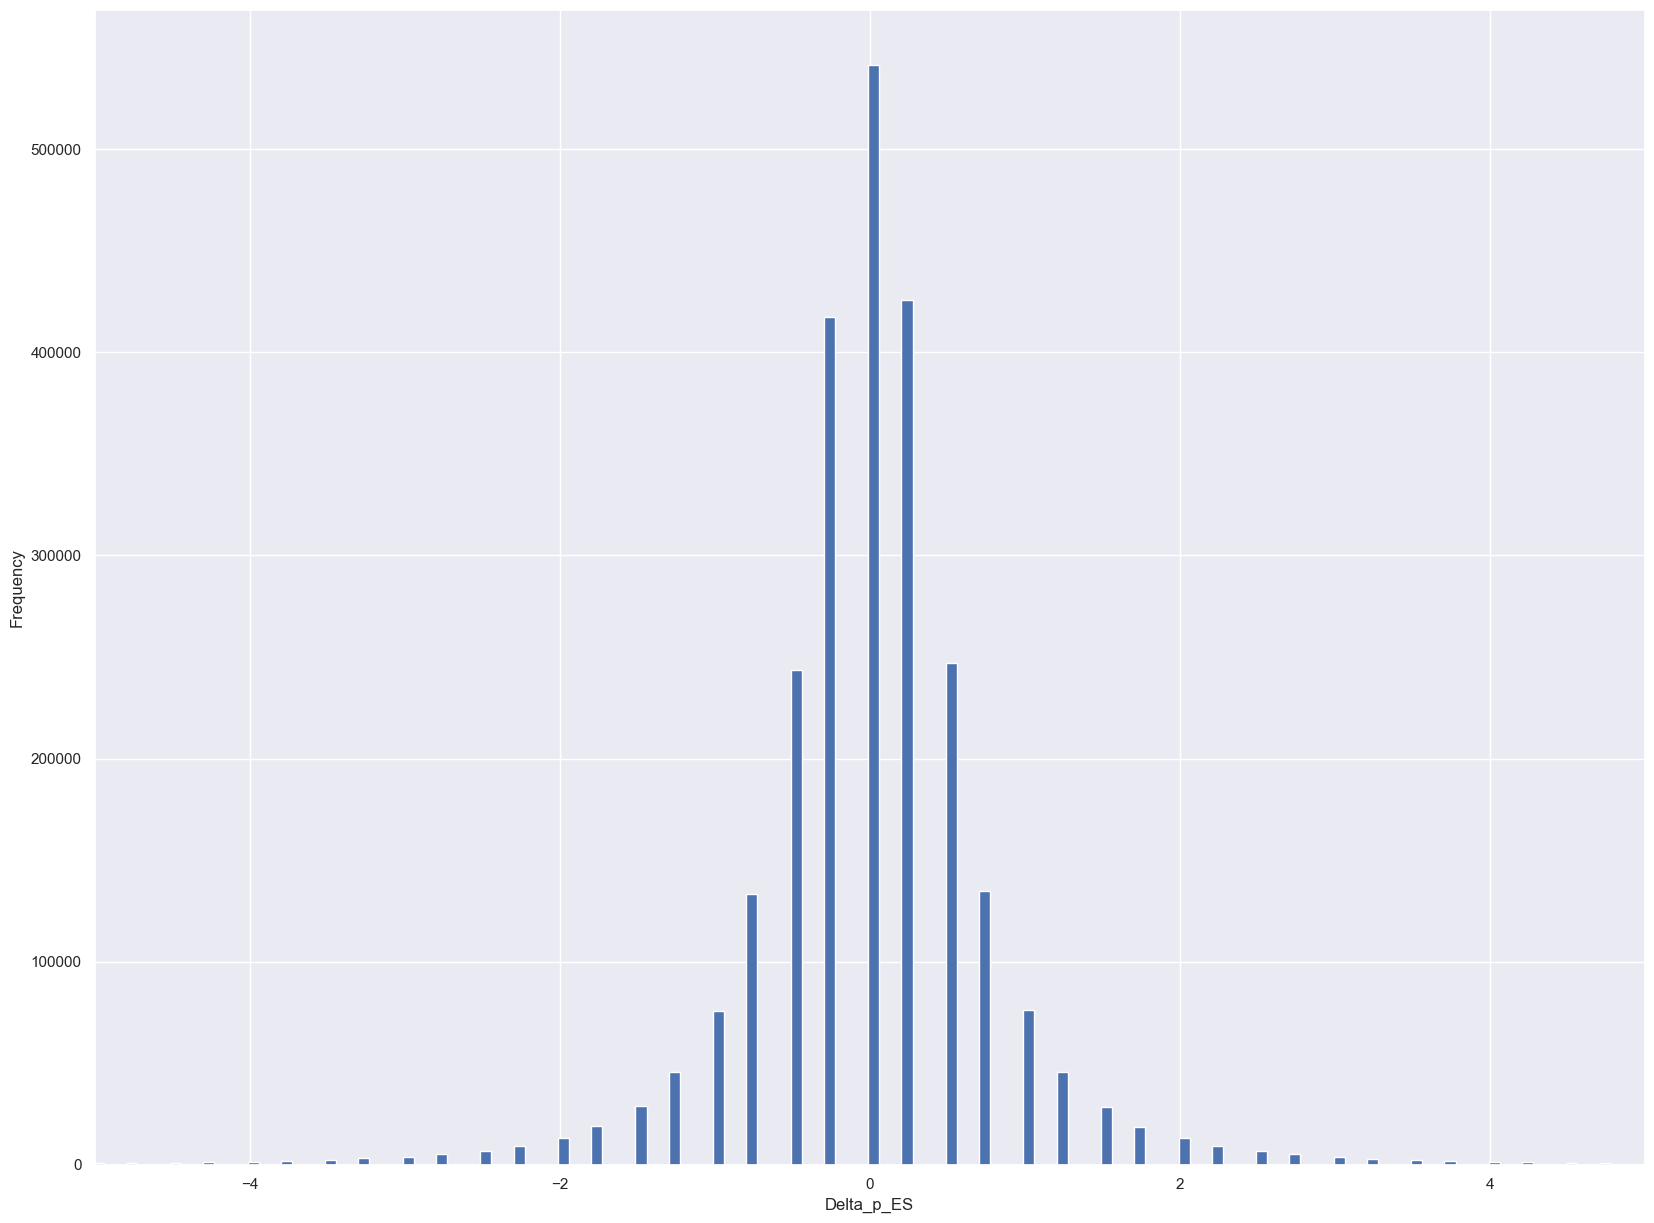

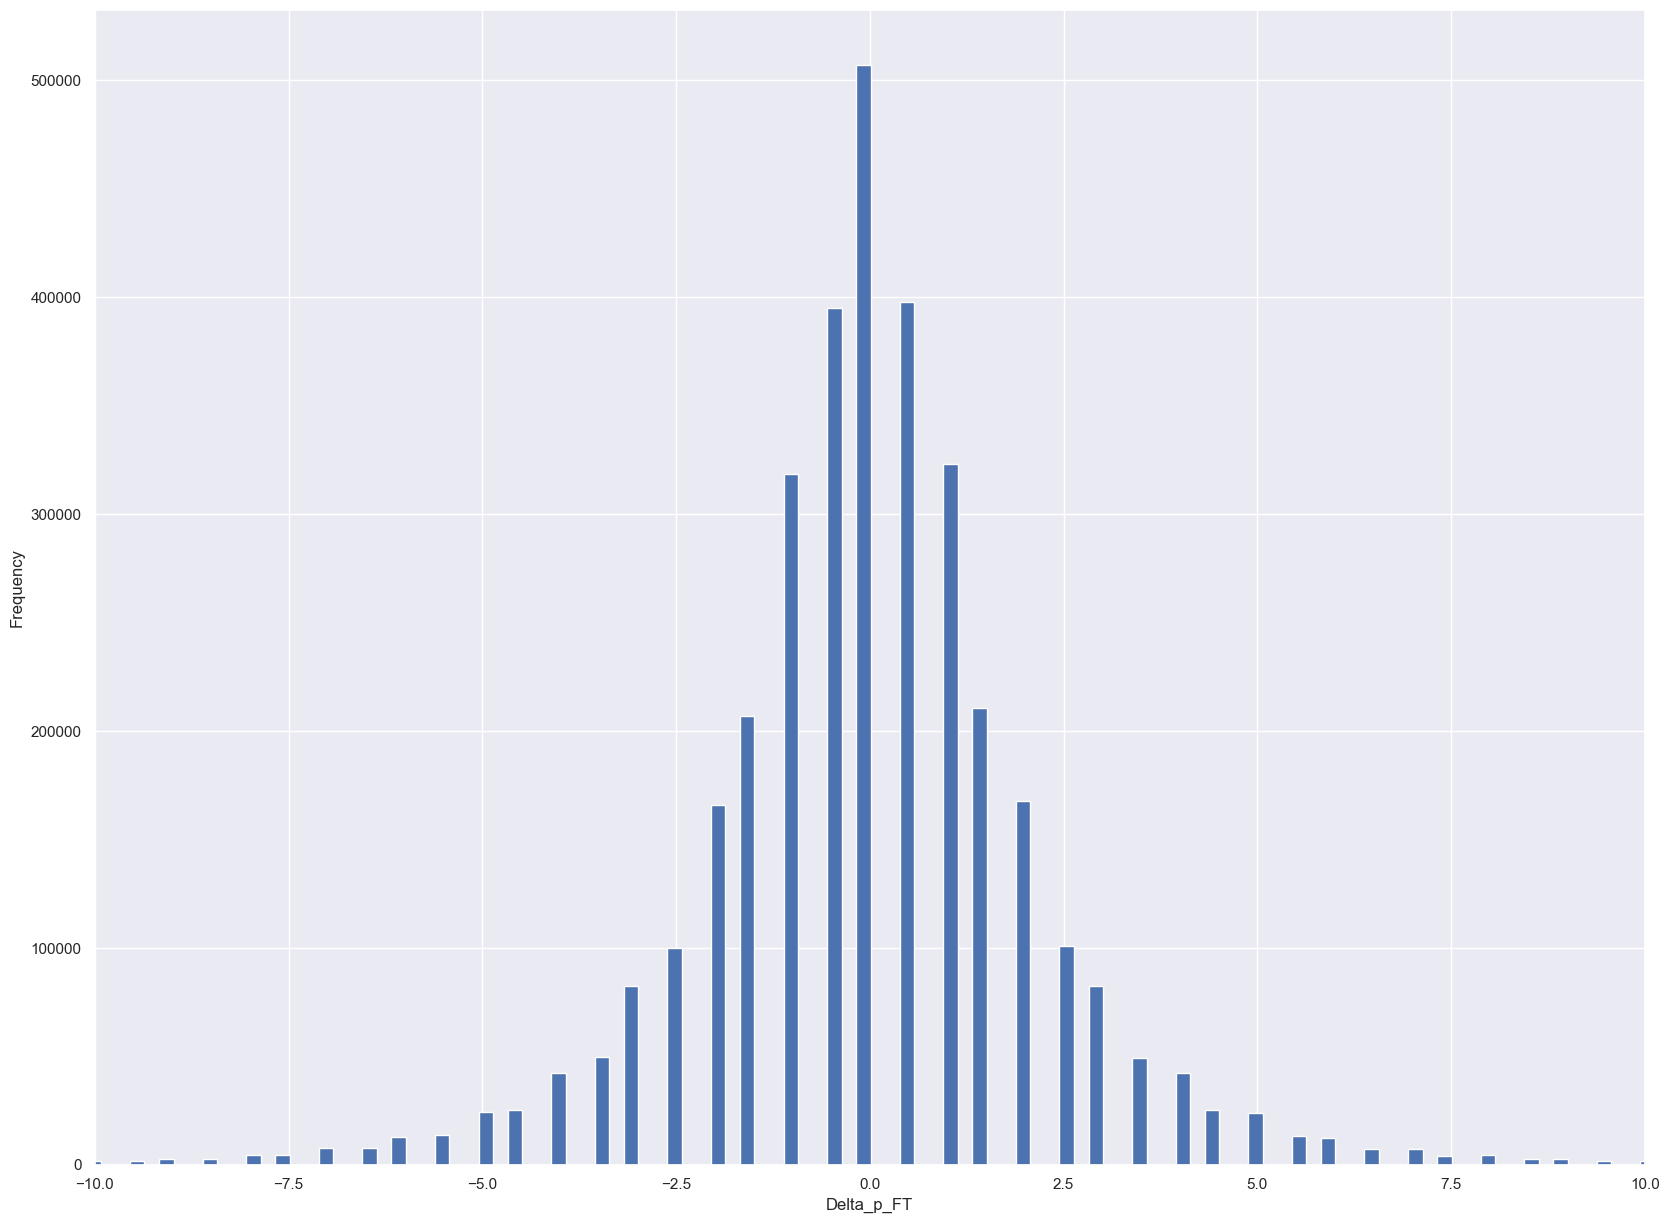

In [6]:
# Plot a histogram of the delta_p_ES values
plt.hist(df1, bins=5000)
plt.xlabel('Delta_p_ES')
plt.ylabel('Frequency')
plt.xlim(-5, 5)
plt.show()

# Plot a histogram of the delta_p_FT values
plt.hist(df2, bins=5000)
plt.xlabel('Delta_p_FT')
plt.ylabel('Frequency')
plt.xlim(-10, 10)
plt.show()

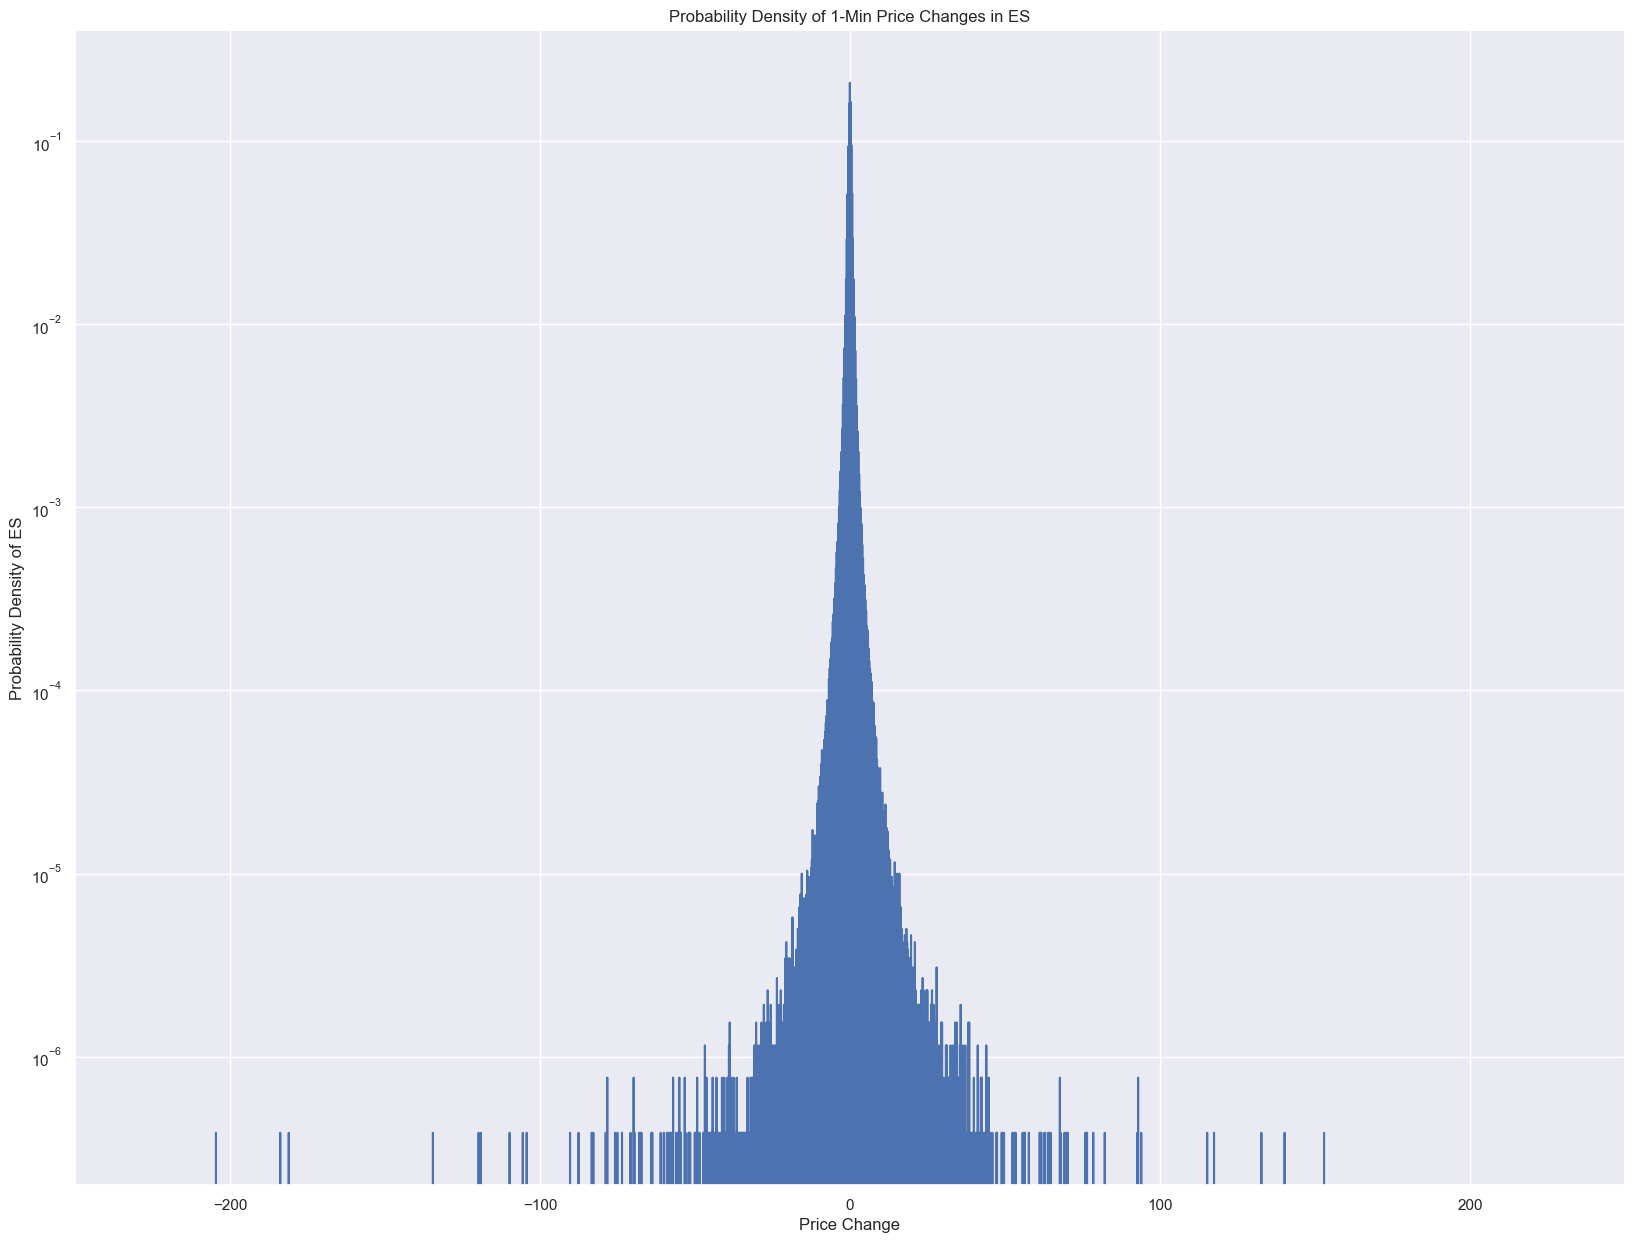

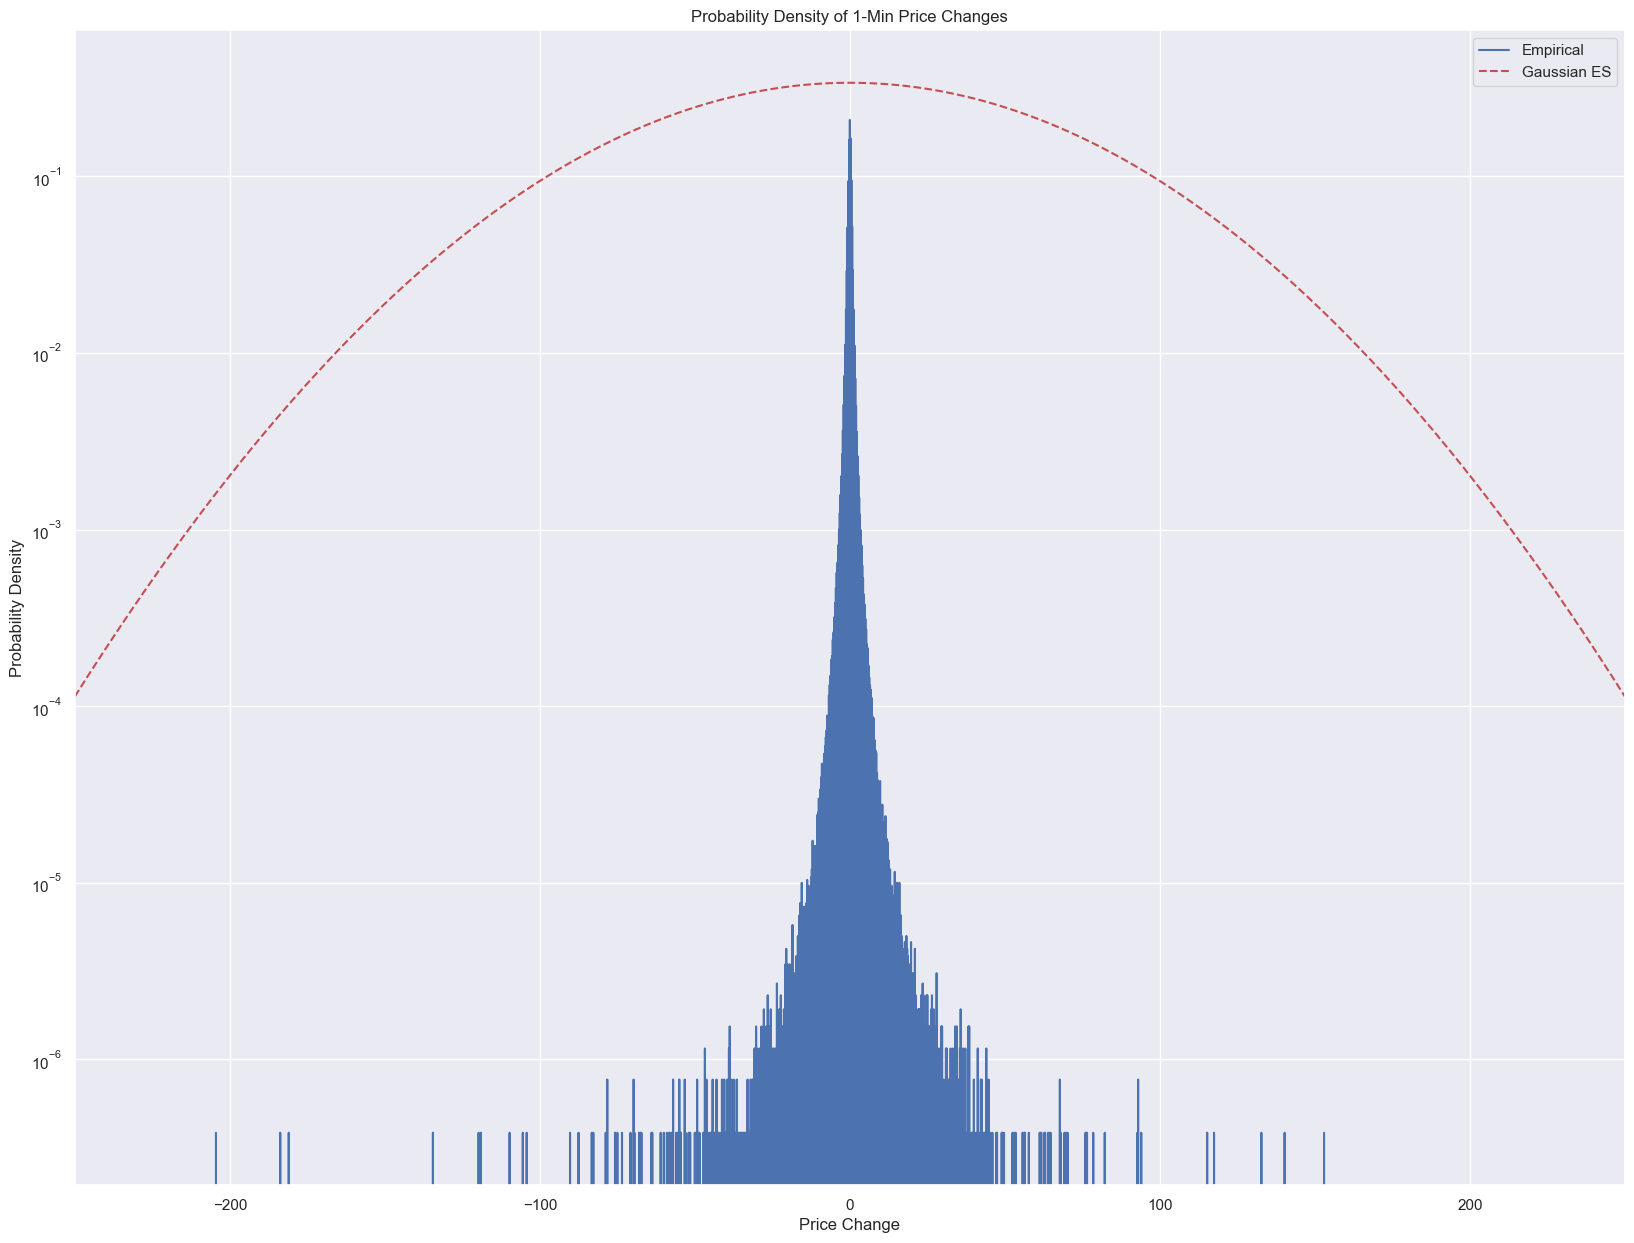

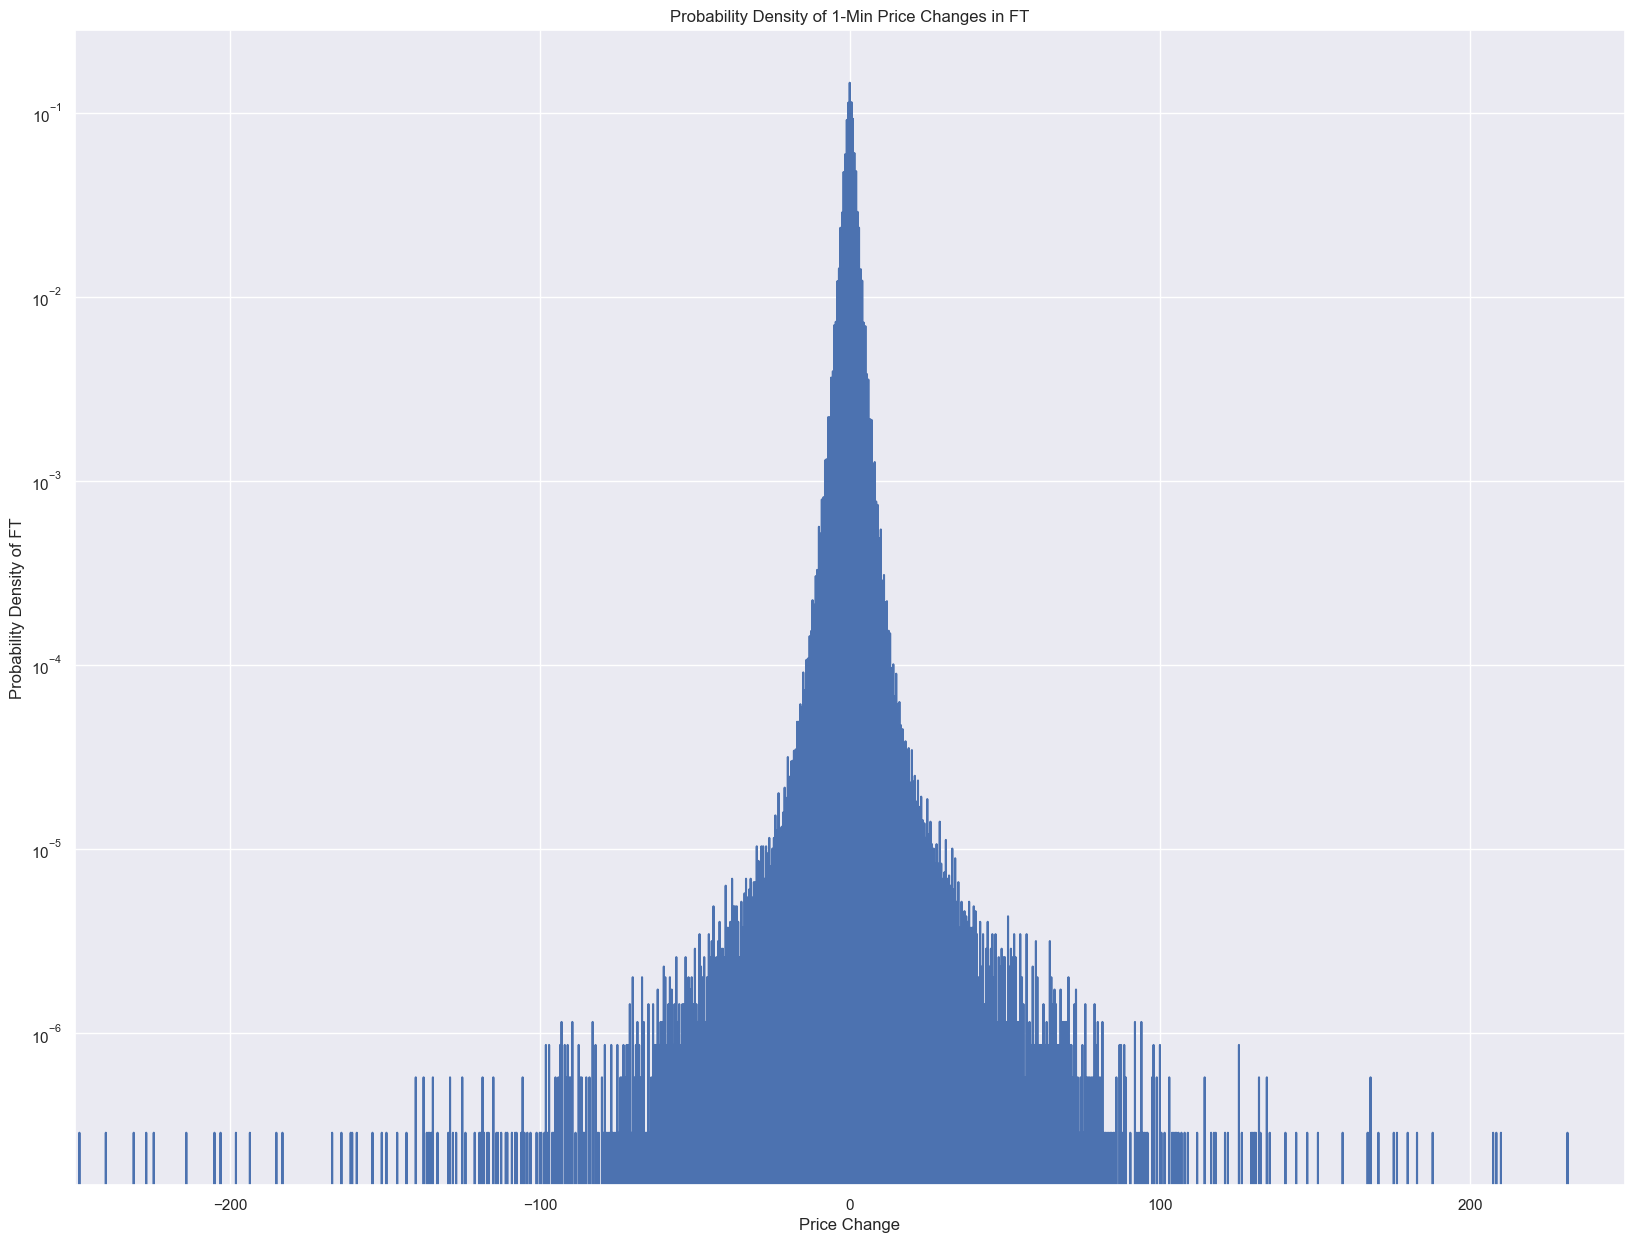

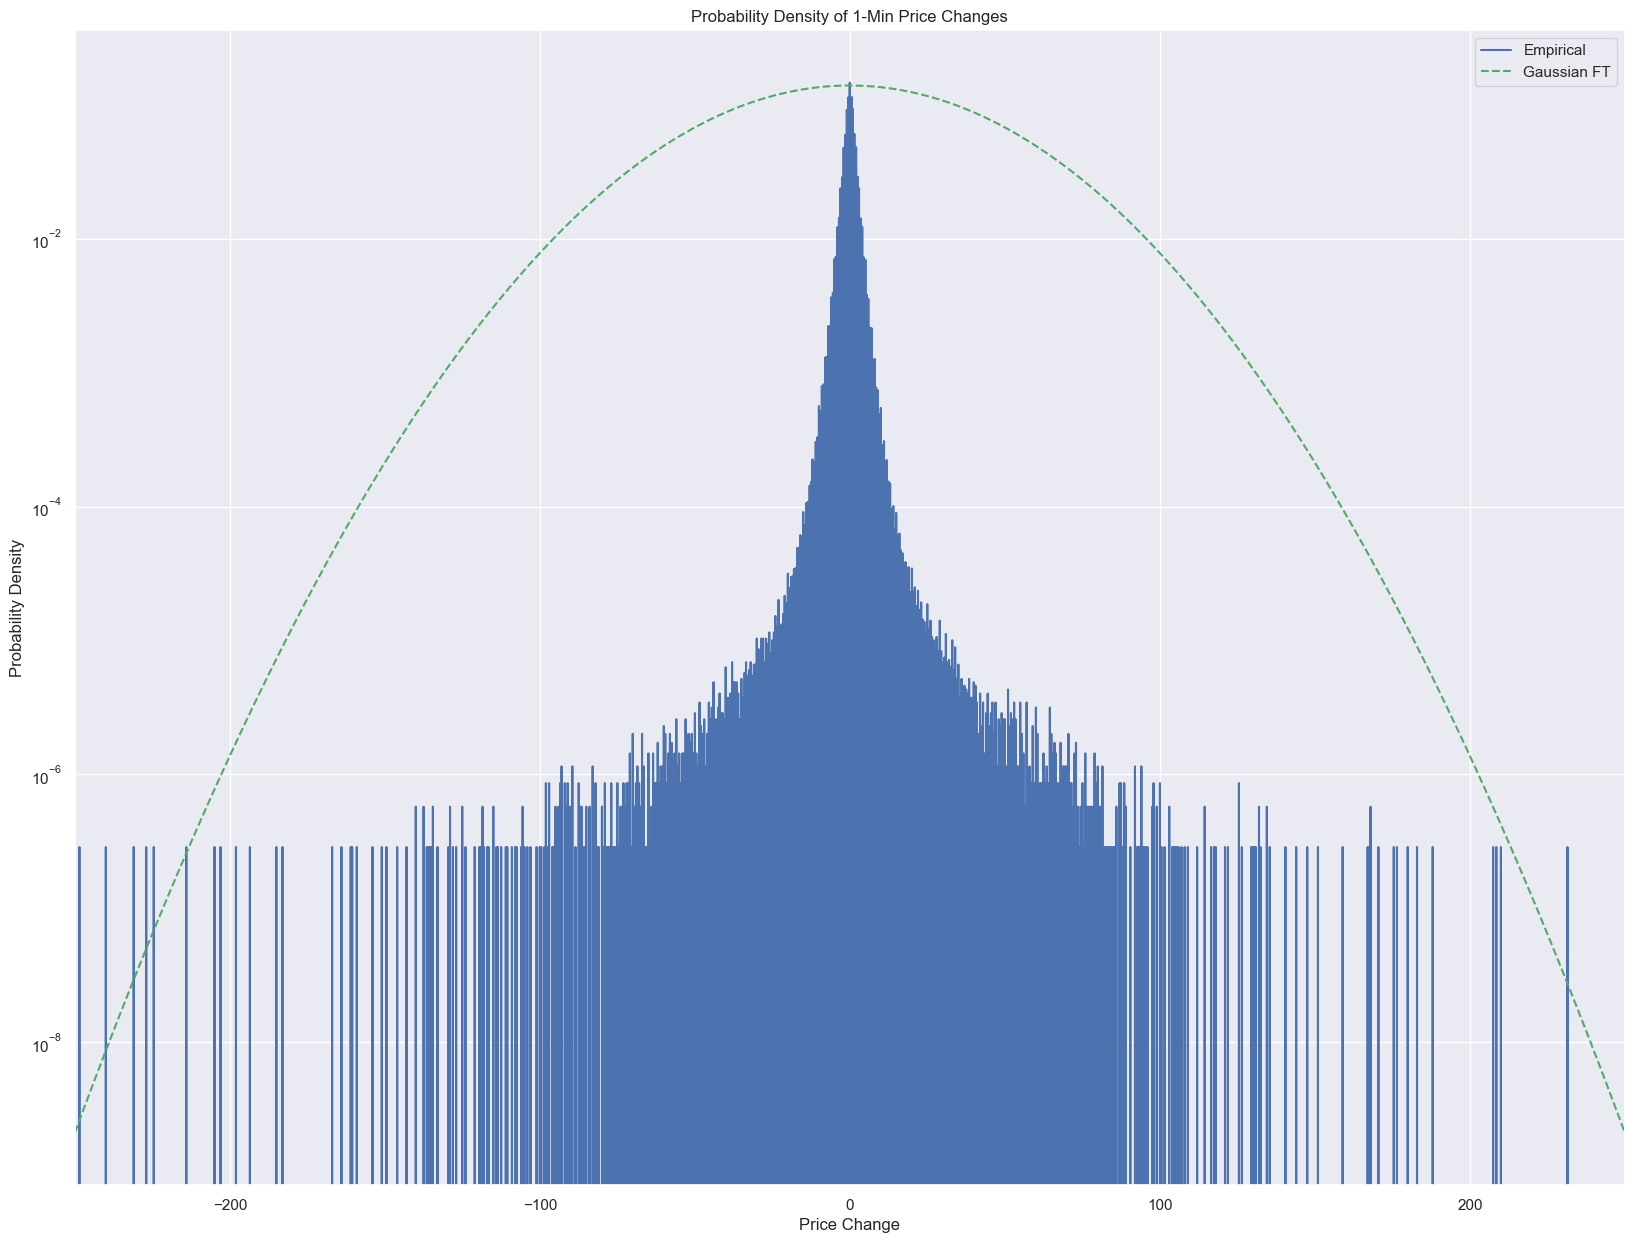

In [7]:
# Compute the probability density function
hist, bins = np.histogram(df1, bins=10000, density=True)
bin_centers = (bins[1:] + bins[:-1]) / 2
pdf = hist / np.sum(hist)

# Plot the probability density function on a log-linear scale
plt.semilogy(bin_centers, pdf)
plt.xlim(-250,250)
plt.xlabel('Price Change')
plt.ylabel('Probability Density of ES')
plt.title('Probability Density of 1-Min Price Changes in ES')
plt.show()

# Compute sample mean and standard deviation
mu_ES, sd_ES = mu1, sd1
mu_FT, sd_FT = mu2, sd2

# Generate Gaussian PDF
gaussian_x = np.linspace(-250, 250, 10000)

# Plot histogram and Gaussian PDF on a log-linear scale
plt.semilogy(bin_centers, pdf, label='Empirical')
x = np.linspace(mu_ES - 4*sd_ES, mu_ES + 4*sd_ES, 10000)
plt.plot(gaussian_x, sp.stats.norm.pdf(x, mu_ES, sd_ES), 'r--', label='Gaussian ES')
plt.xlabel('Price Change')
plt.ylabel('Probability Density')
plt.title('Probability Density of 1-Min Price Changes')
plt.xlim(-250, 250)
plt.legend()
plt.show()

# FT

# Compute the probability density function
hist, bins = np.histogram(df2, bins=10000, density=True)
bin_centers = (bins[1:] + bins[:-1]) / 2
pdf = hist / np.sum(hist)

# Plot the probability density function on a log-linear scale
plt.semilogy(bin_centers, pdf)
plt.xlim(-250,250)
plt.xlabel('Price Change')
plt.ylabel('Probability Density of FT')
plt.title('Probability Density of 1-Min Price Changes in FT')
plt.show()

# Generate Gaussian PDF
gaussian_x = np.linspace(-250, 250, 10000)

# Plot histogram and Gaussian PDF on a log-linear scale
plt.semilogy(bin_centers, pdf, label='Empirical')
x = np.linspace(mu_FT - 6*sd_FT, mu_FT + 6*sd_FT, 10000)
plt.plot(gaussian_x, sp.stats.norm.pdf(x, mu_FT, sd_FT), 'g--', label='Gaussian FT')
plt.xlabel('Price Change')
plt.ylabel('Probability Density')
plt.title('Probability Density of 1-Min Price Changes')
plt.xlim(-250, 250)
plt.legend()
plt.show()


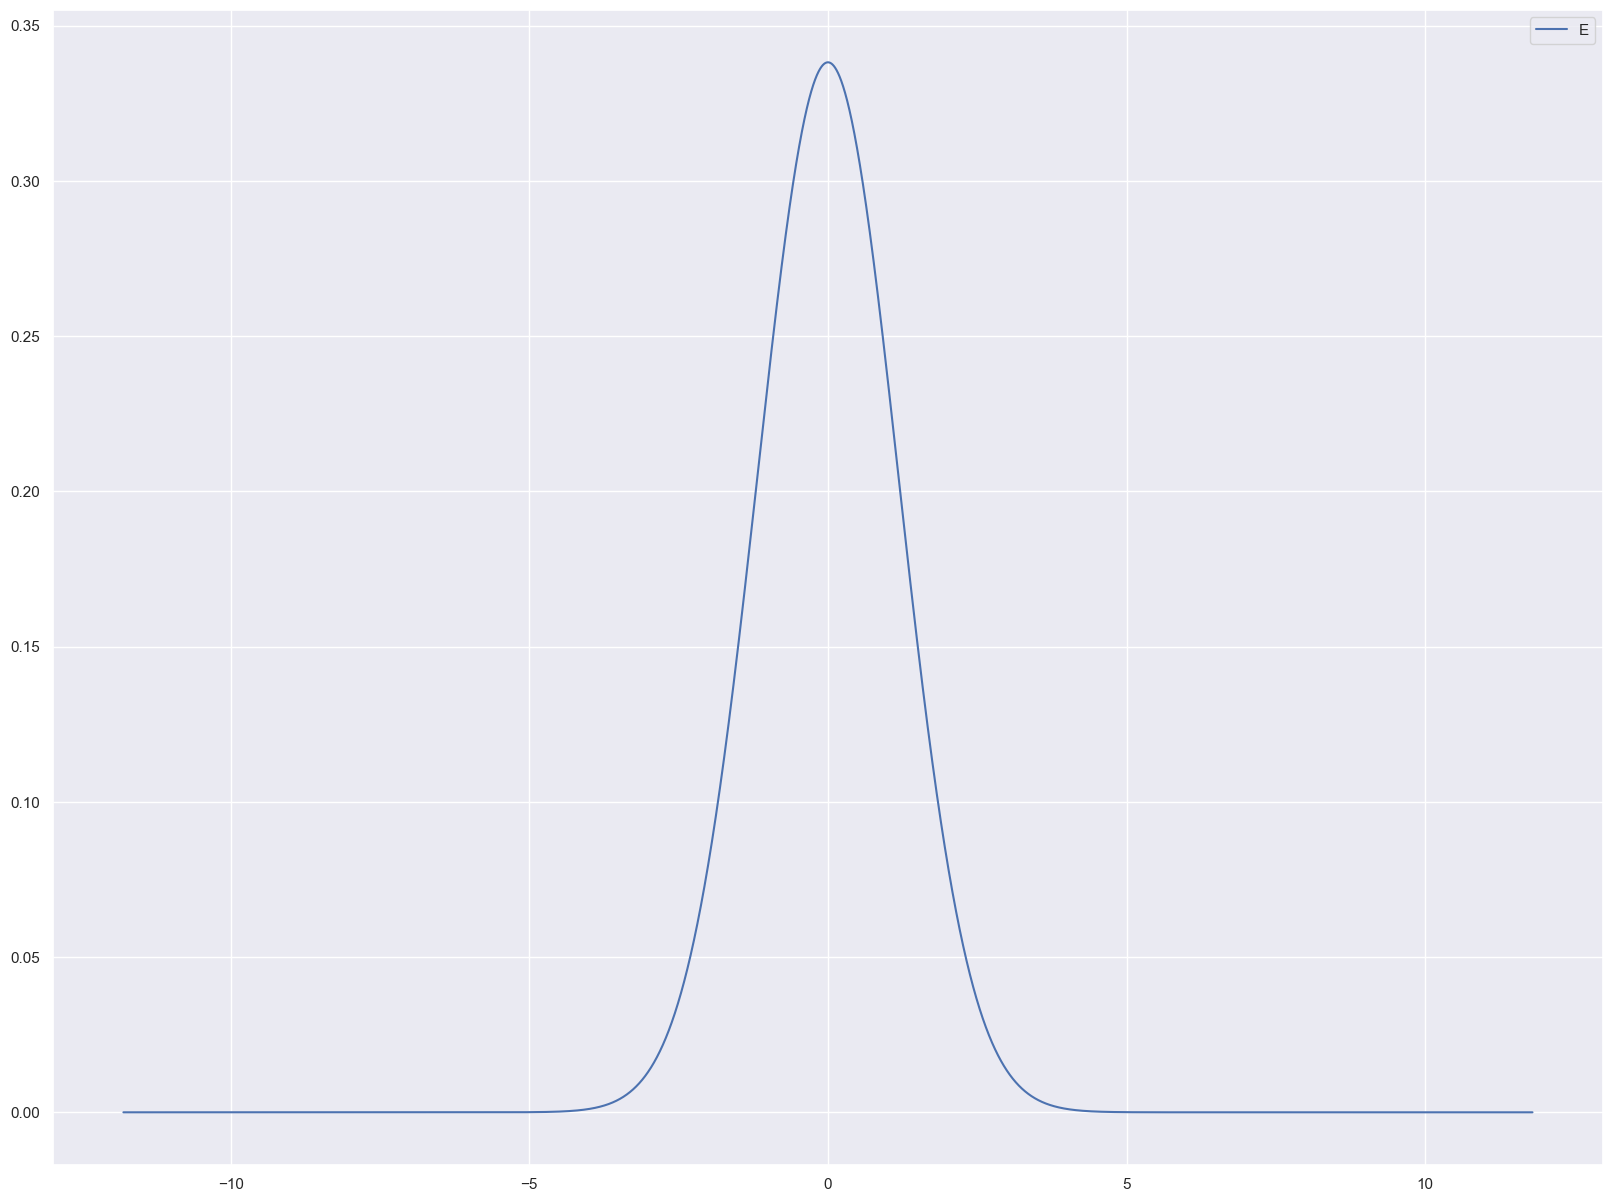

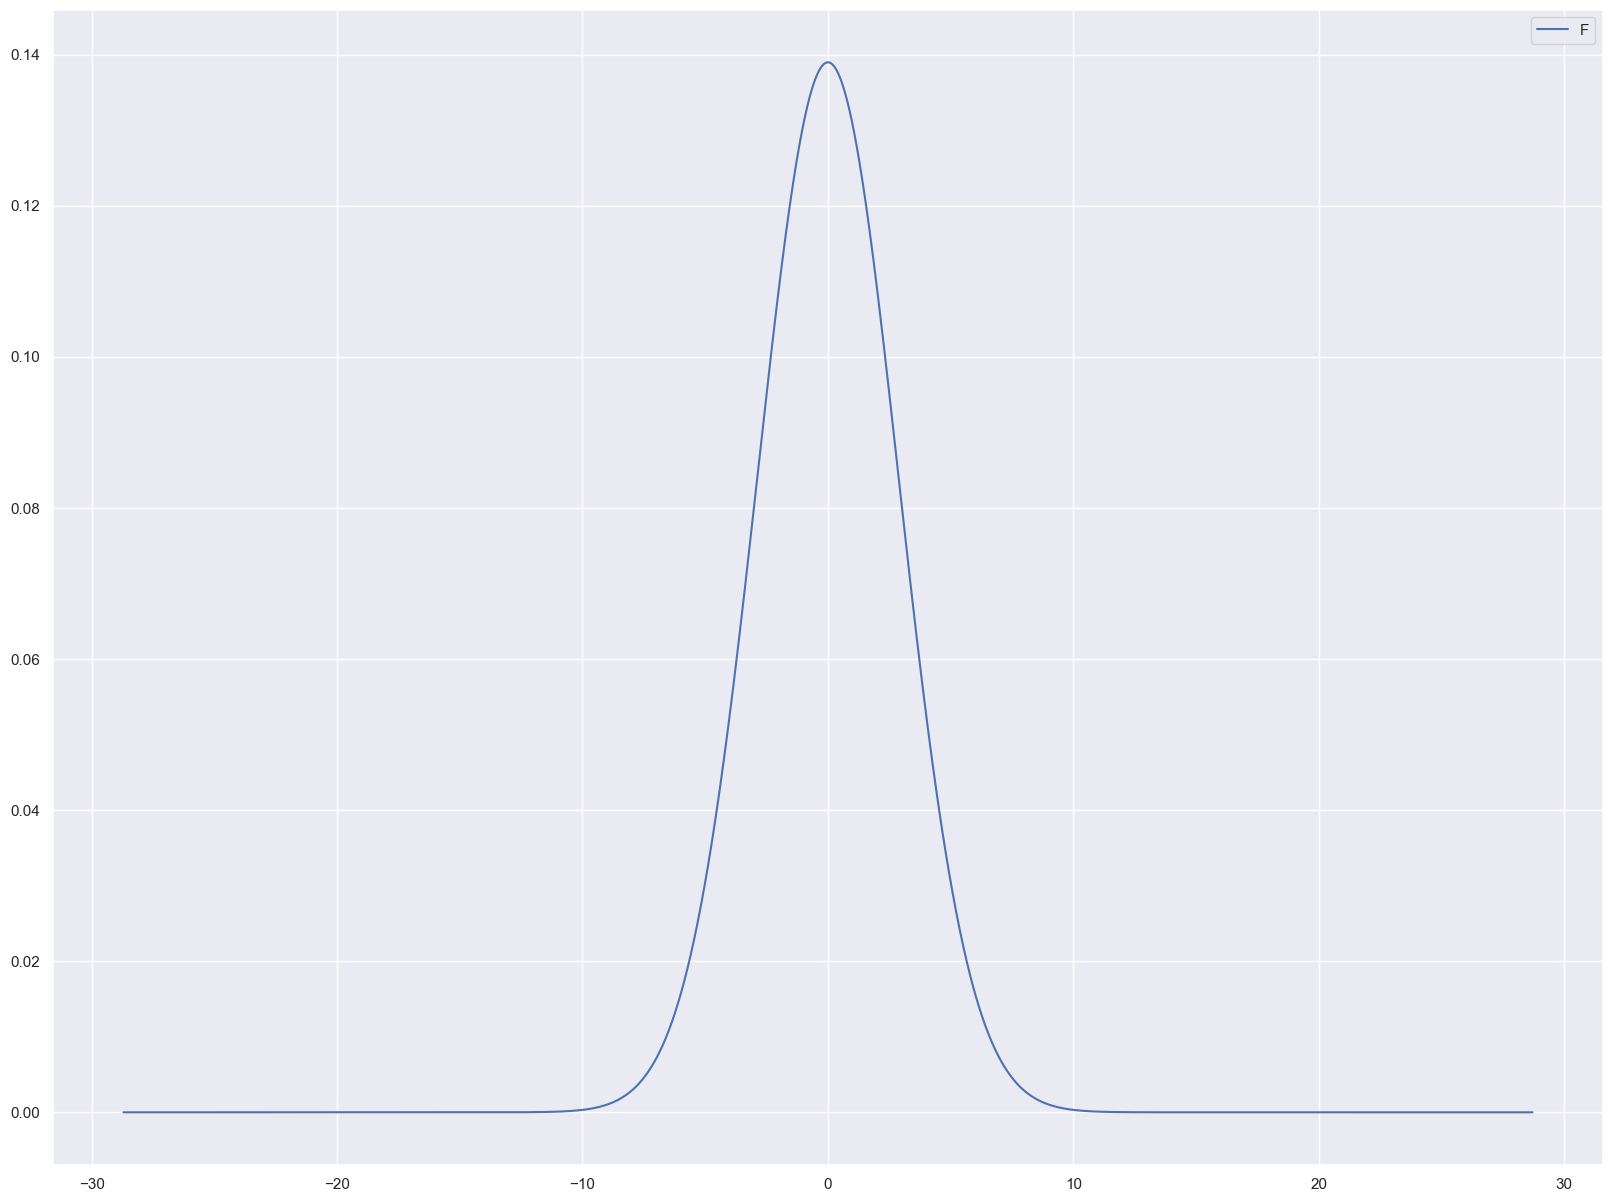

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math

mu = 0.0011103707144362227
sigma = 1.1796200803030512
x = np.linspace(mu - 10*sigma, mu + 10*sigma, 10000)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.legend("ES")
plt.show()

mu = 0.000992511182637579
sigma = 2.870660468452642
x = np.linspace(mu - 10*sigma, mu + 10*sigma, 10000)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.legend("FT")
plt.show()


In [9]:
# Read the csv files
sp500 = pd.read_csv('ES-1min.csv')
ftse100 = pd.read_csv('FT-1min.csv')

sp500["ES"] = sp500["Close"]
ftse100["FT"] = ftse100["Close"]

ES = sp500["ES"]
FT = ftse100["FT"]

In [10]:
def compute_histogram(ES, FT, tau):
    df1, df2 = ES.diff(periods = tau).dropna(), FT.diff(periods = tau).dropna()
    mu1, sd1 = df1.mean(), df1.std()
    mu2, sd2 = df2.mean(), df2.std()
    
    # Compute the probability density function
    hist, bins = np.histogram(df1, bins=10000, density=True)
    bin_centers = (bins[1:] + bins[:-1]) / 2
    pdf = hist / np.sum(hist)

    # Plot the probability density function on a log-linear scale
    plt.semilogy(bin_centers, pdf)
    plt.xlim(-250,250)
    plt.xlabel('Price Change')
    plt.ylabel('Probability Density of ES')
    plt.title(f'Probability Density of {tau}-Min Price Changes in ES')
    plt.show()

    # Compute sample mean and standard deviation
    mu_ES, sd_ES = mu1, sd1
    mu_FT, sd_FT = mu2, sd2

    # Generate Gaussian PDF
    gaussian_x = np.linspace(-250, 250, 10000)

    # Plot histogram and Gaussian PDF on a log-linear scale
    plt.semilogy(bin_centers, pdf, label='Empirical')
    x = np.linspace(mu_ES - 4*sd_ES, mu_ES + 4*sd_ES, 10000)
    plt.plot(gaussian_x, stats.norm.pdf(x, mu_ES, sd_ES), 'r--', label='Gaussian ES')
    plt.xlabel('Price Change')
    plt.ylabel('Probability Density')
    plt.title(f'Probability Density of {tau}-Min Price Changes')
    plt.xlim(-250, 250)
    plt.legend()
    plt.show()

    # FT

    # Compute the probability density function
    hist, bins = np.histogram(df2, bins=10000, density=True)
    bin_centers = (bins[1:] + bins[:-1]) / 2
    pdf = hist / np.sum(hist)

    # Plot the probability density function on a log-linear scale
    plt.semilogy(bin_centers, pdf)
    plt.xlim(-250,250)
    plt.xlabel('Price Change')
    plt.ylabel('Probability Density of FT')
    plt.title(f'Probability Density of {tau}-Min Price Changes in FT')
    plt.show()

    # Generate Gaussian PDF
    gaussian_x = np.linspace(-250, 250, 10000)

    # Plot histogram and Gaussian PDF on a log-linear scale
    plt.semilogy(bin_centers, pdf, label='Empirical')
    x = np.linspace(mu_FT - 6*sd_FT, mu_FT + 6*sd_FT, 10000)
    plt.plot(gaussian_x, stats.norm.pdf(x, mu_FT, sd_FT), 'g--', label='Gaussian FT')
    plt.xlabel('Price Change')
    plt.ylabel('Probability Density')
    plt.title(f'Probability Density of {tau}-Min Price Changes')
    plt.xlim(-250, 250)
    plt.legend()
    plt.show()
    

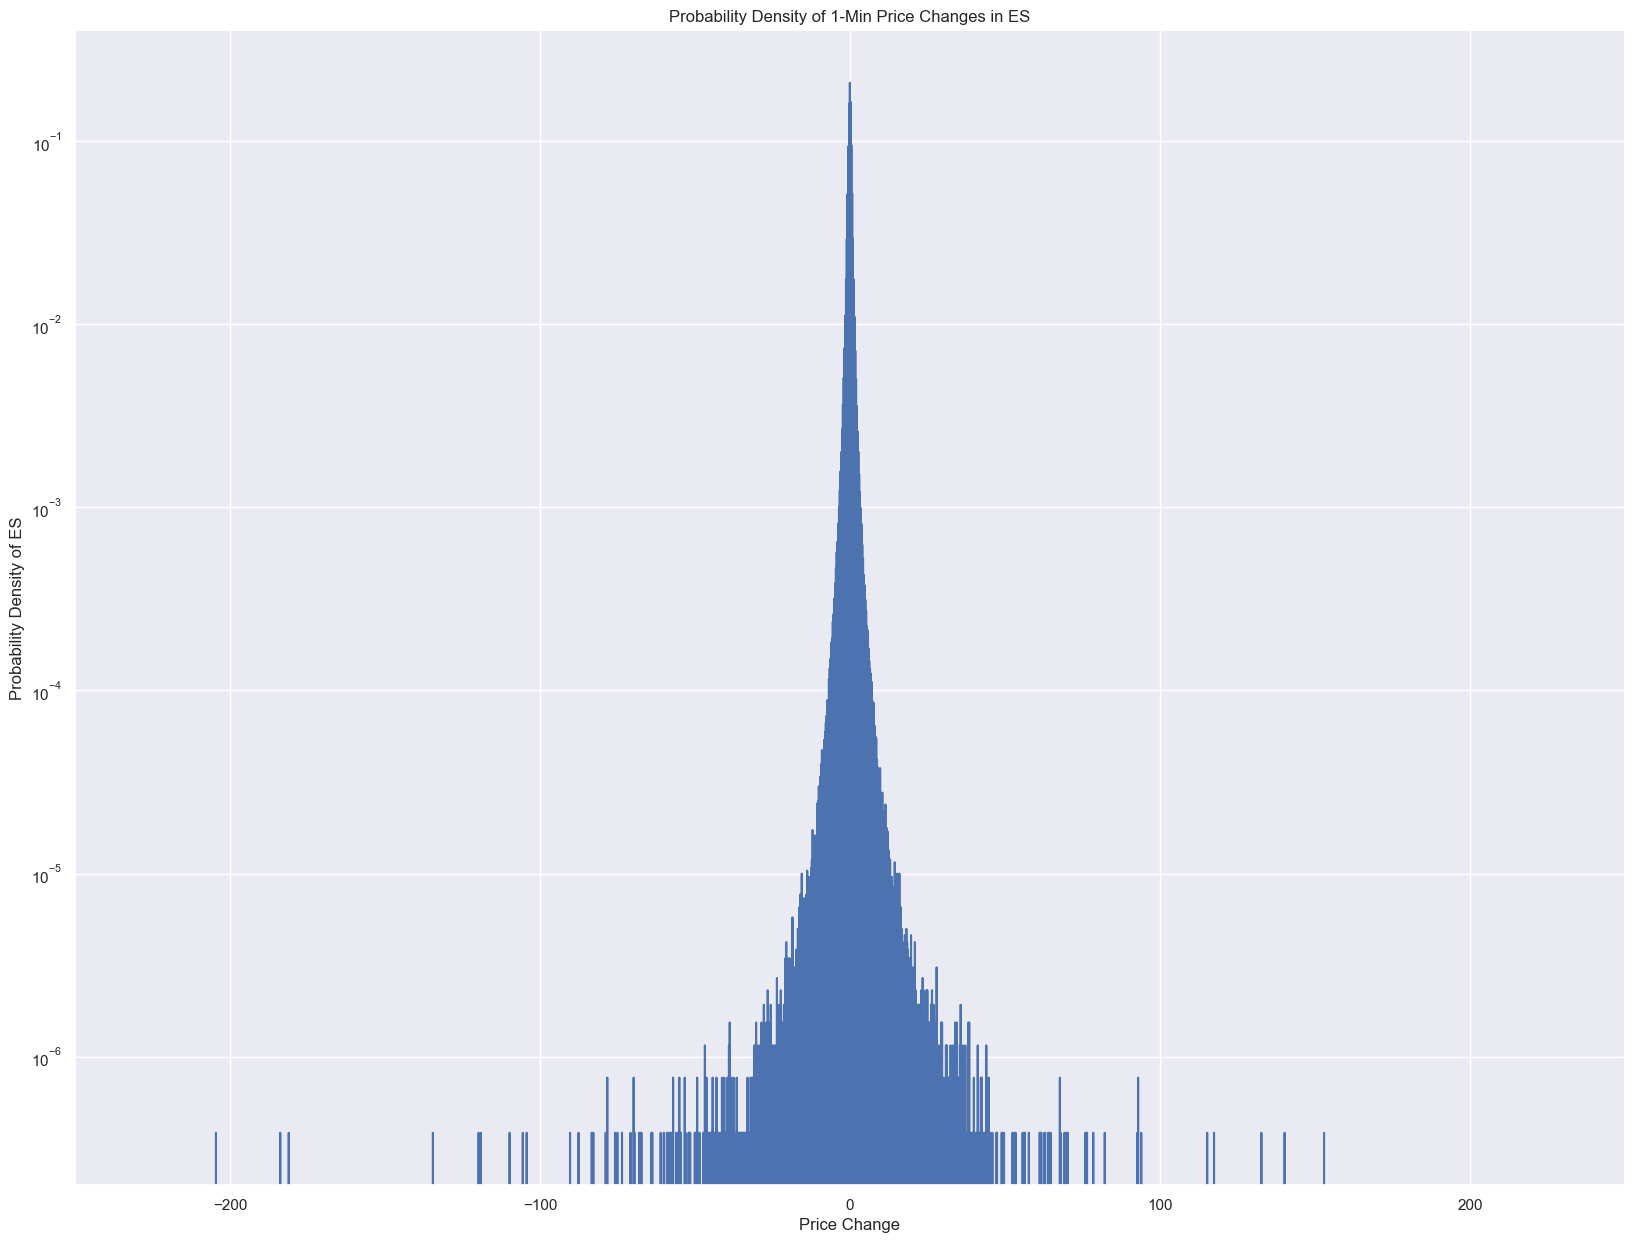

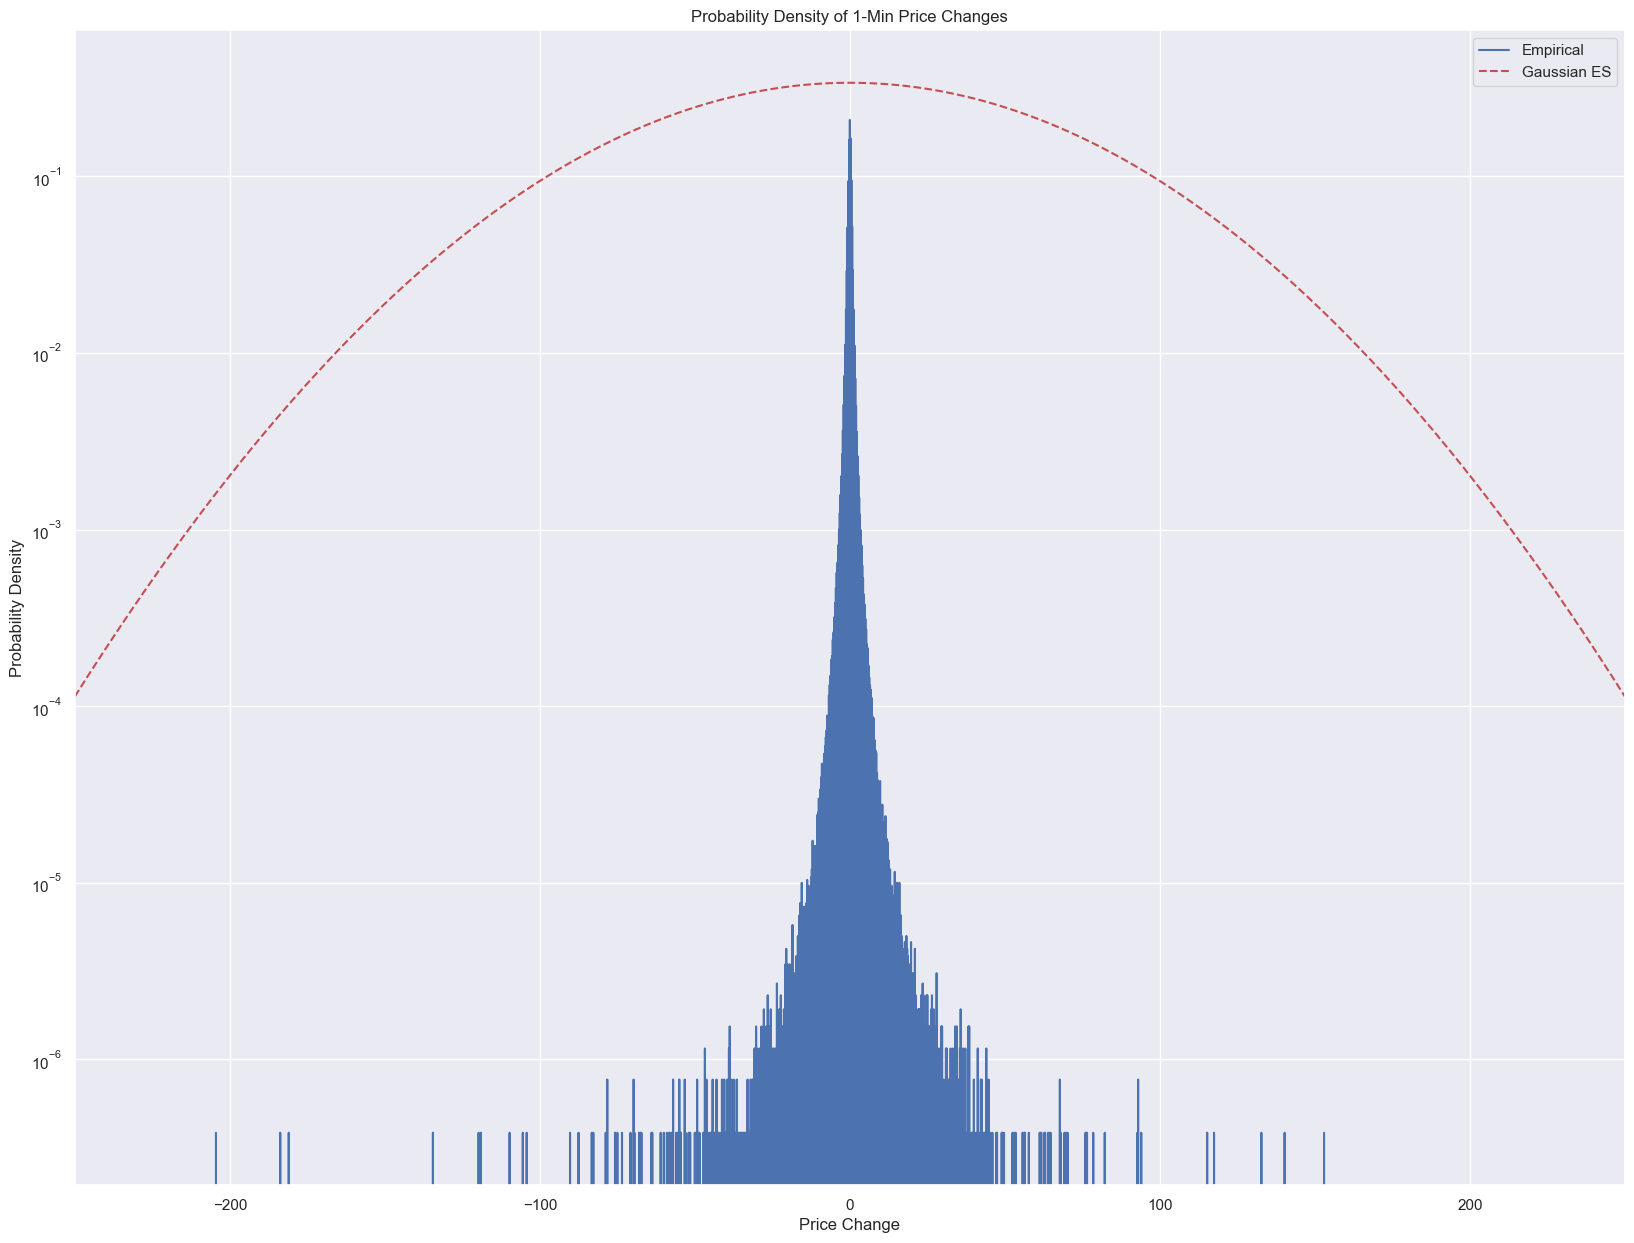

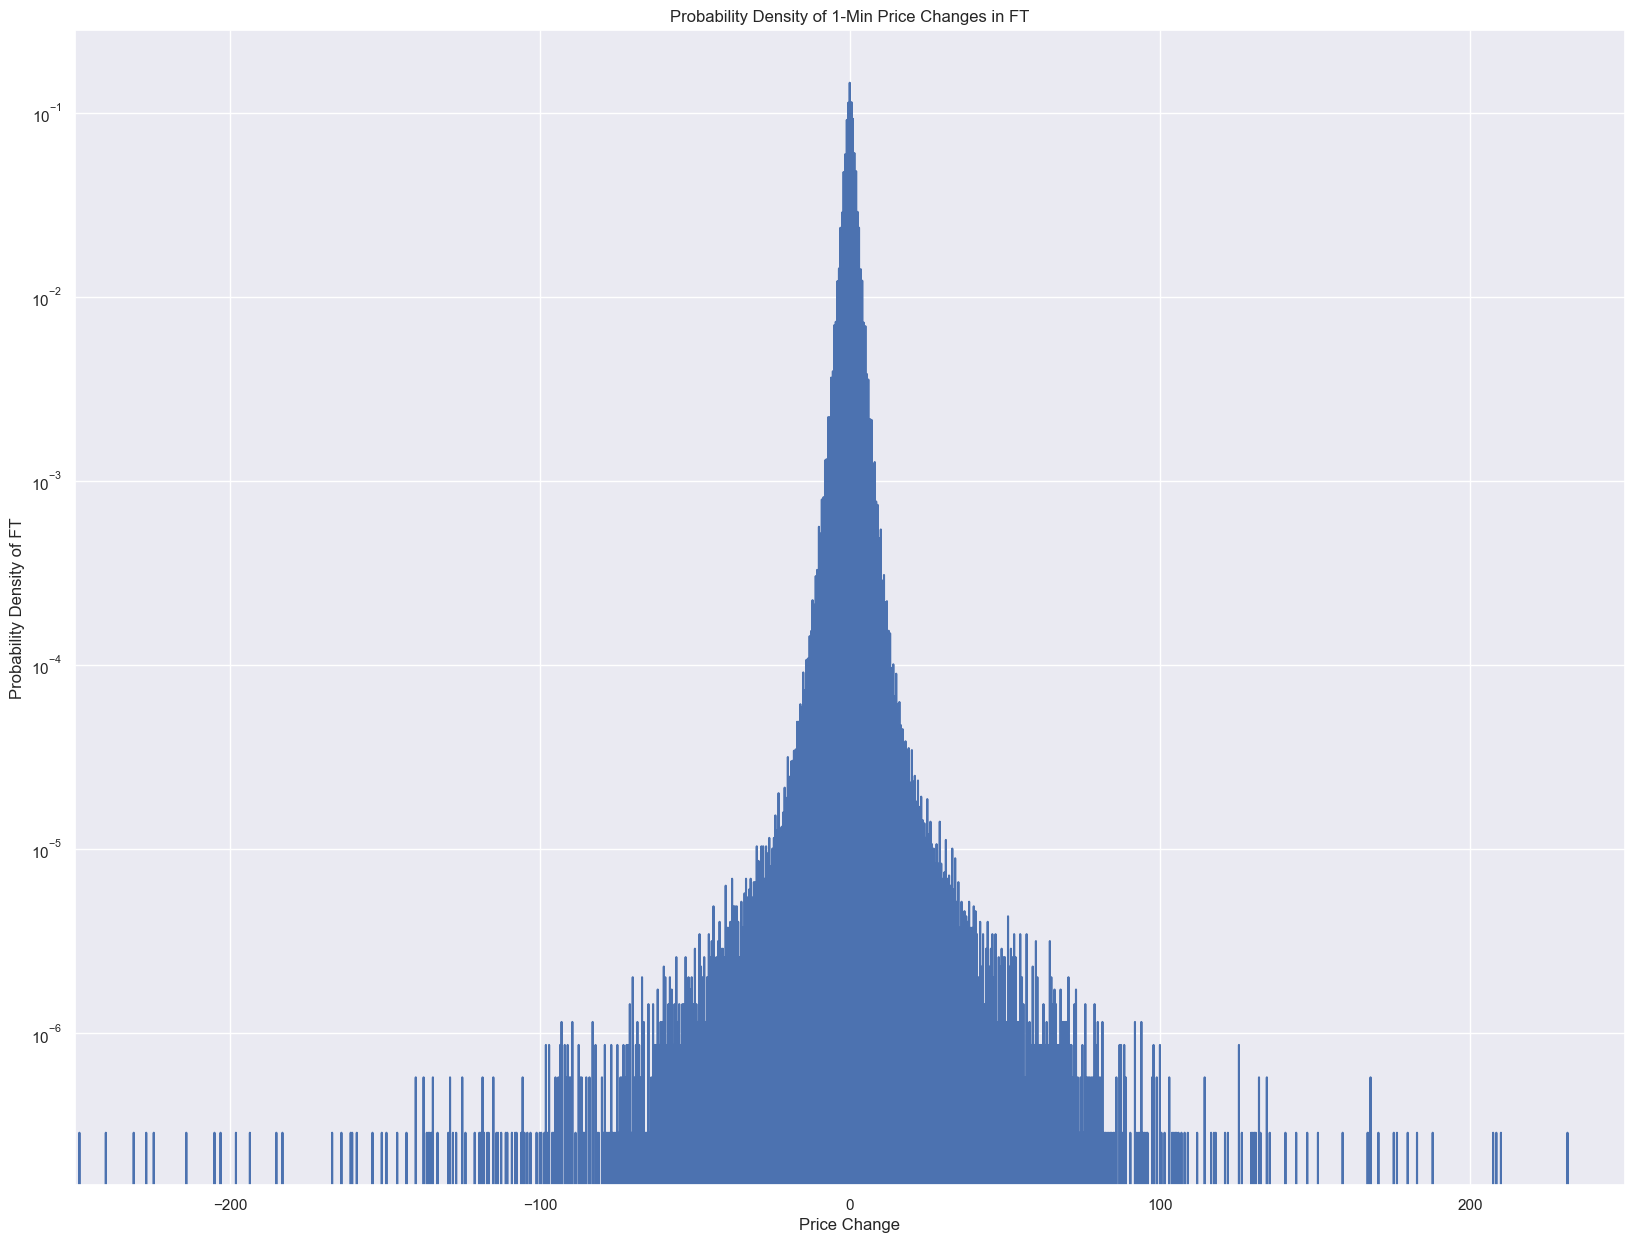

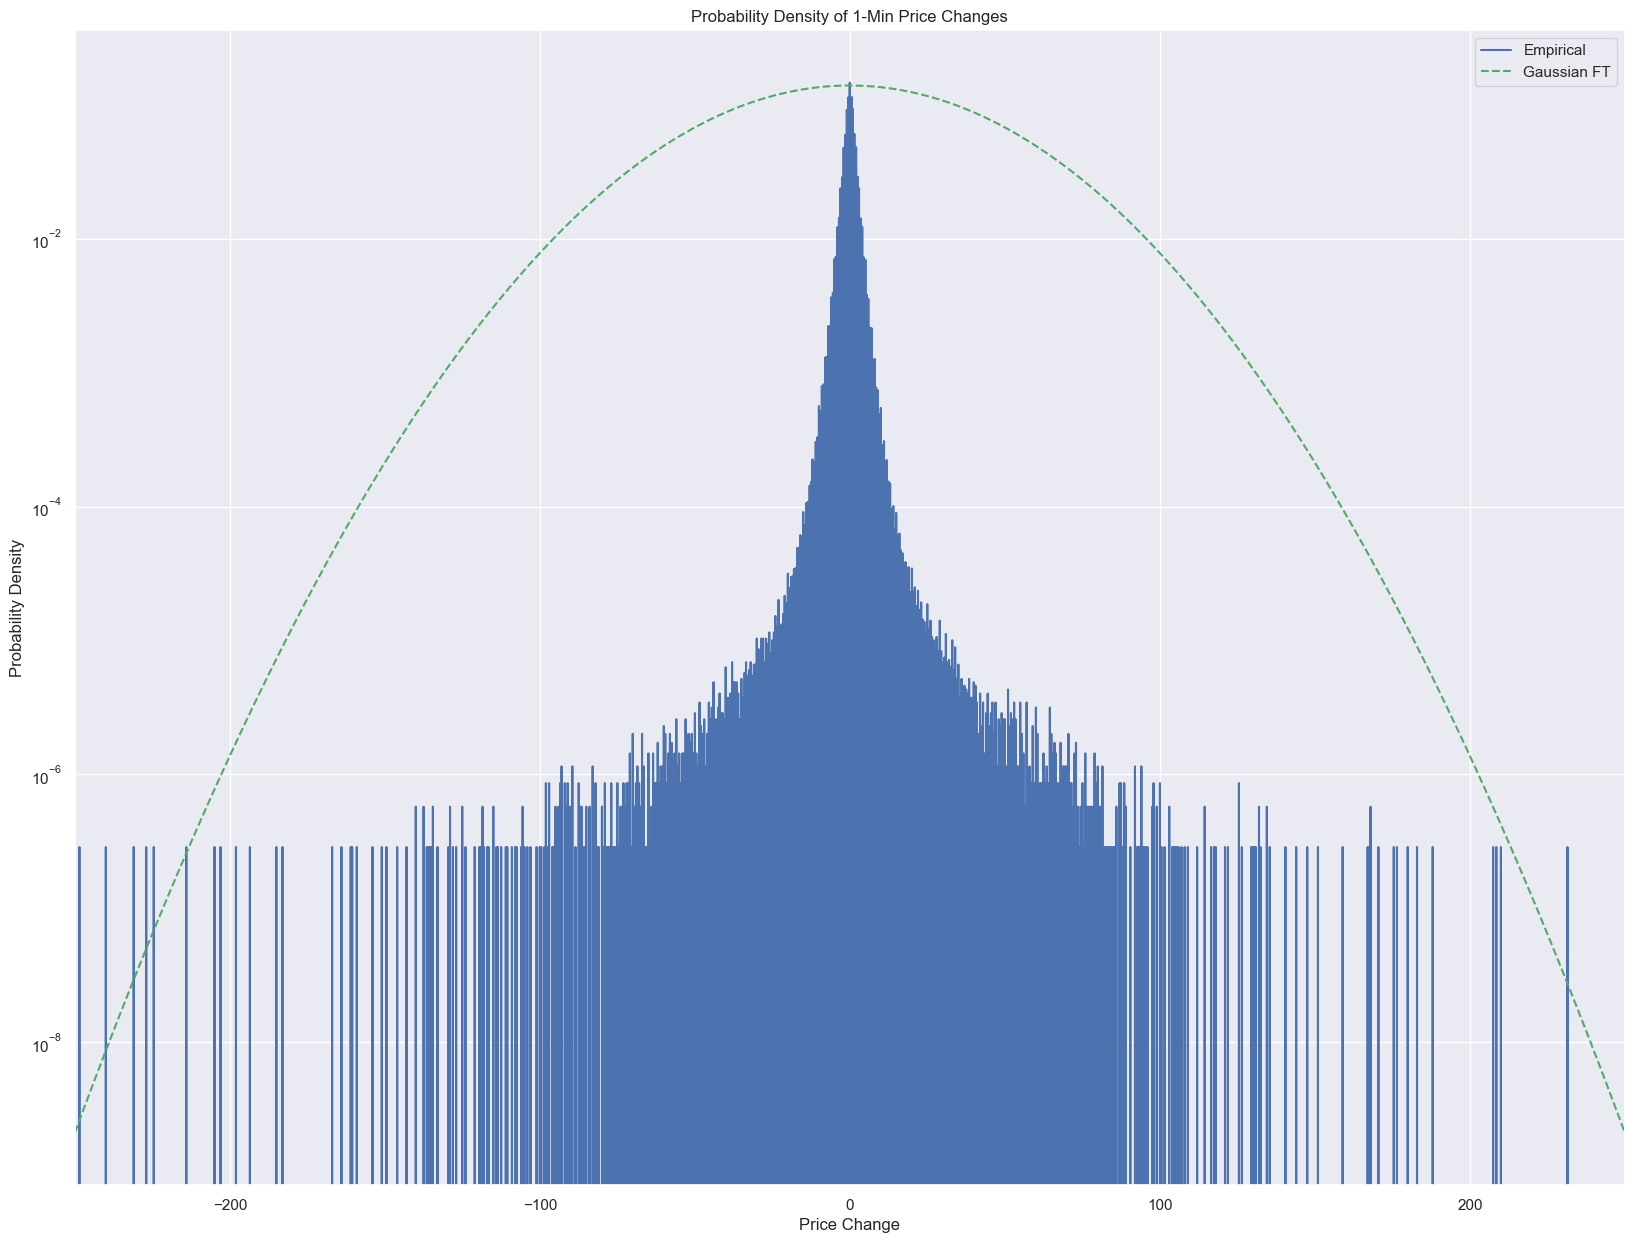

In [11]:
compute_histogram(ES, FT, 1)

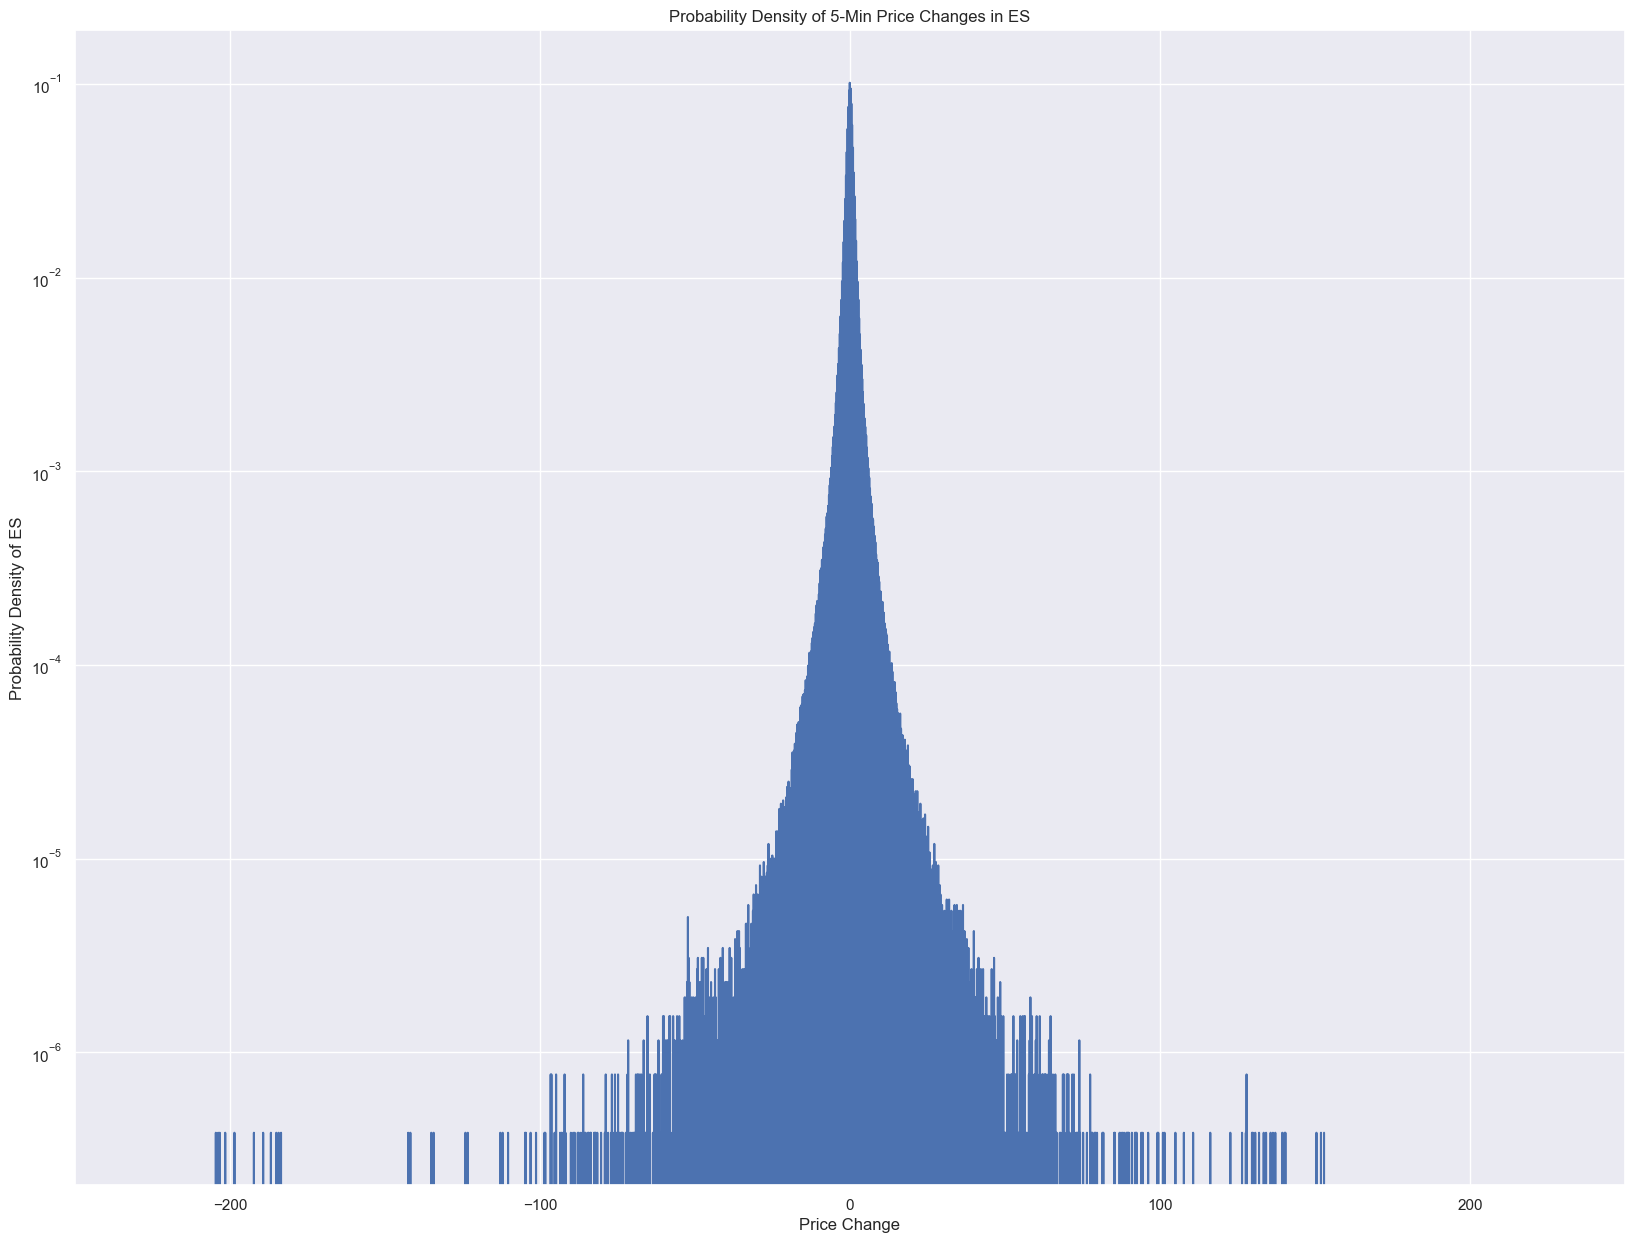

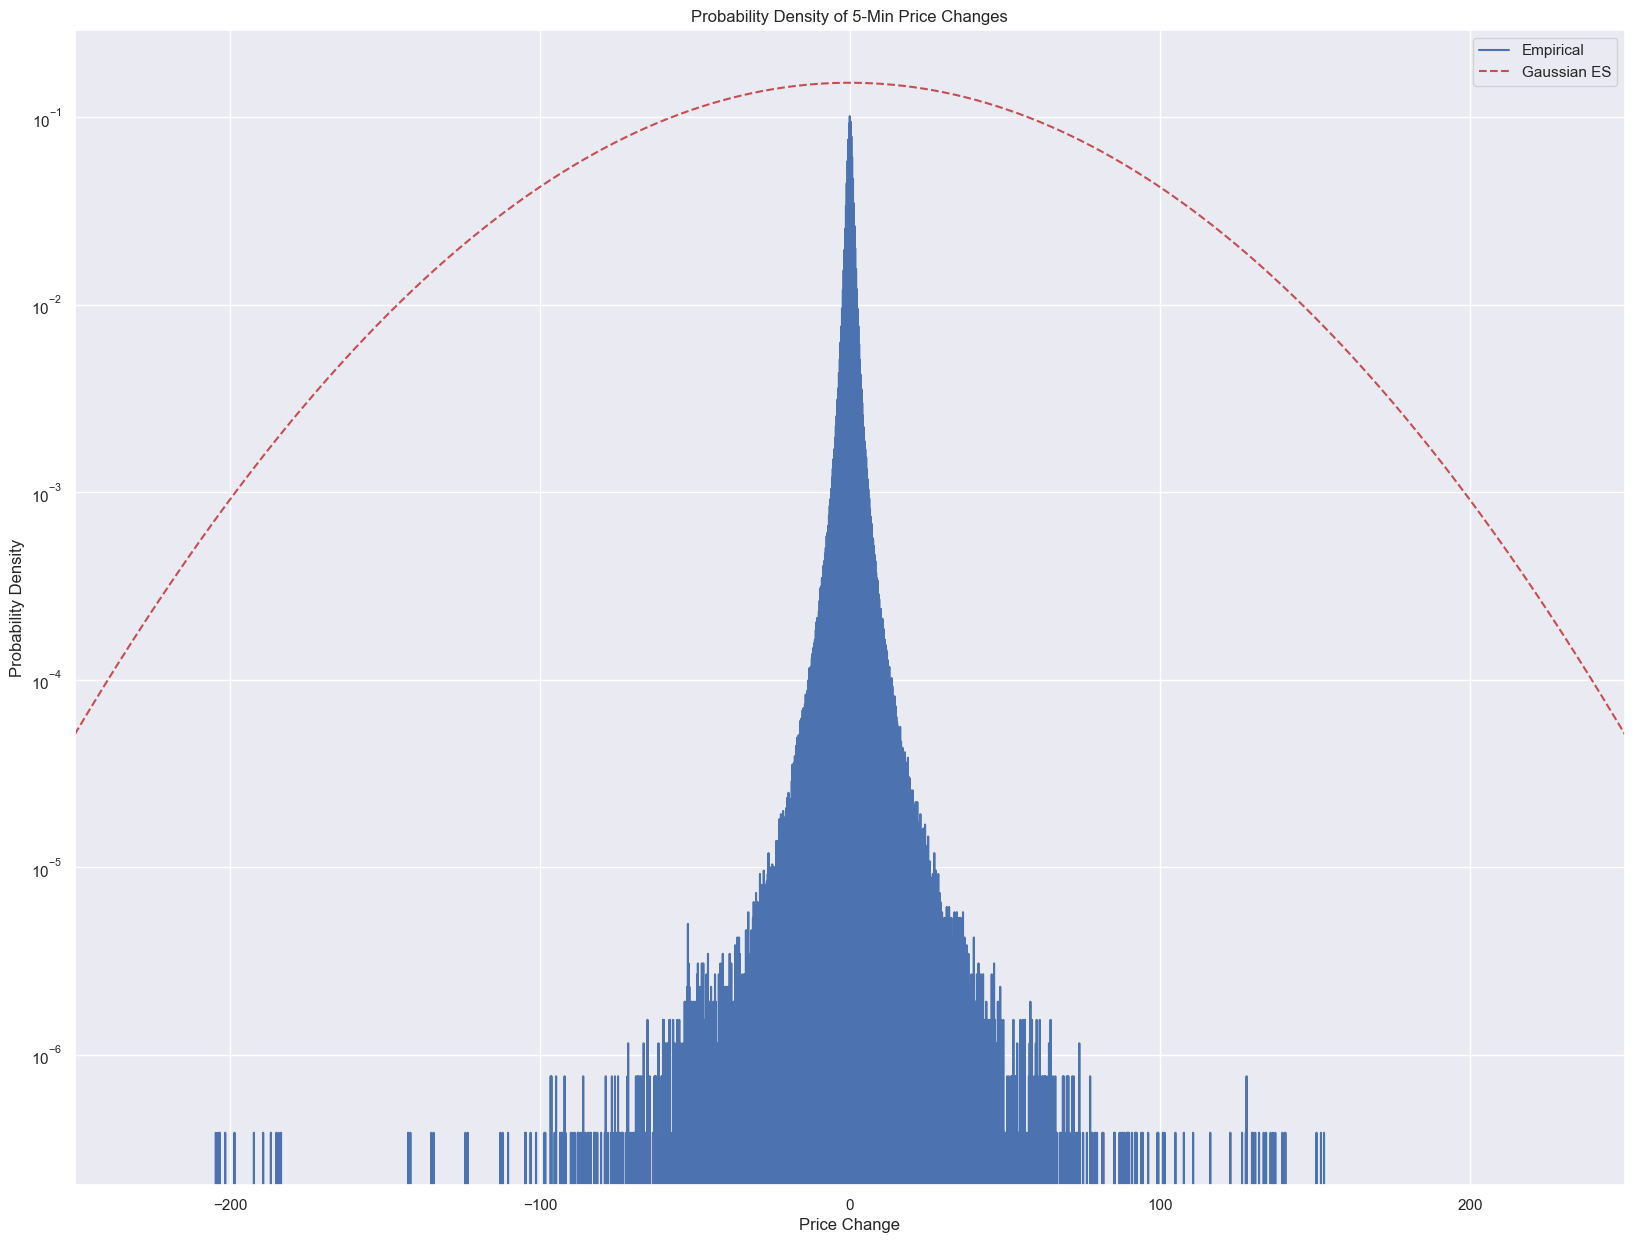

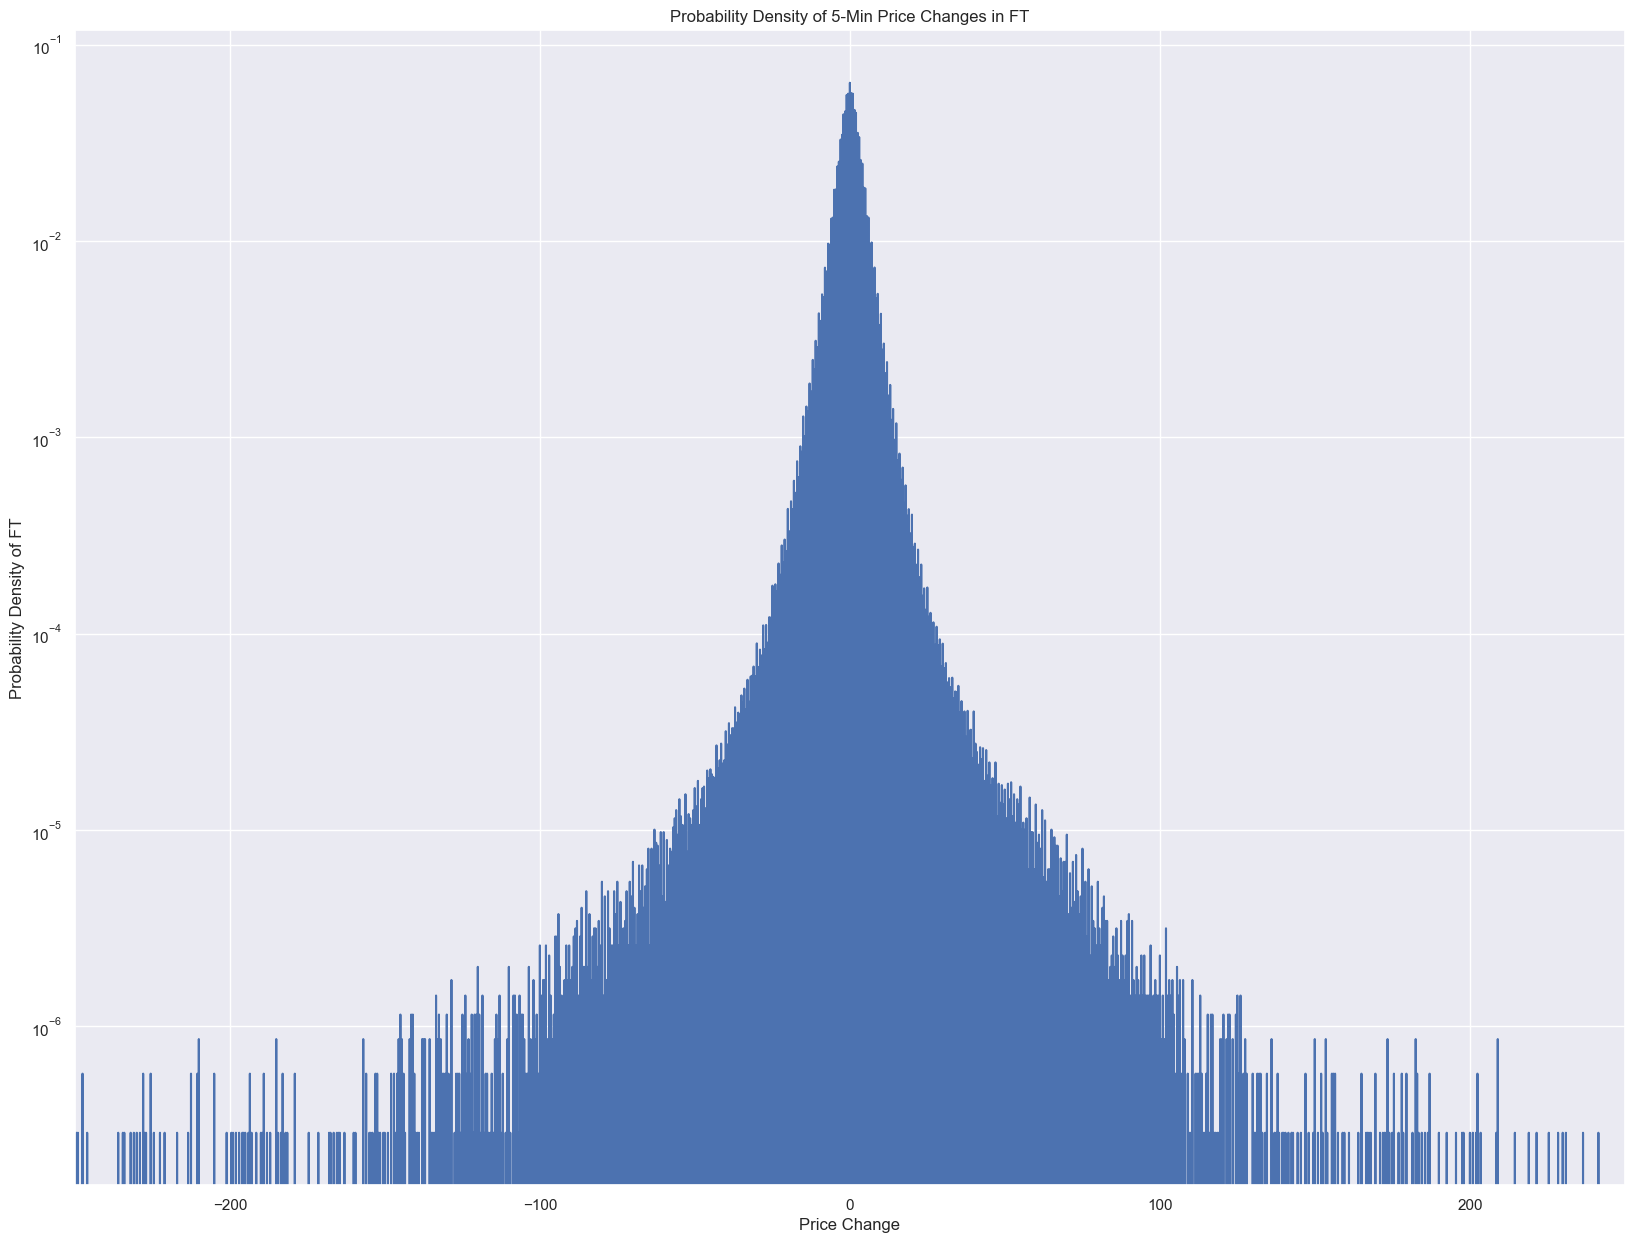

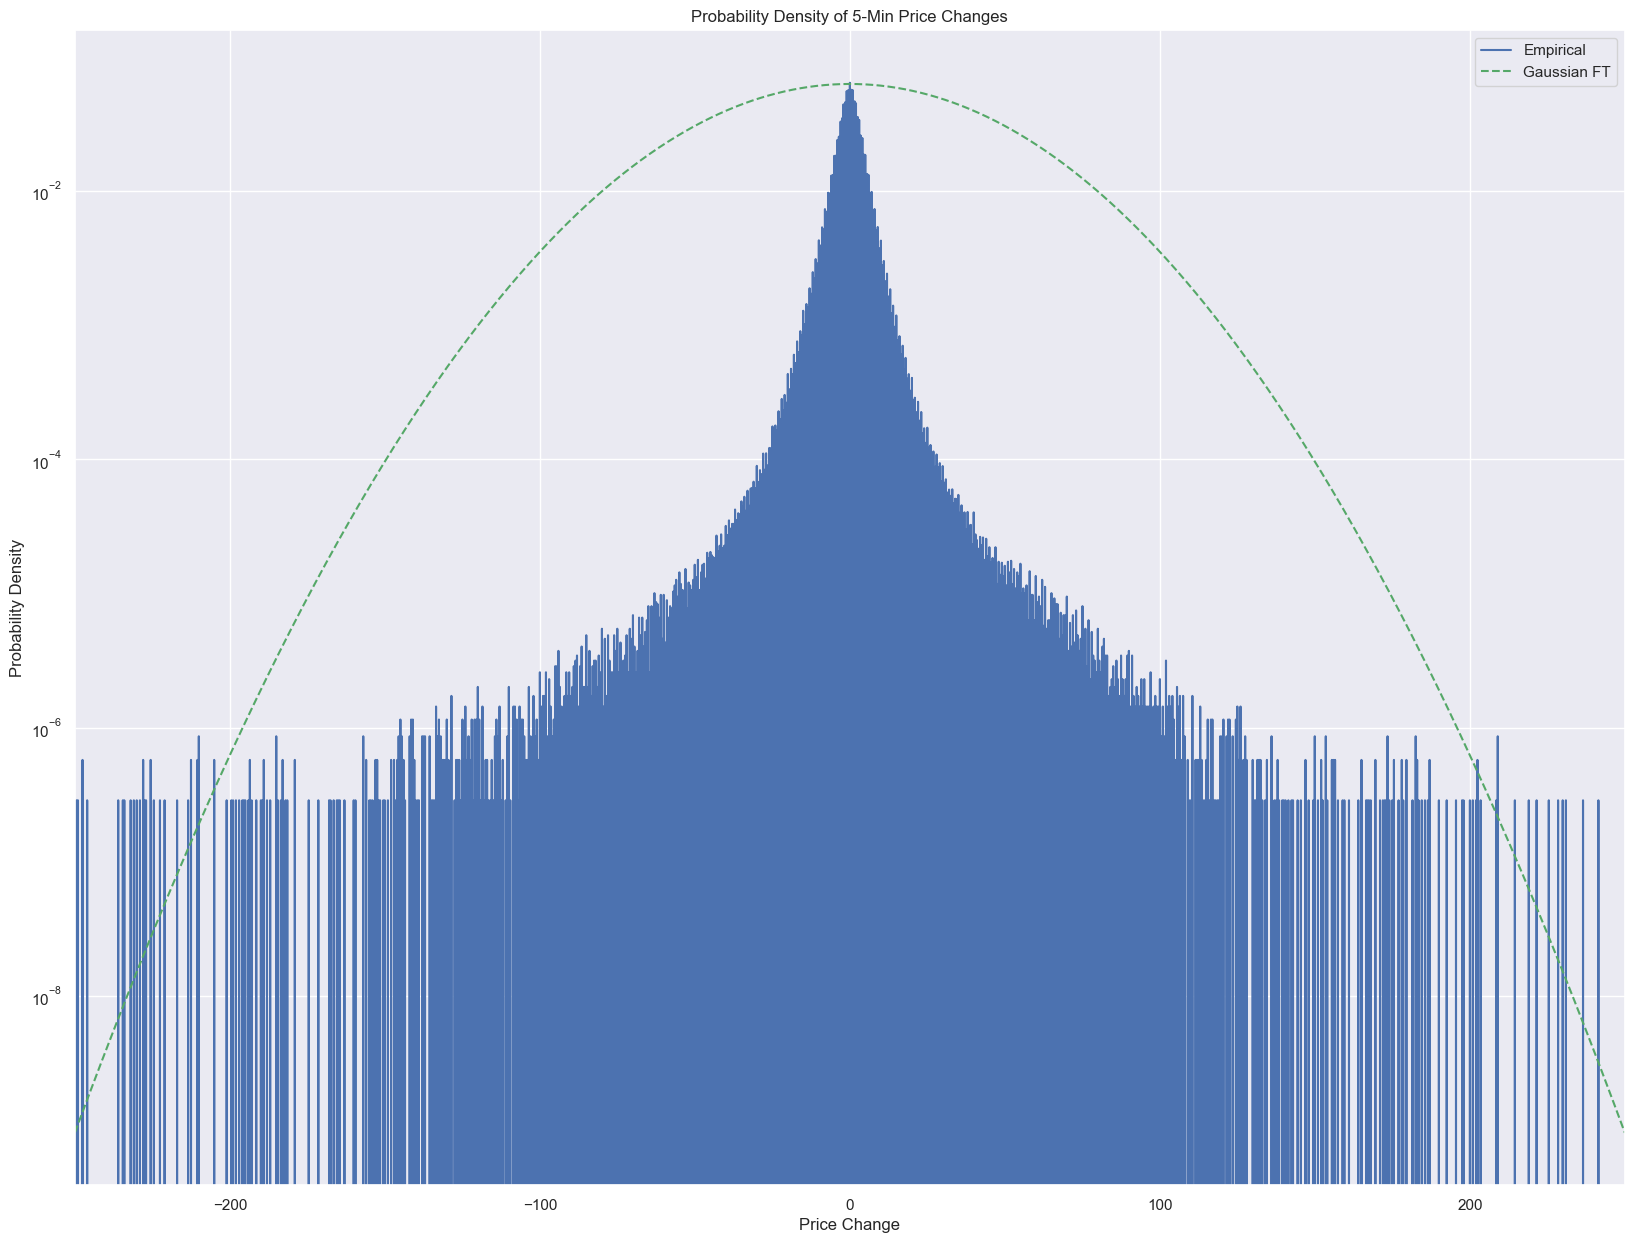

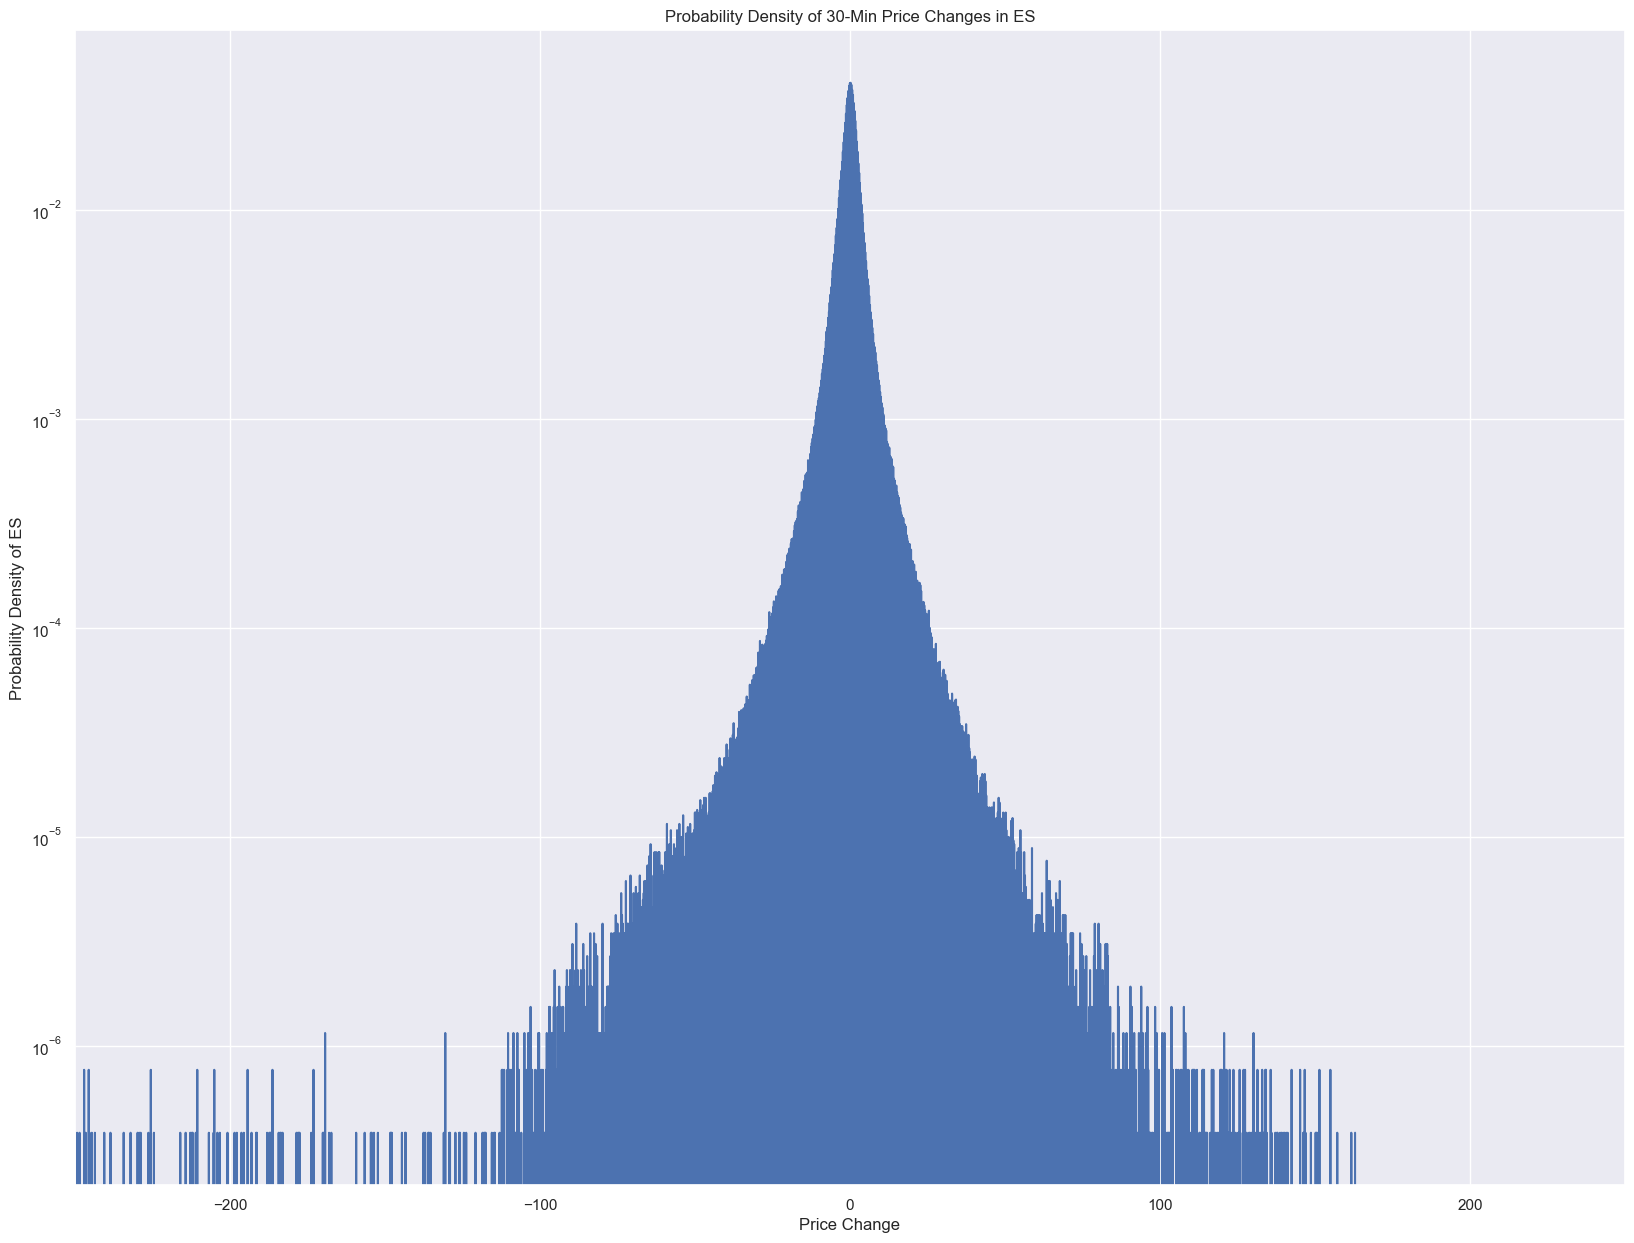

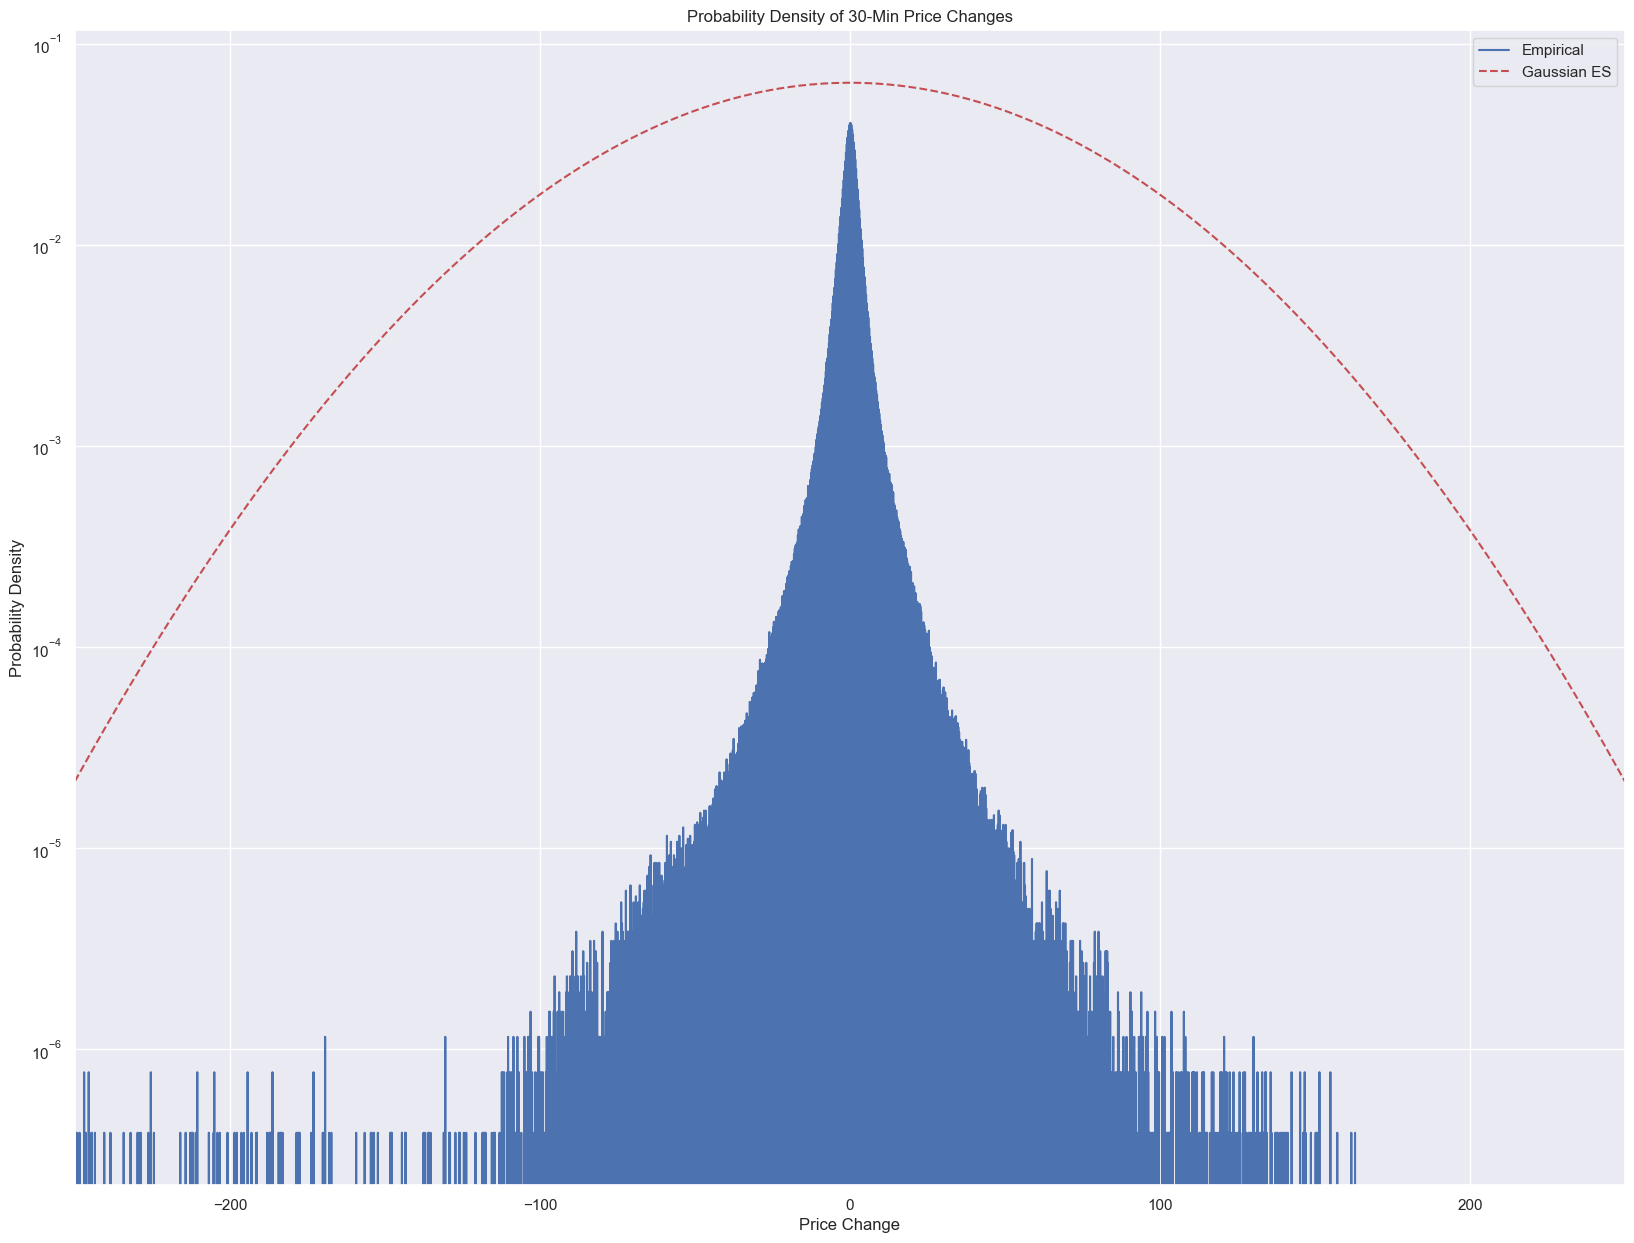

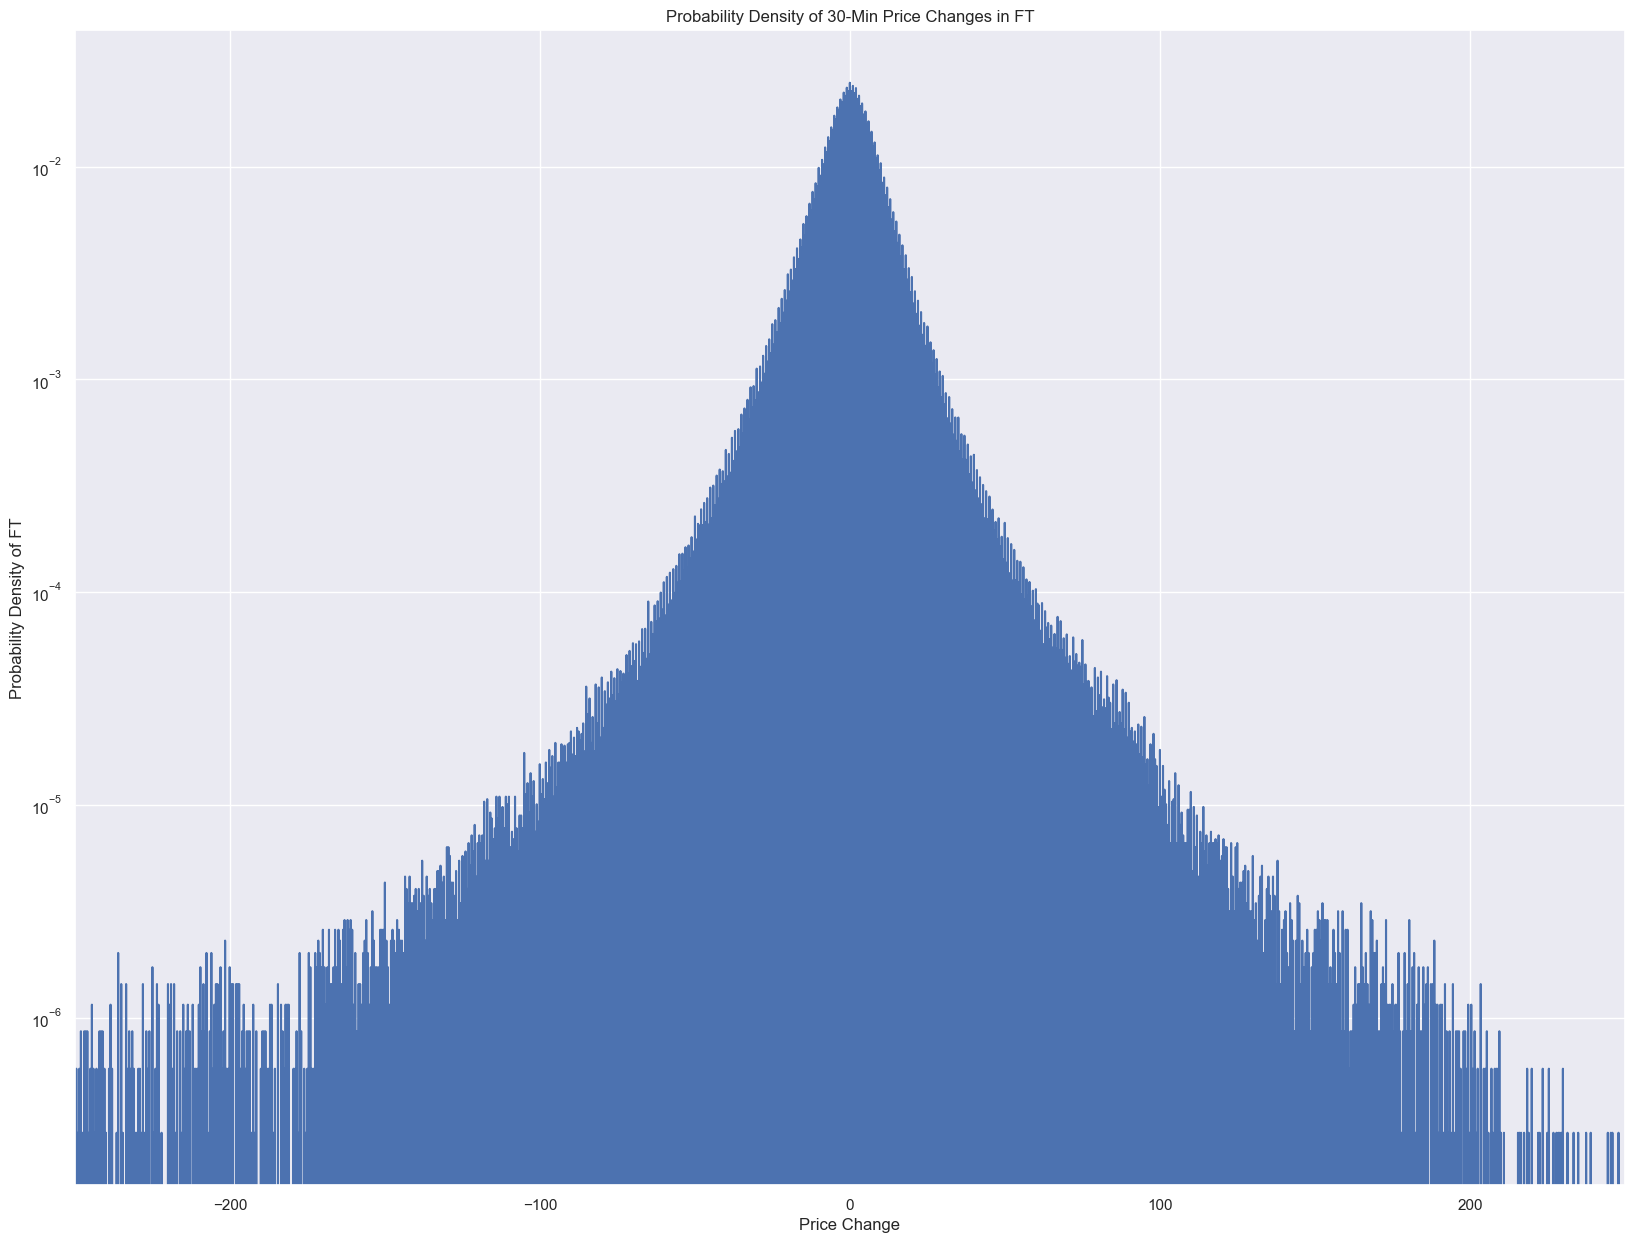

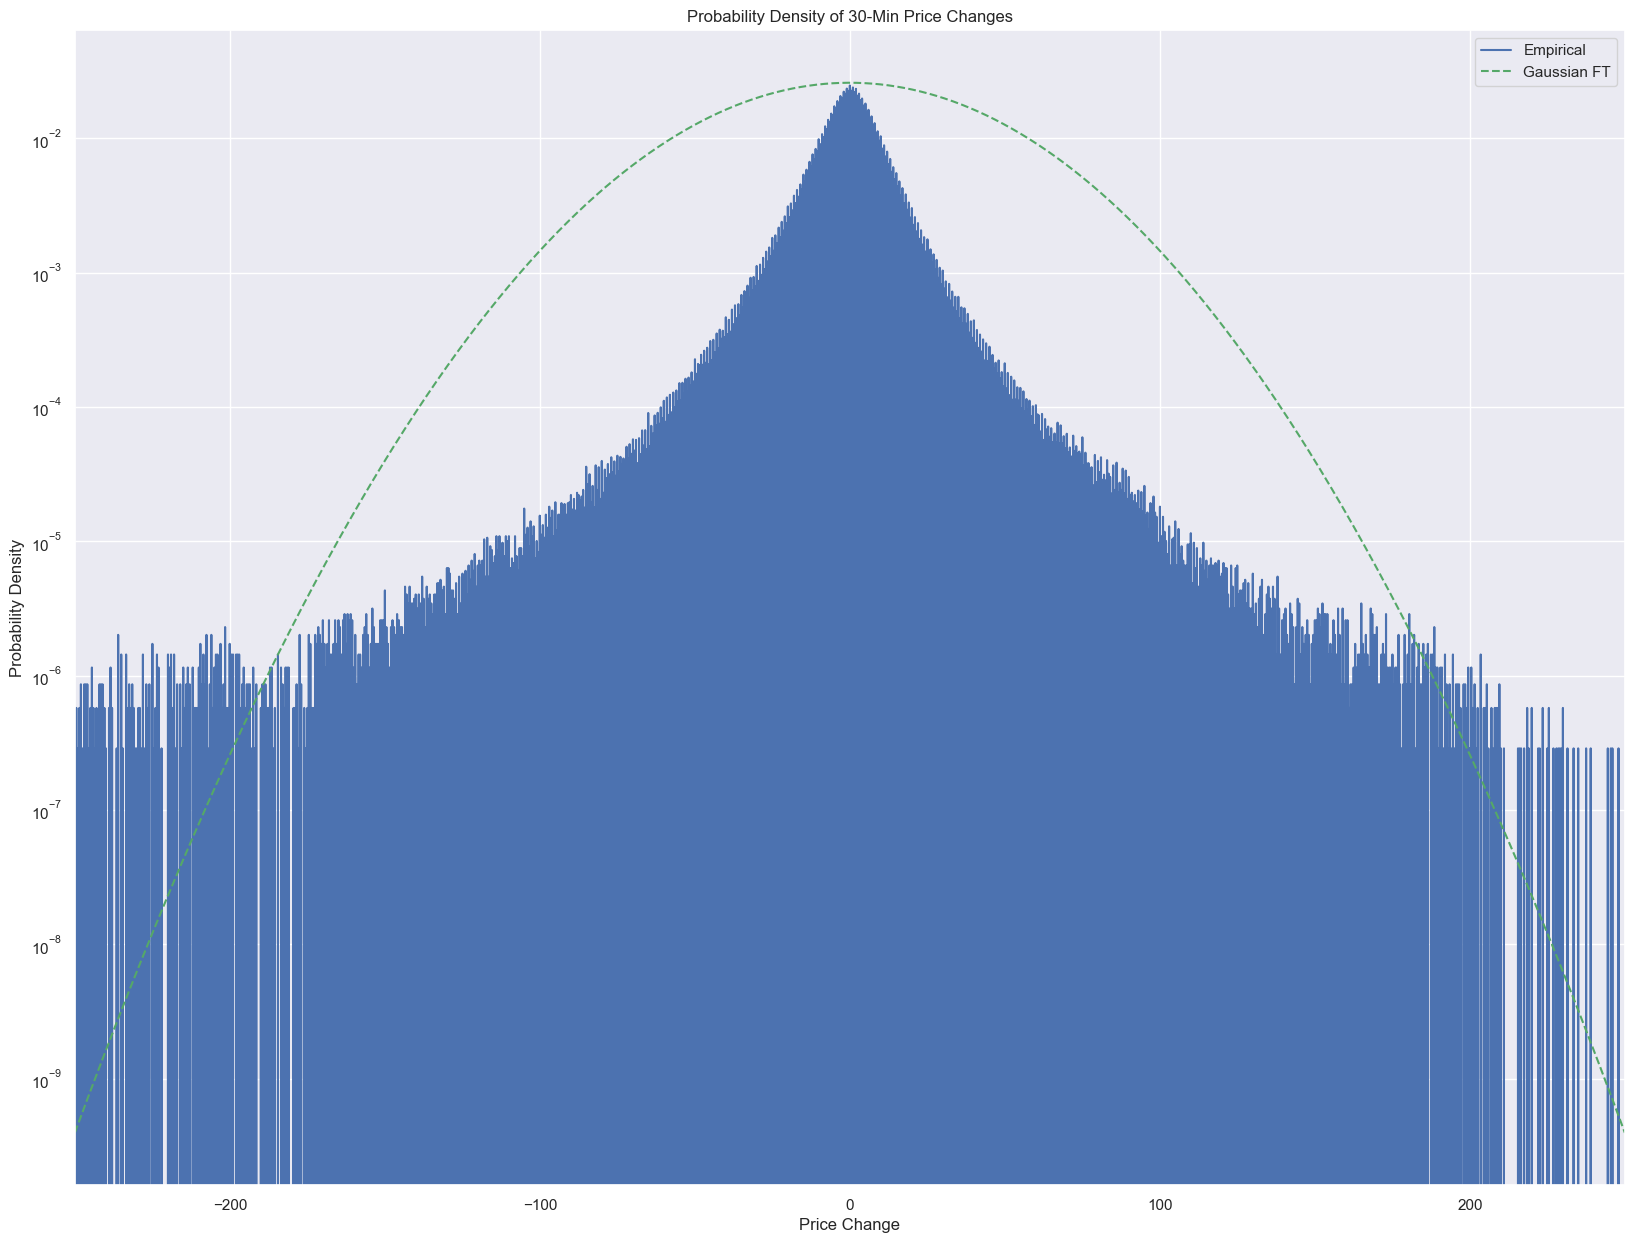

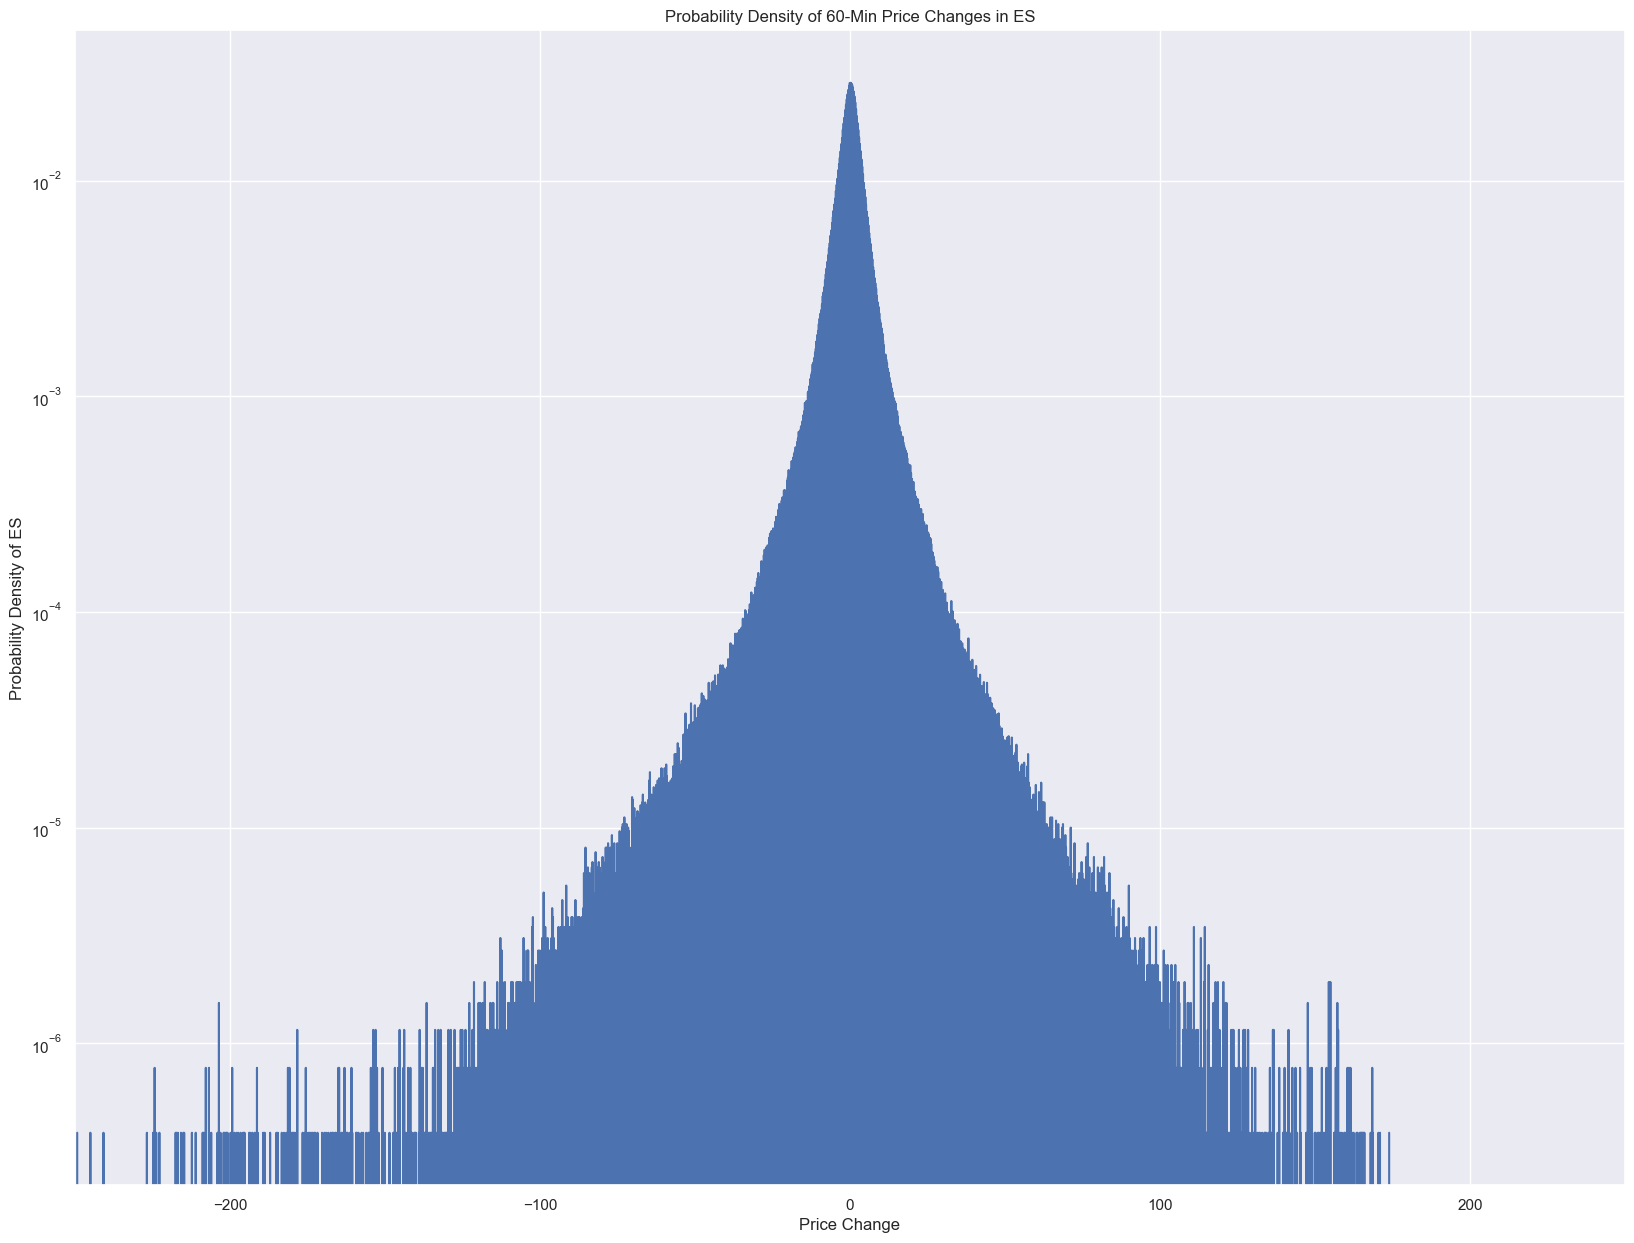

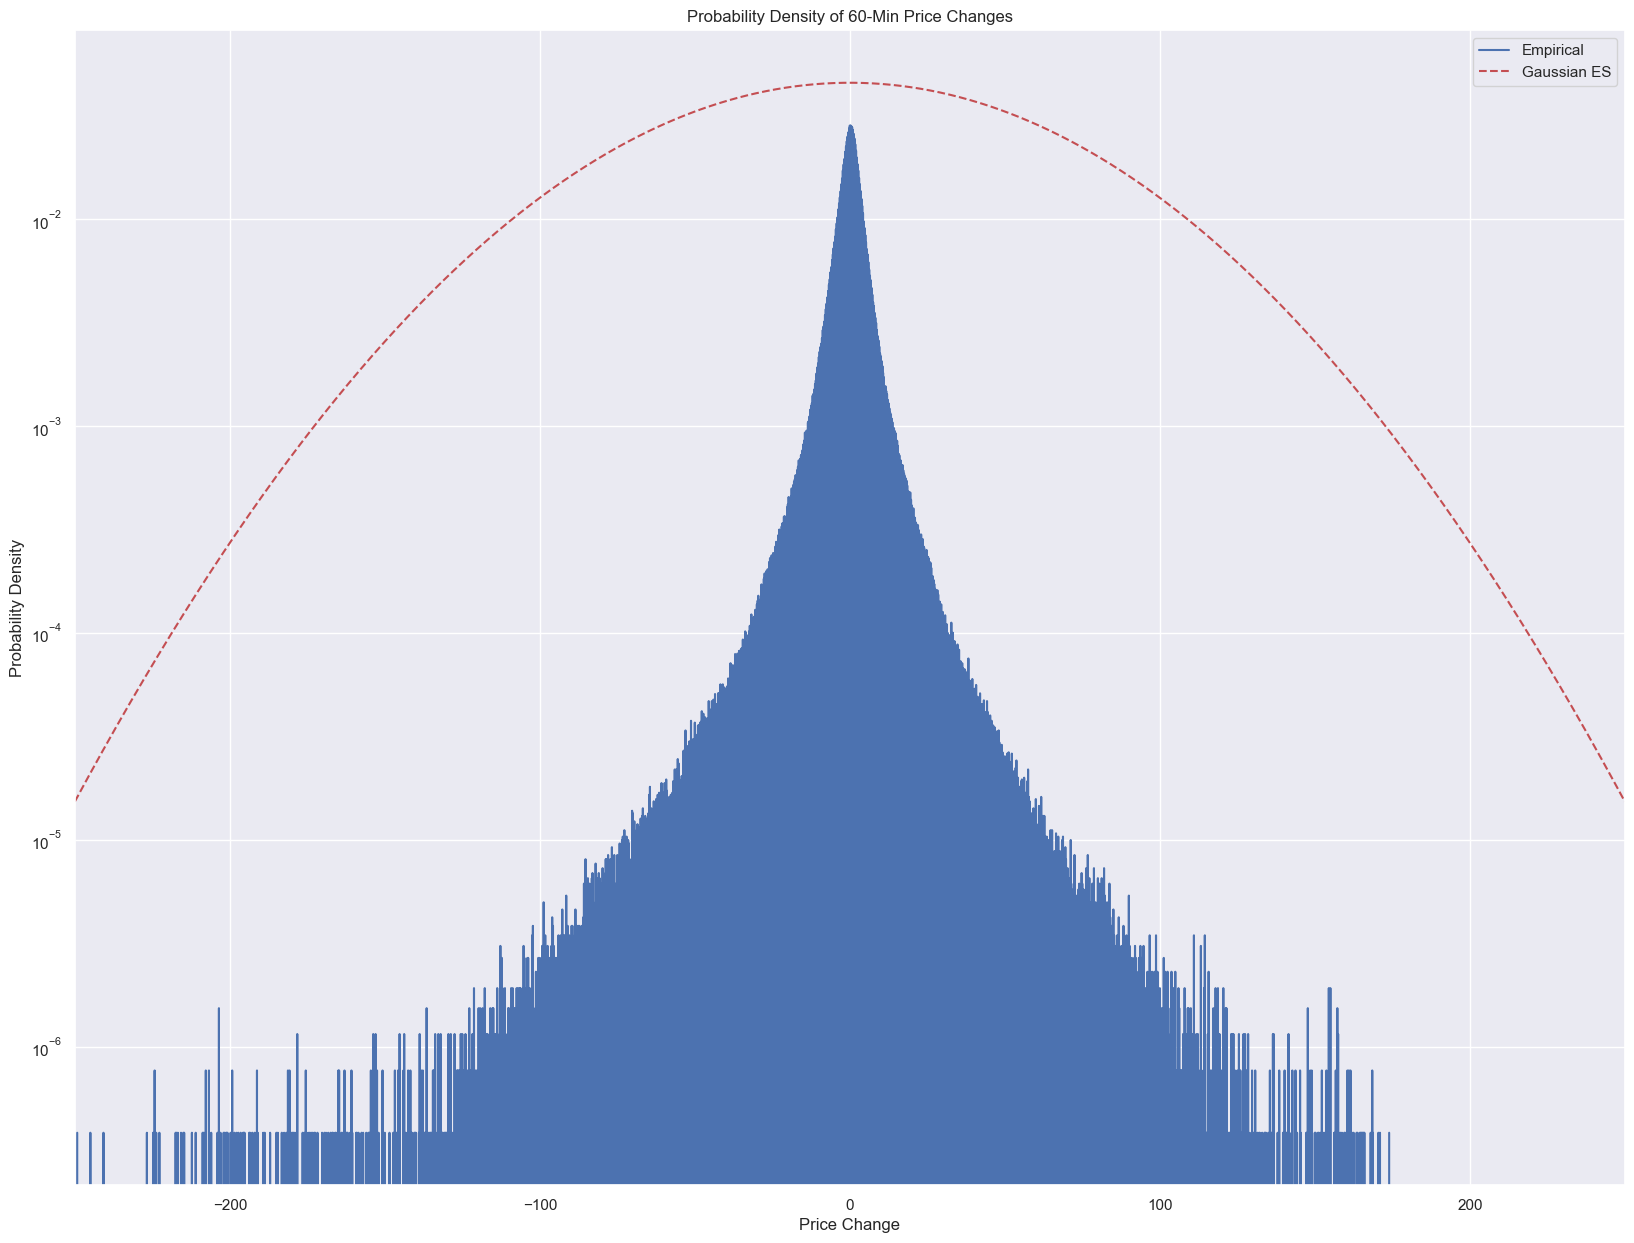

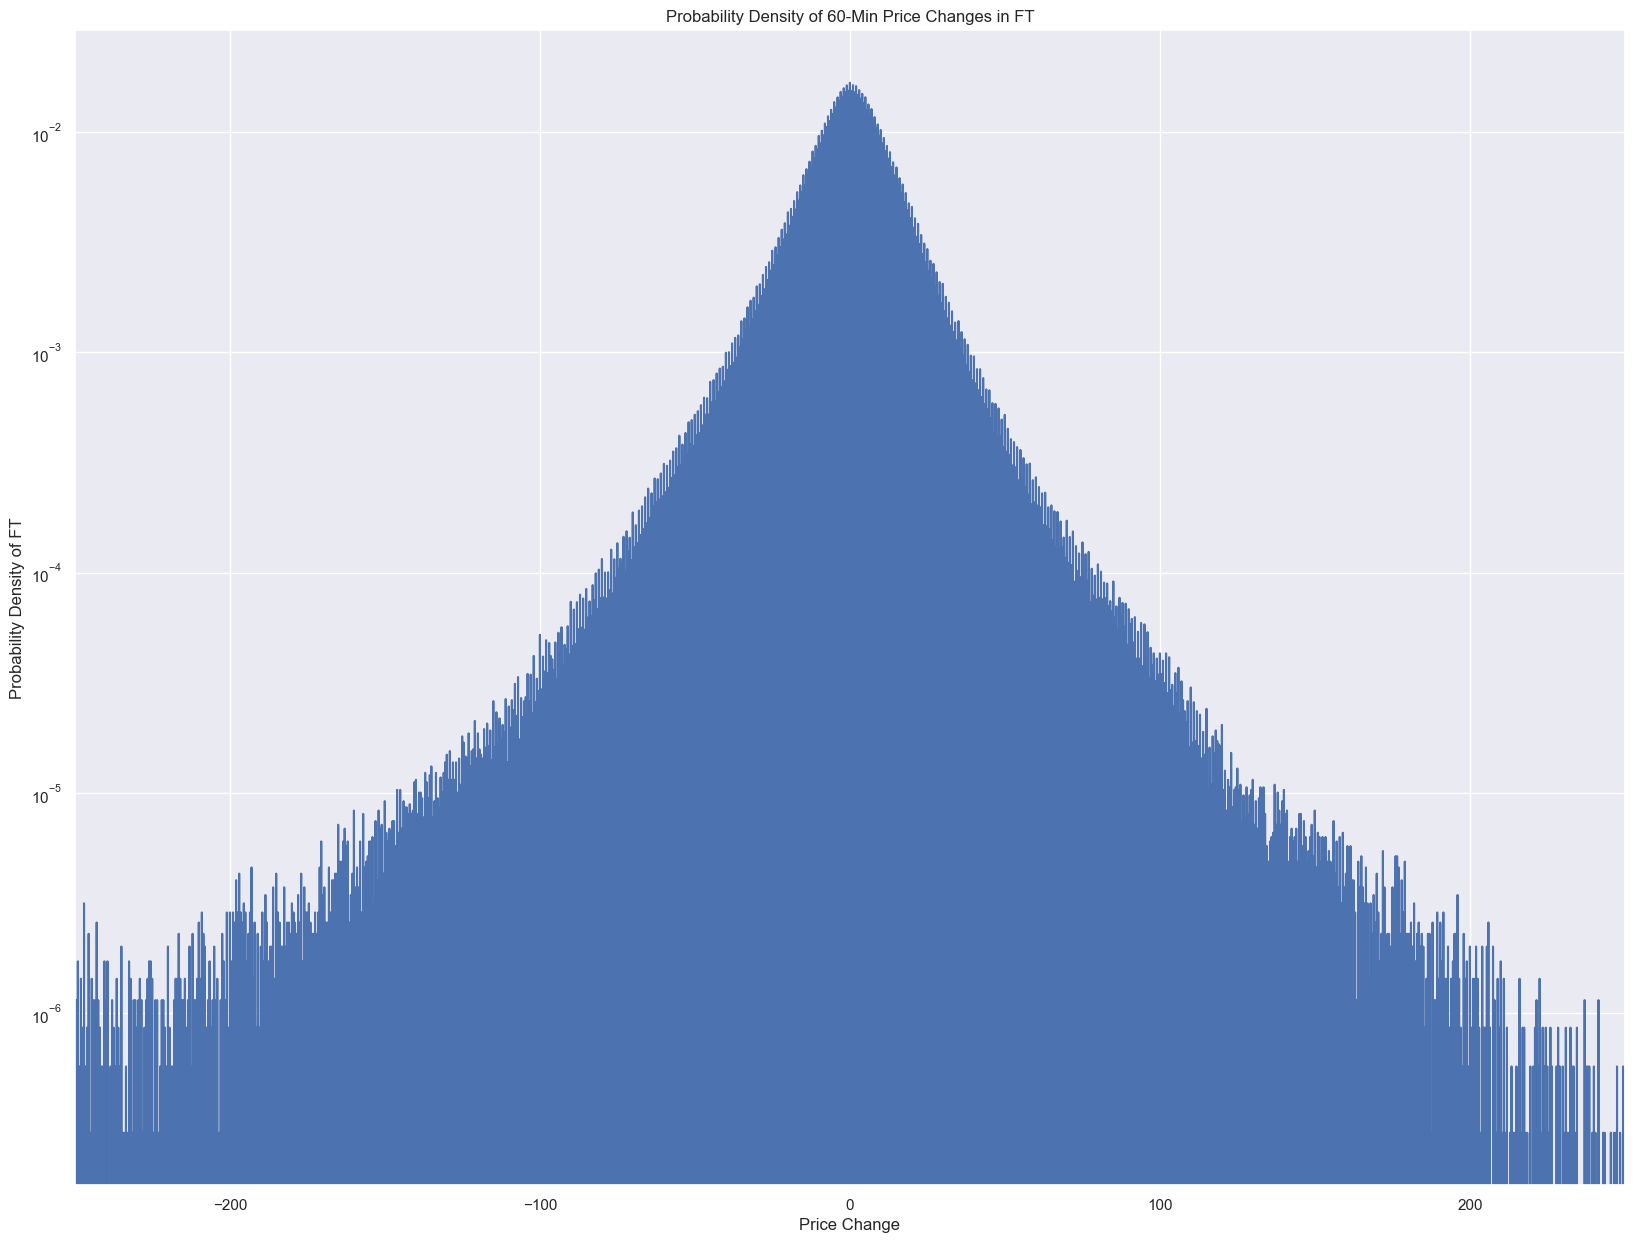

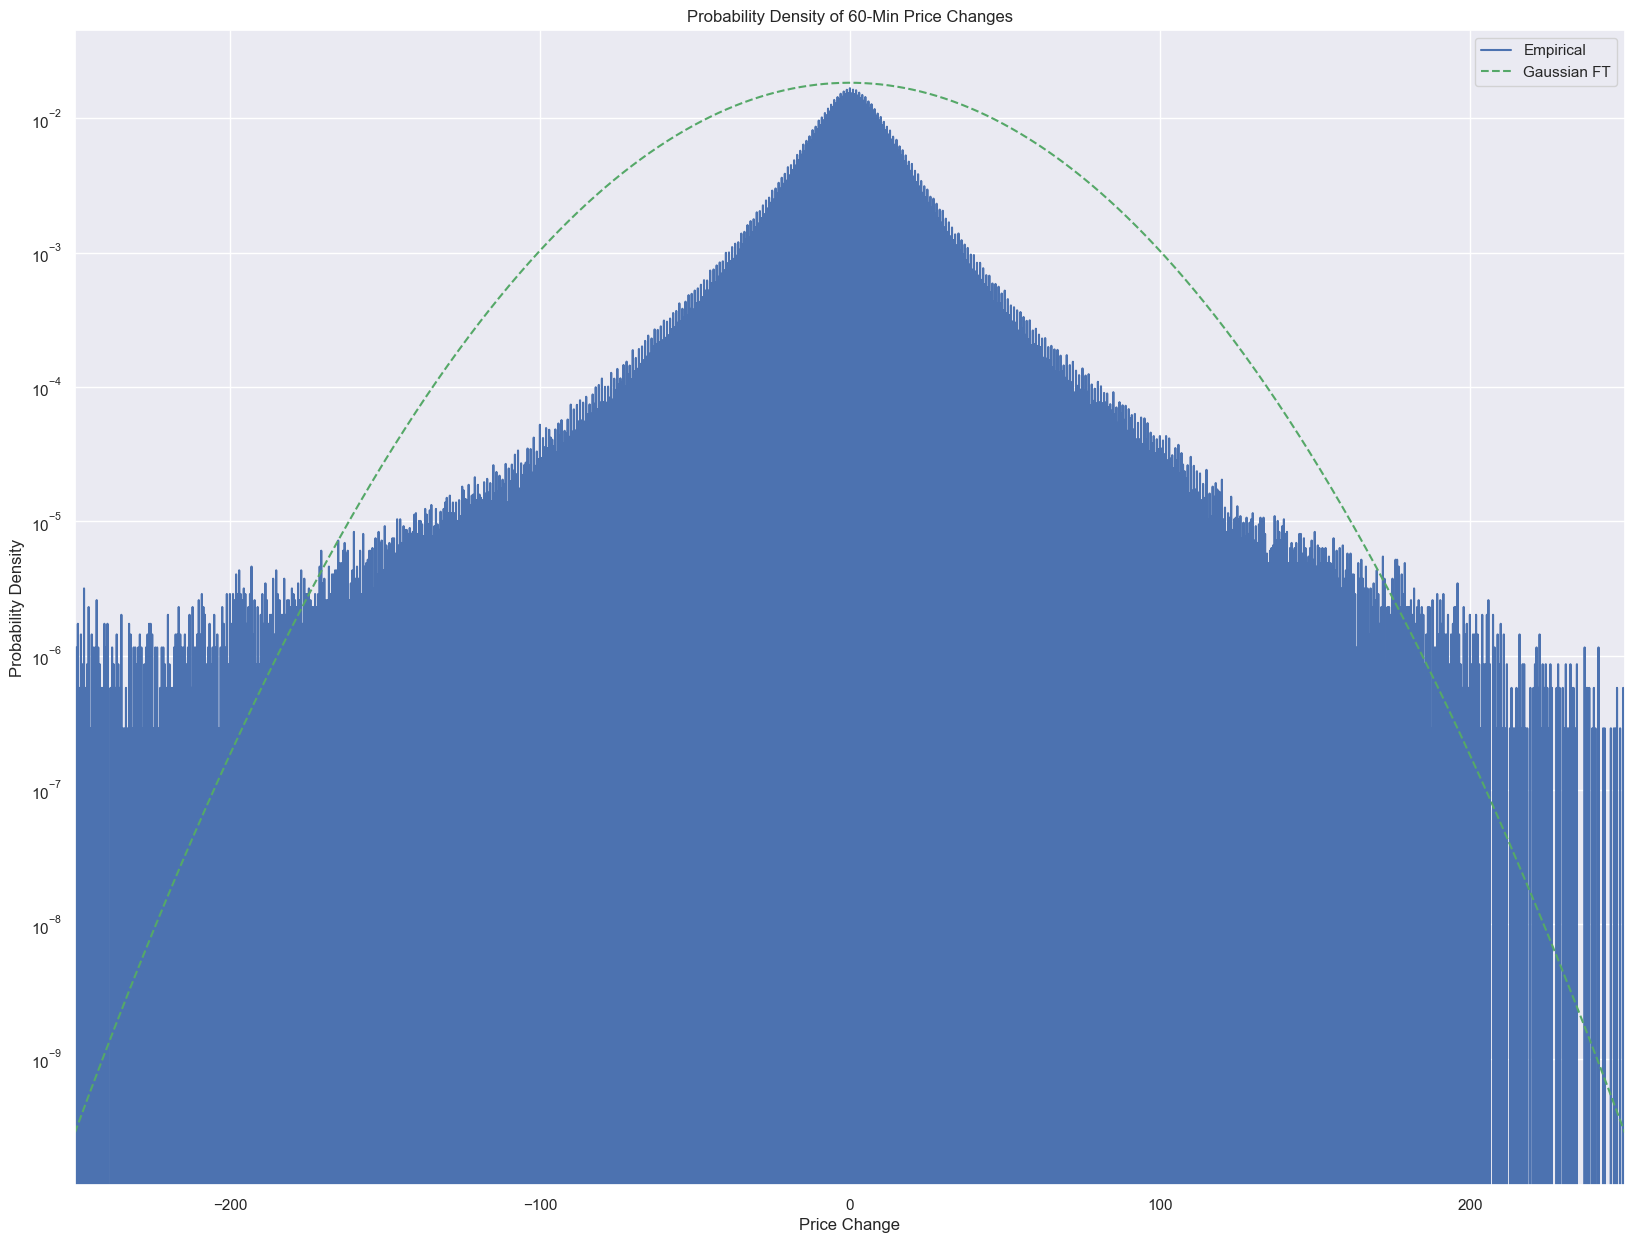

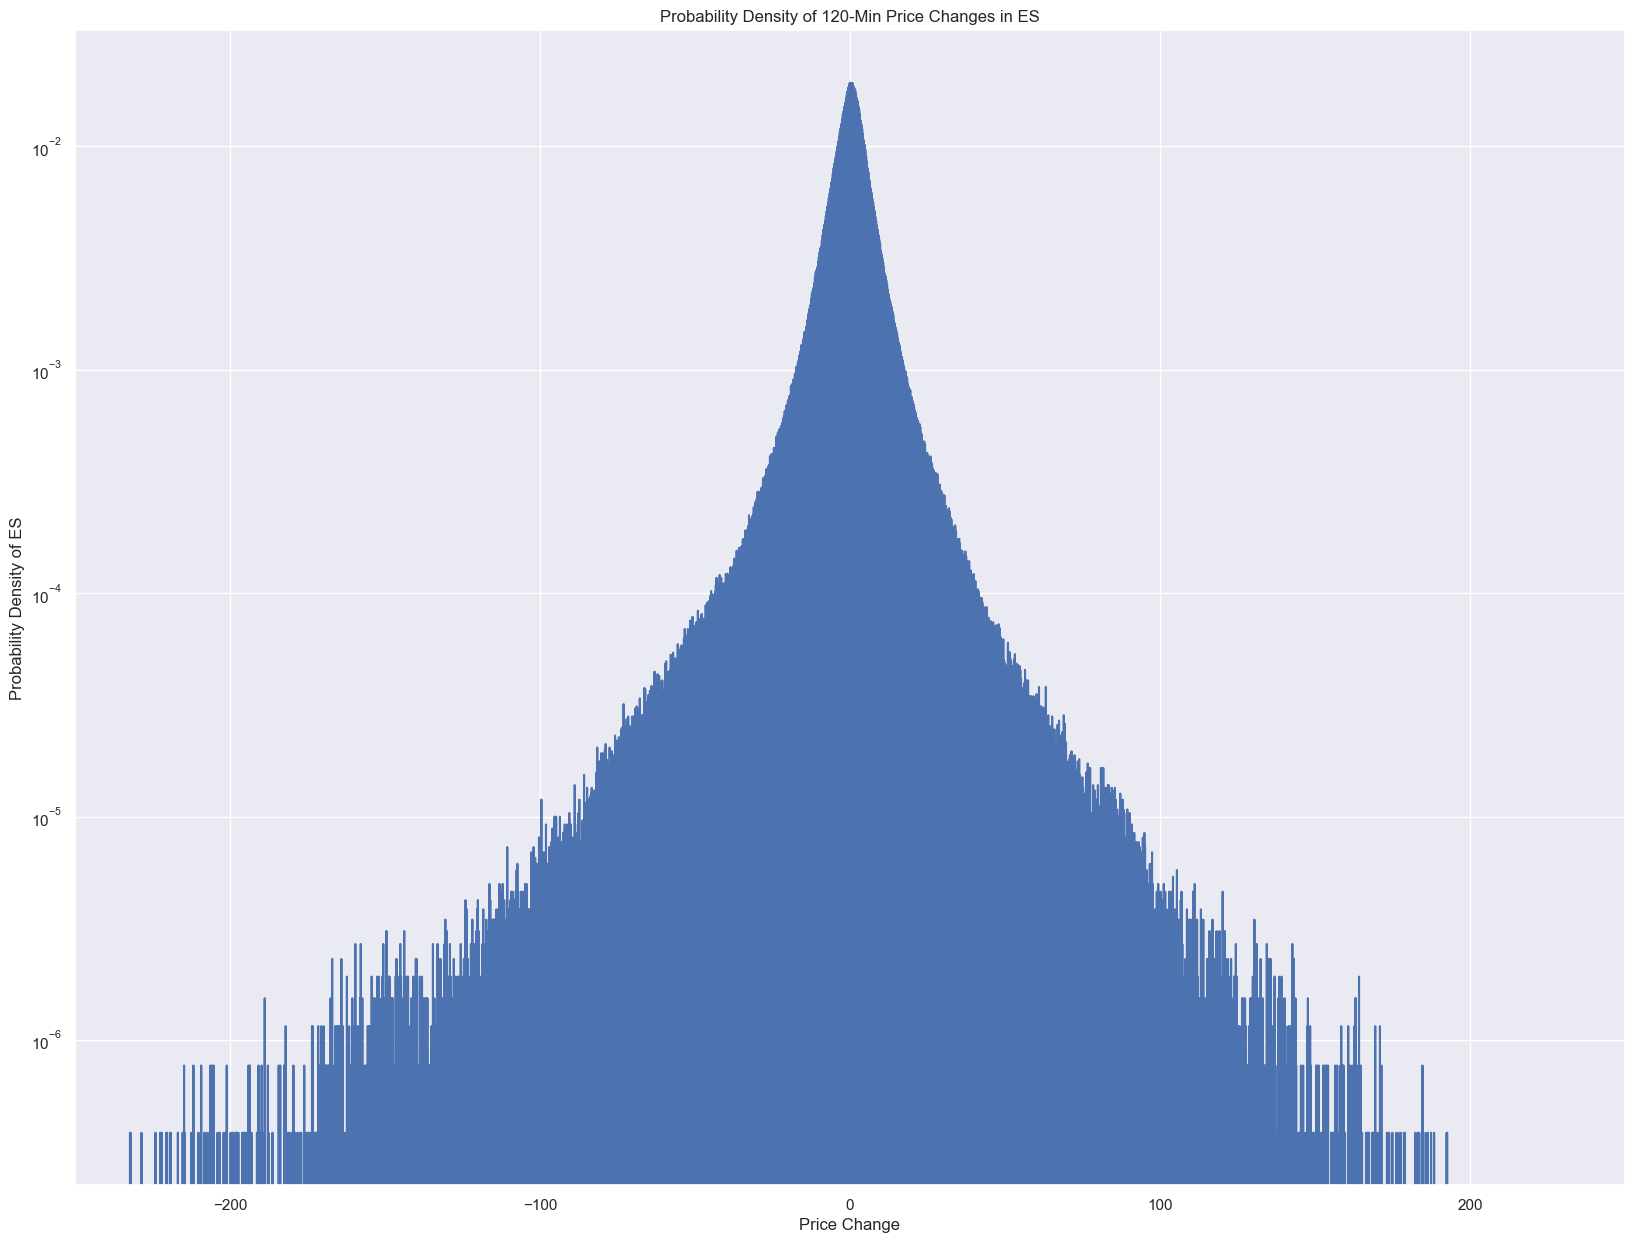

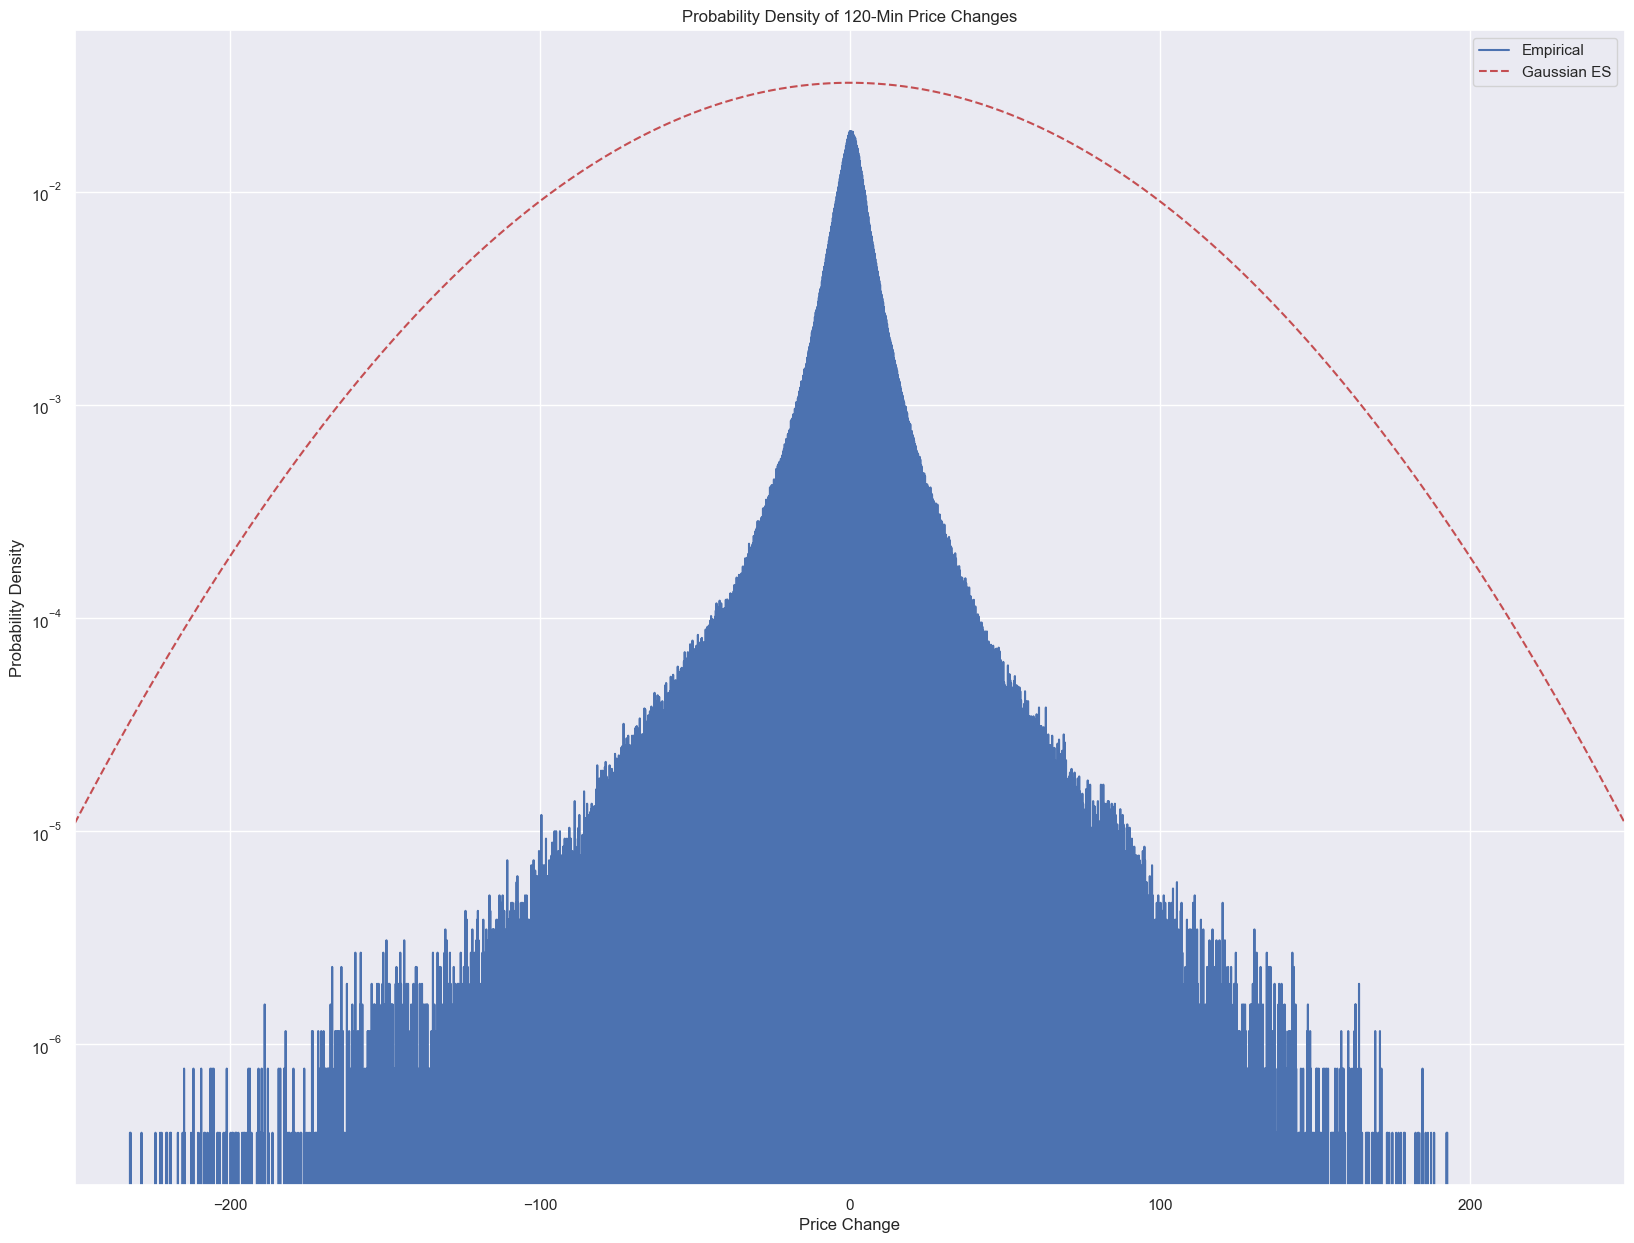

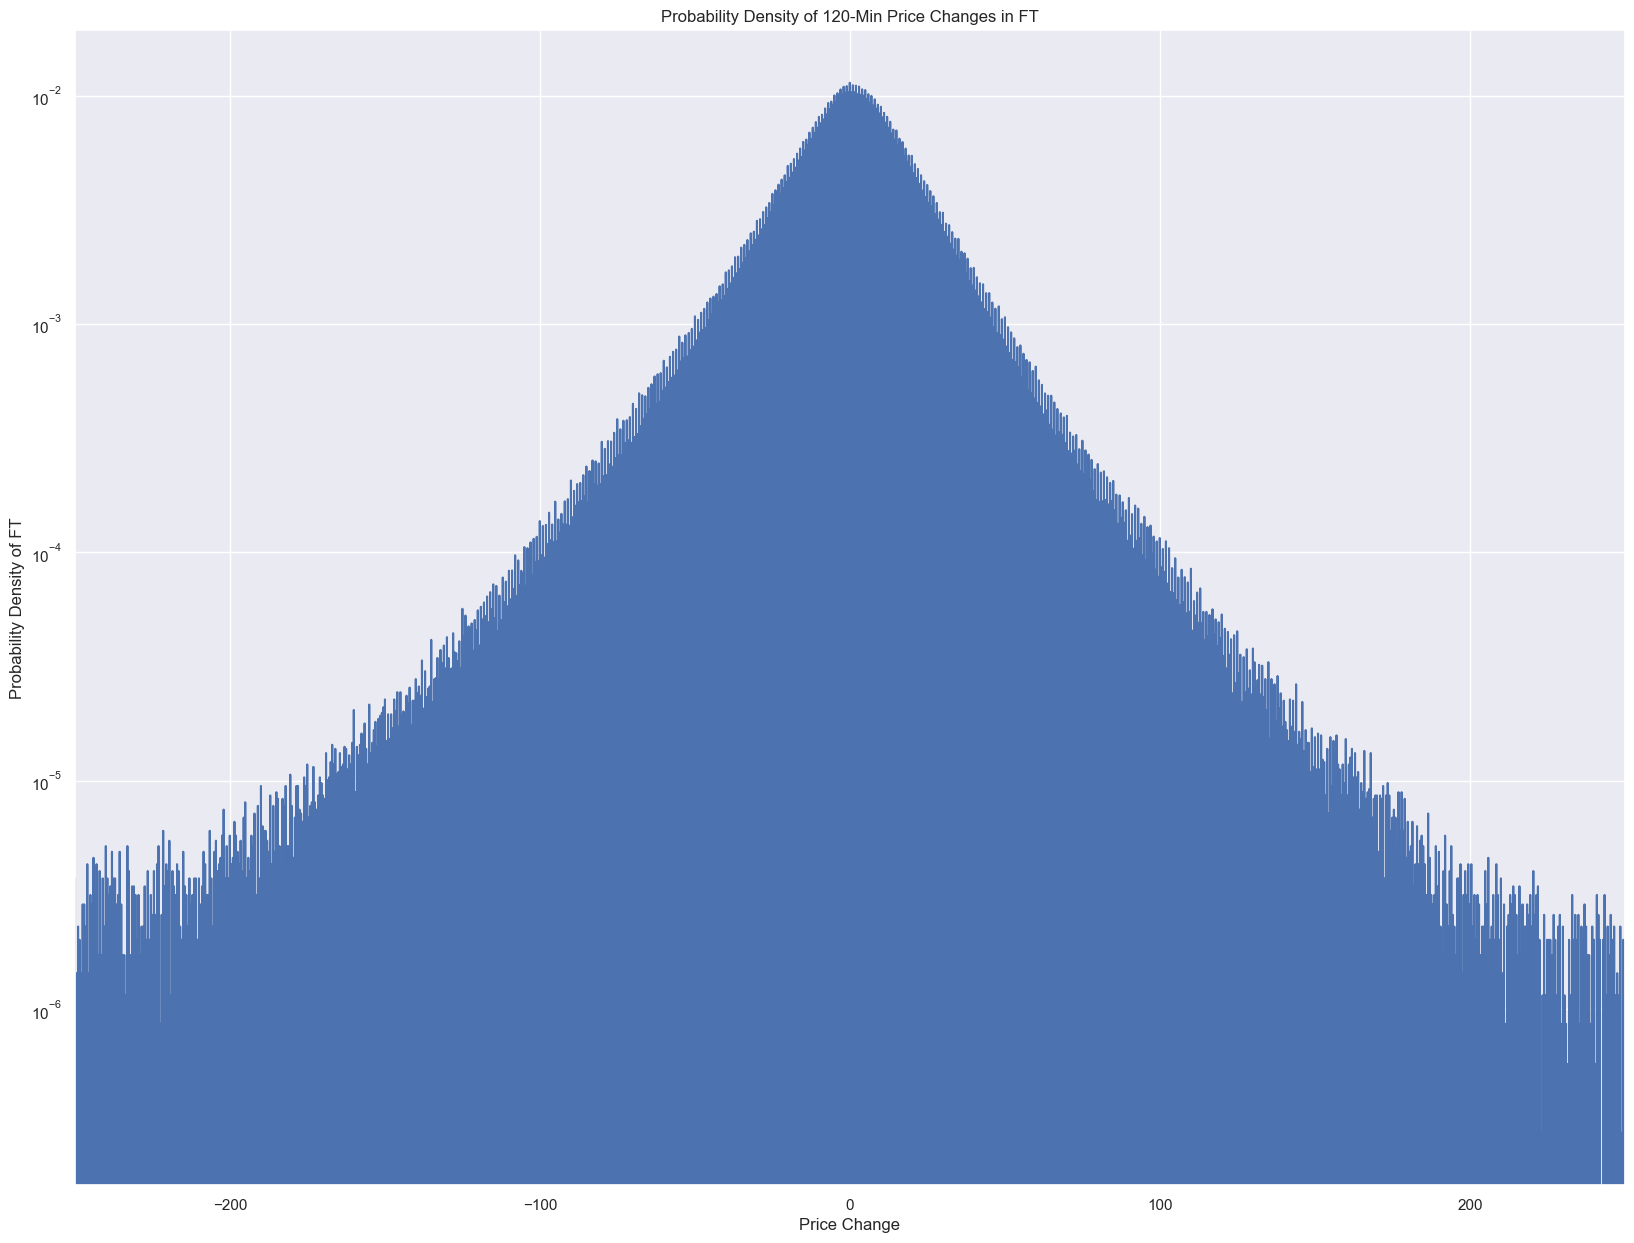

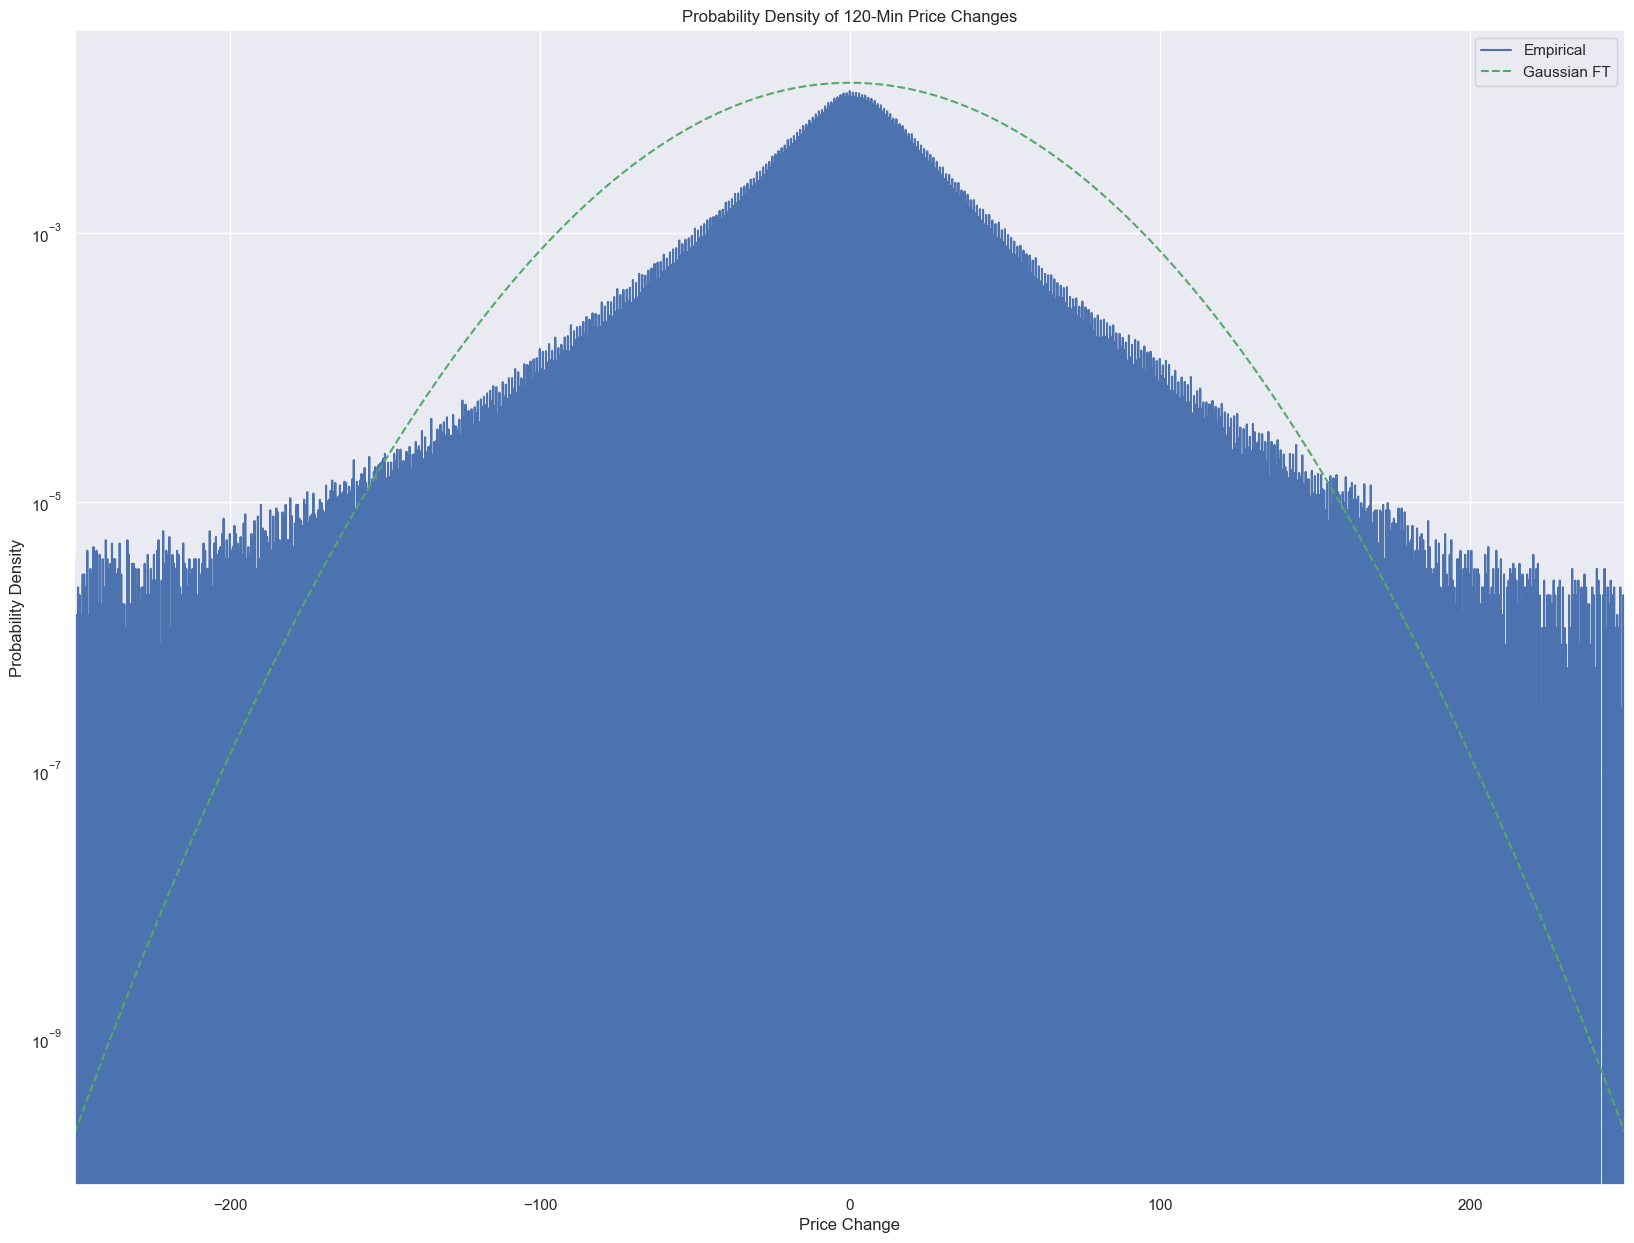

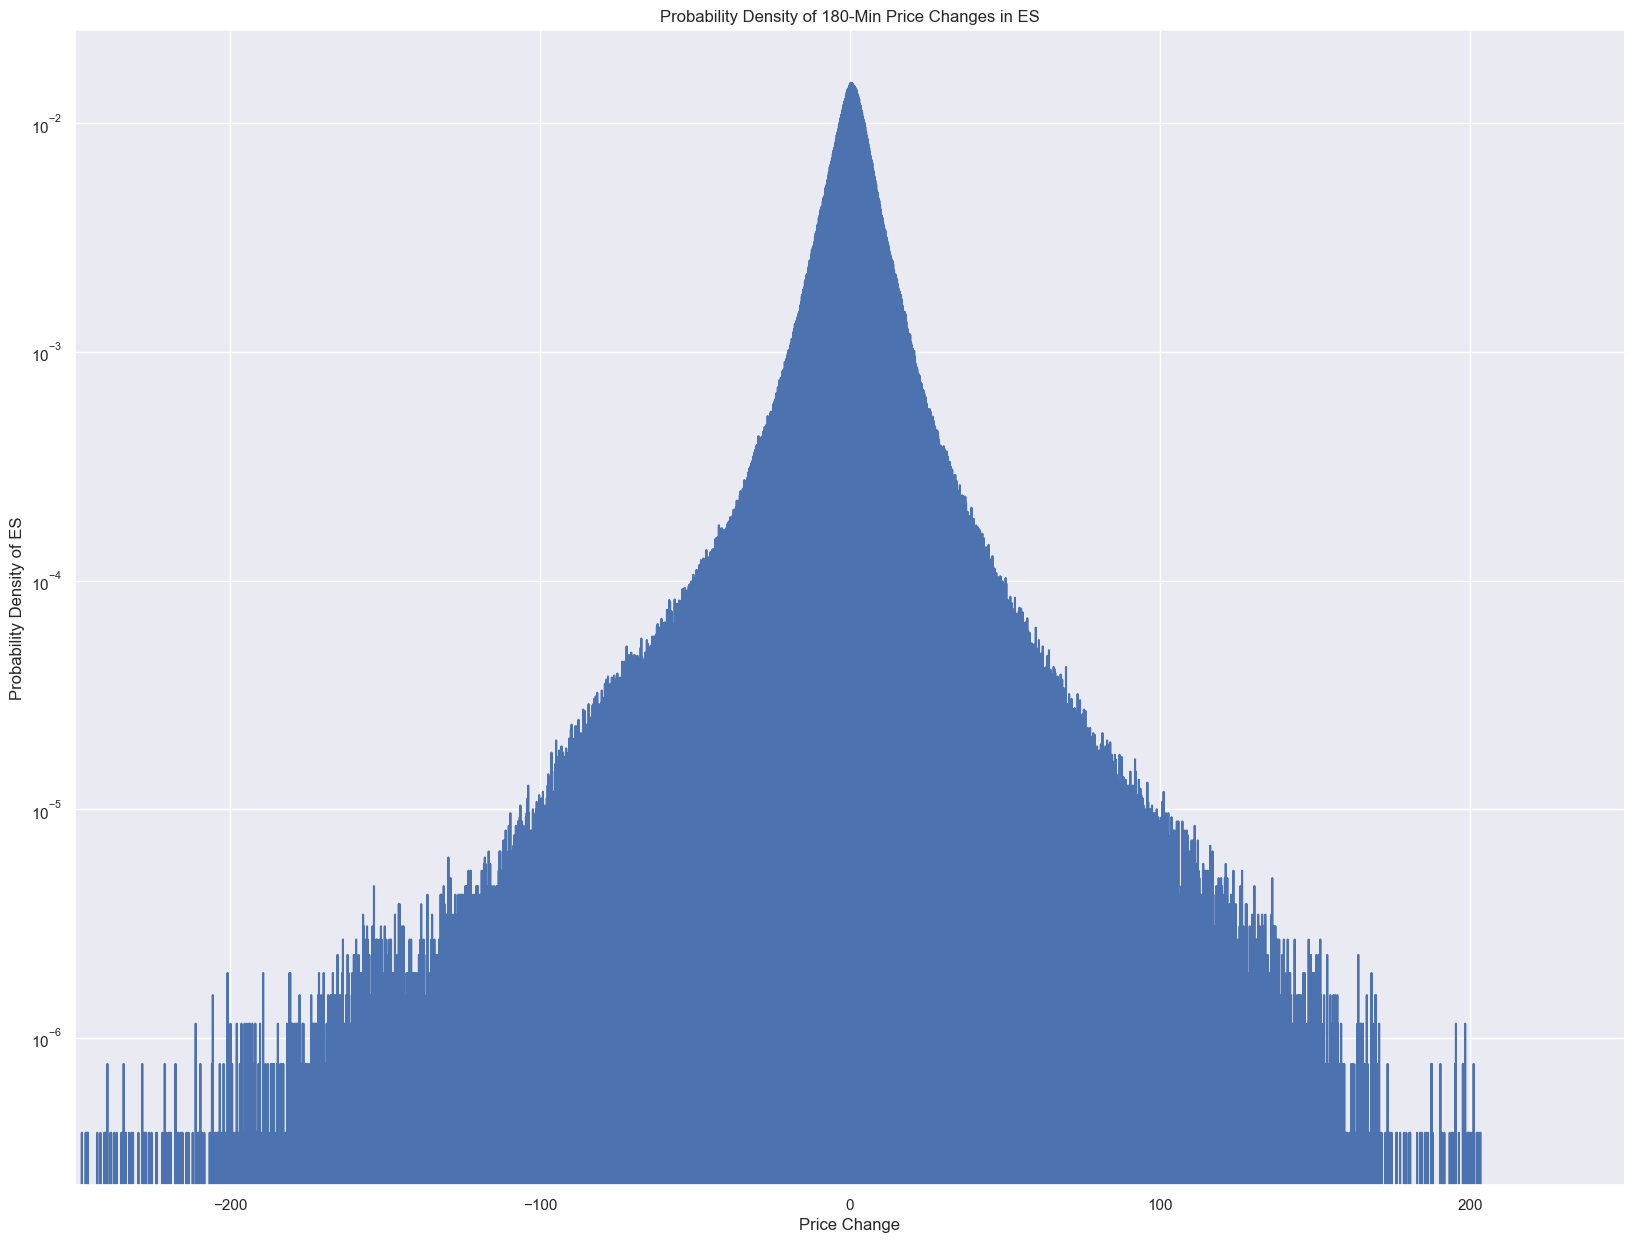

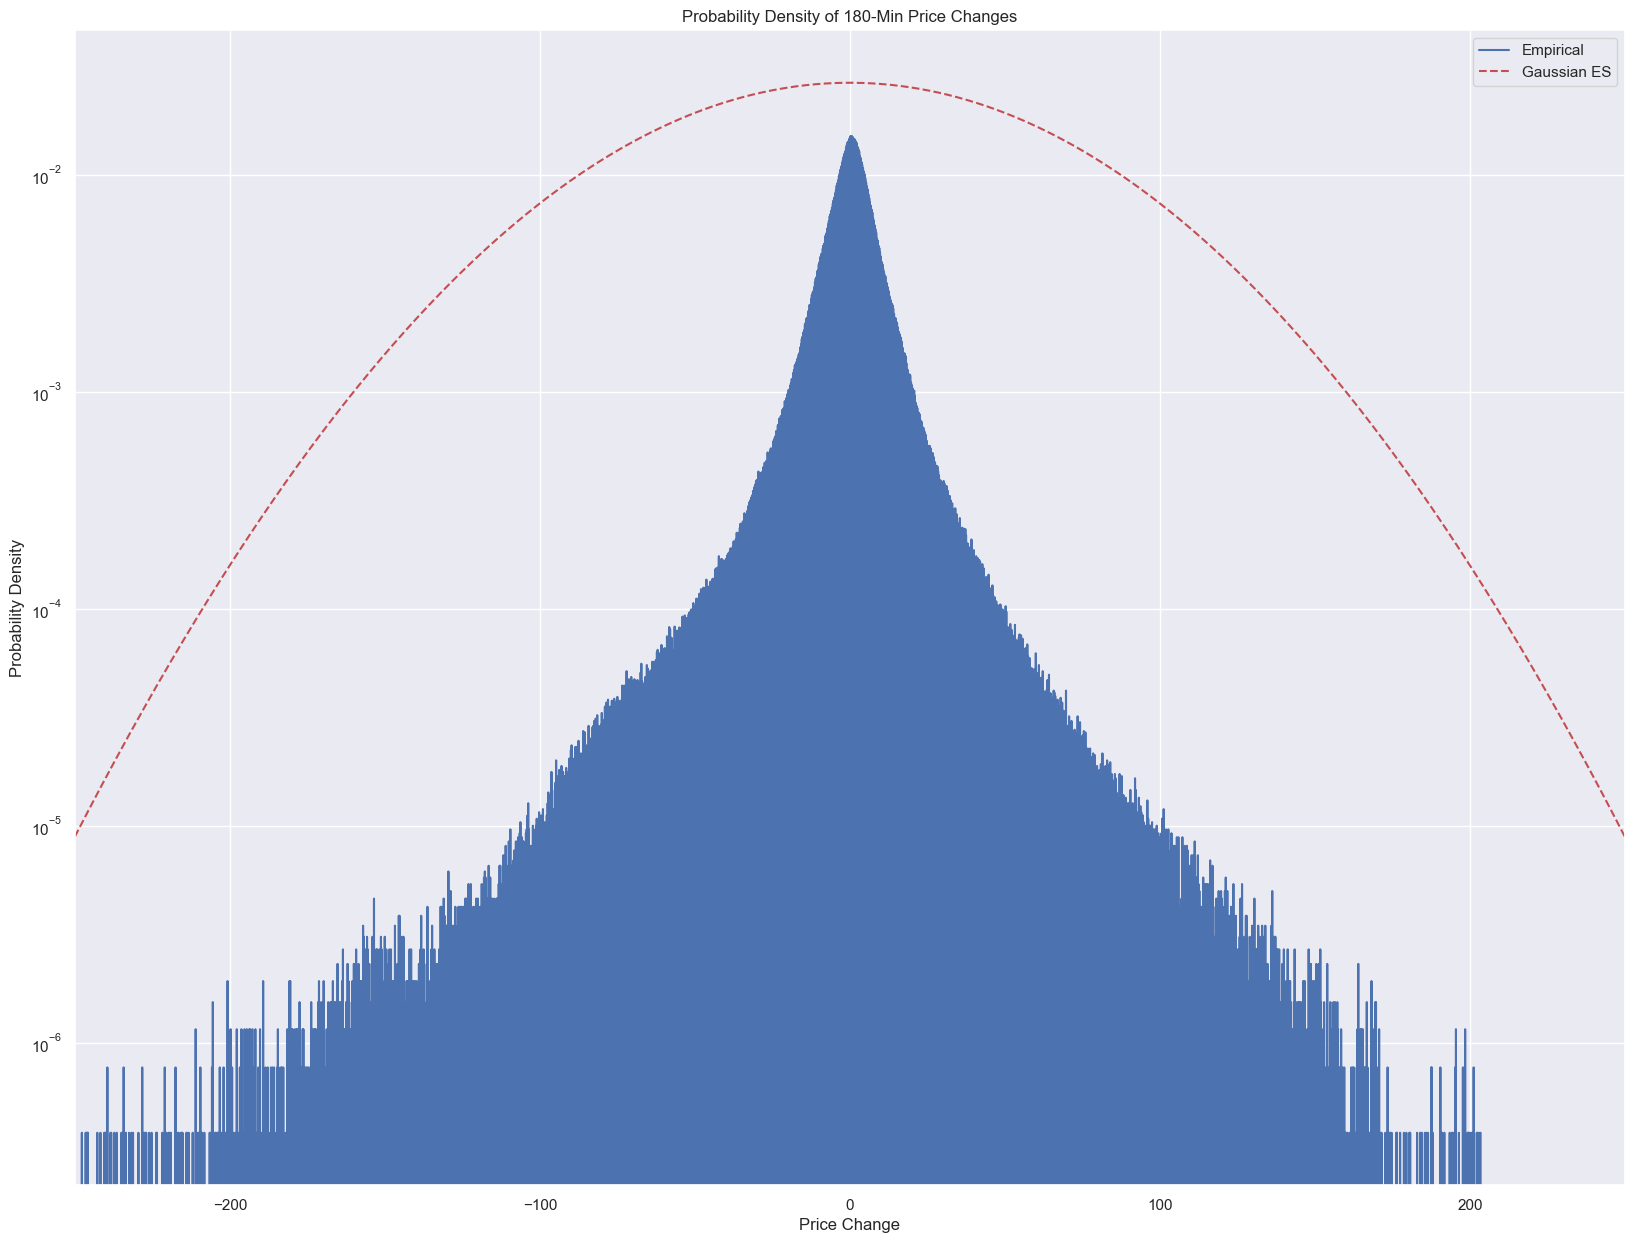

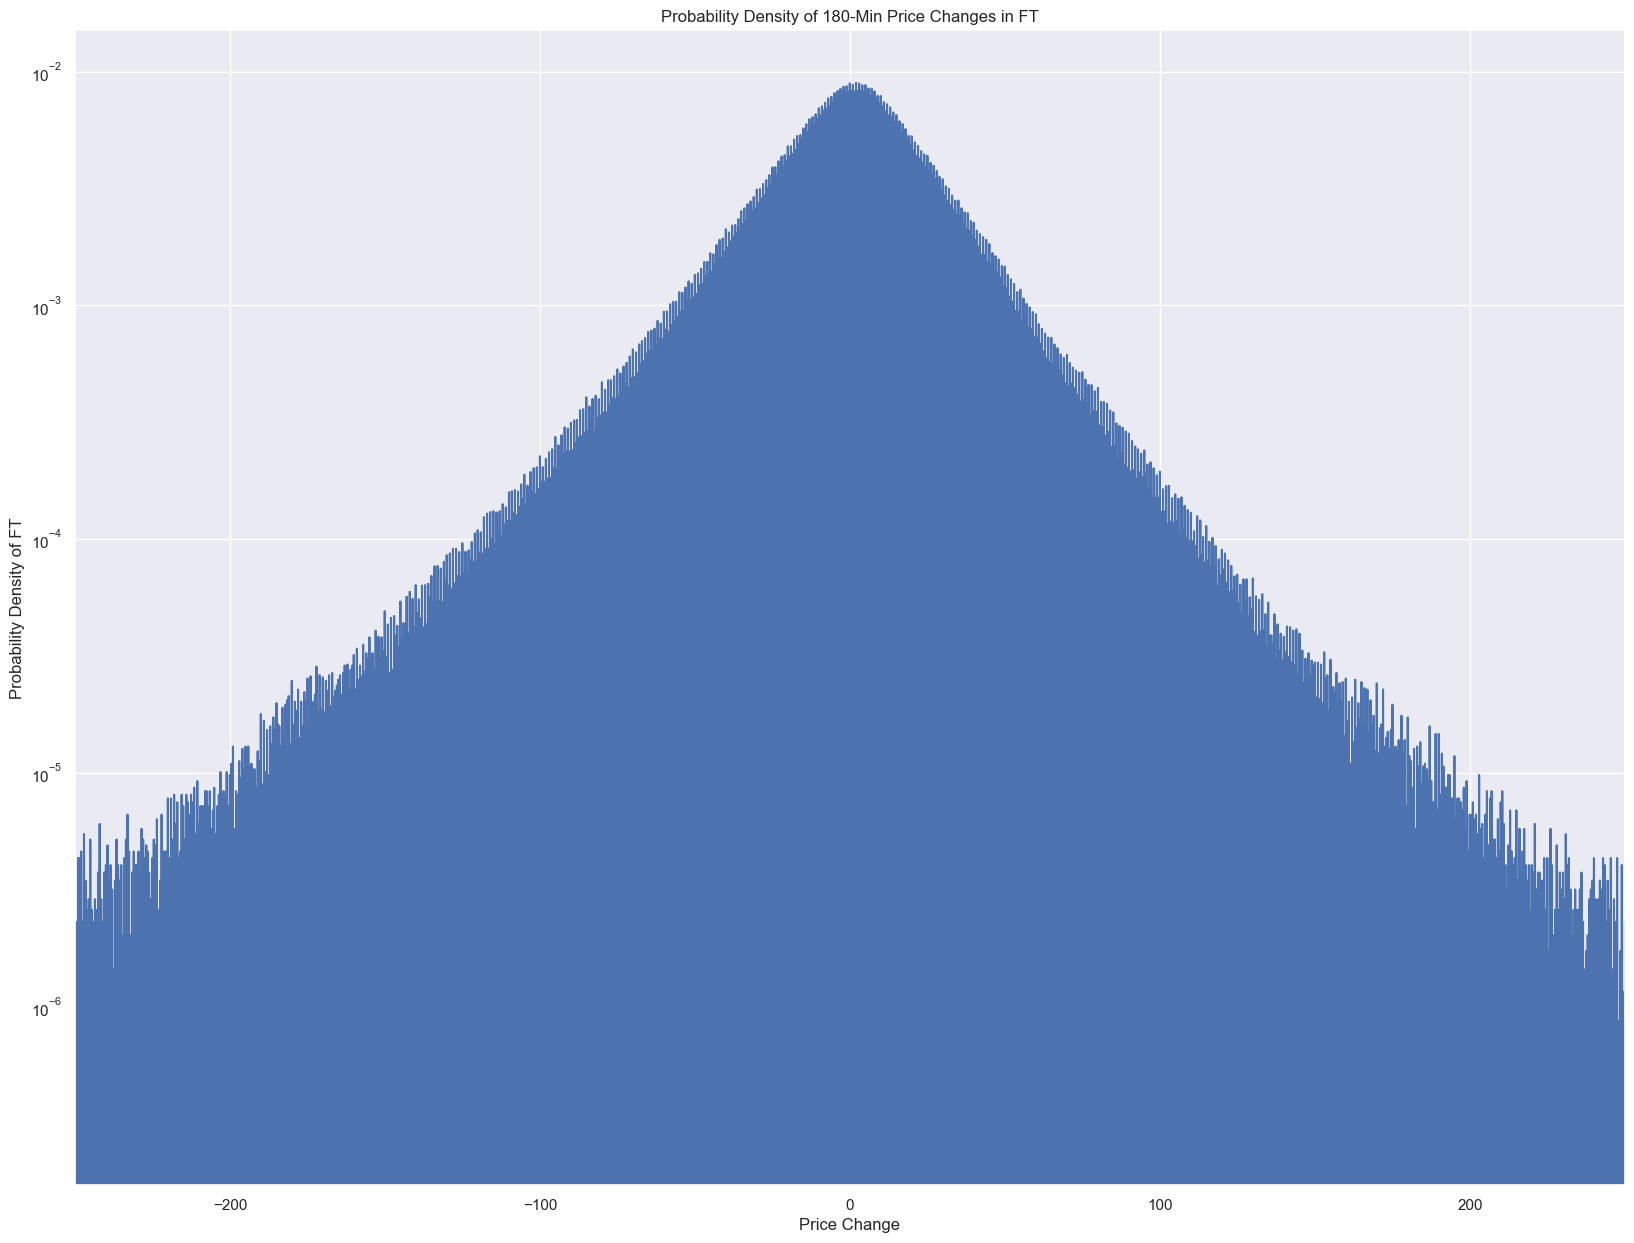

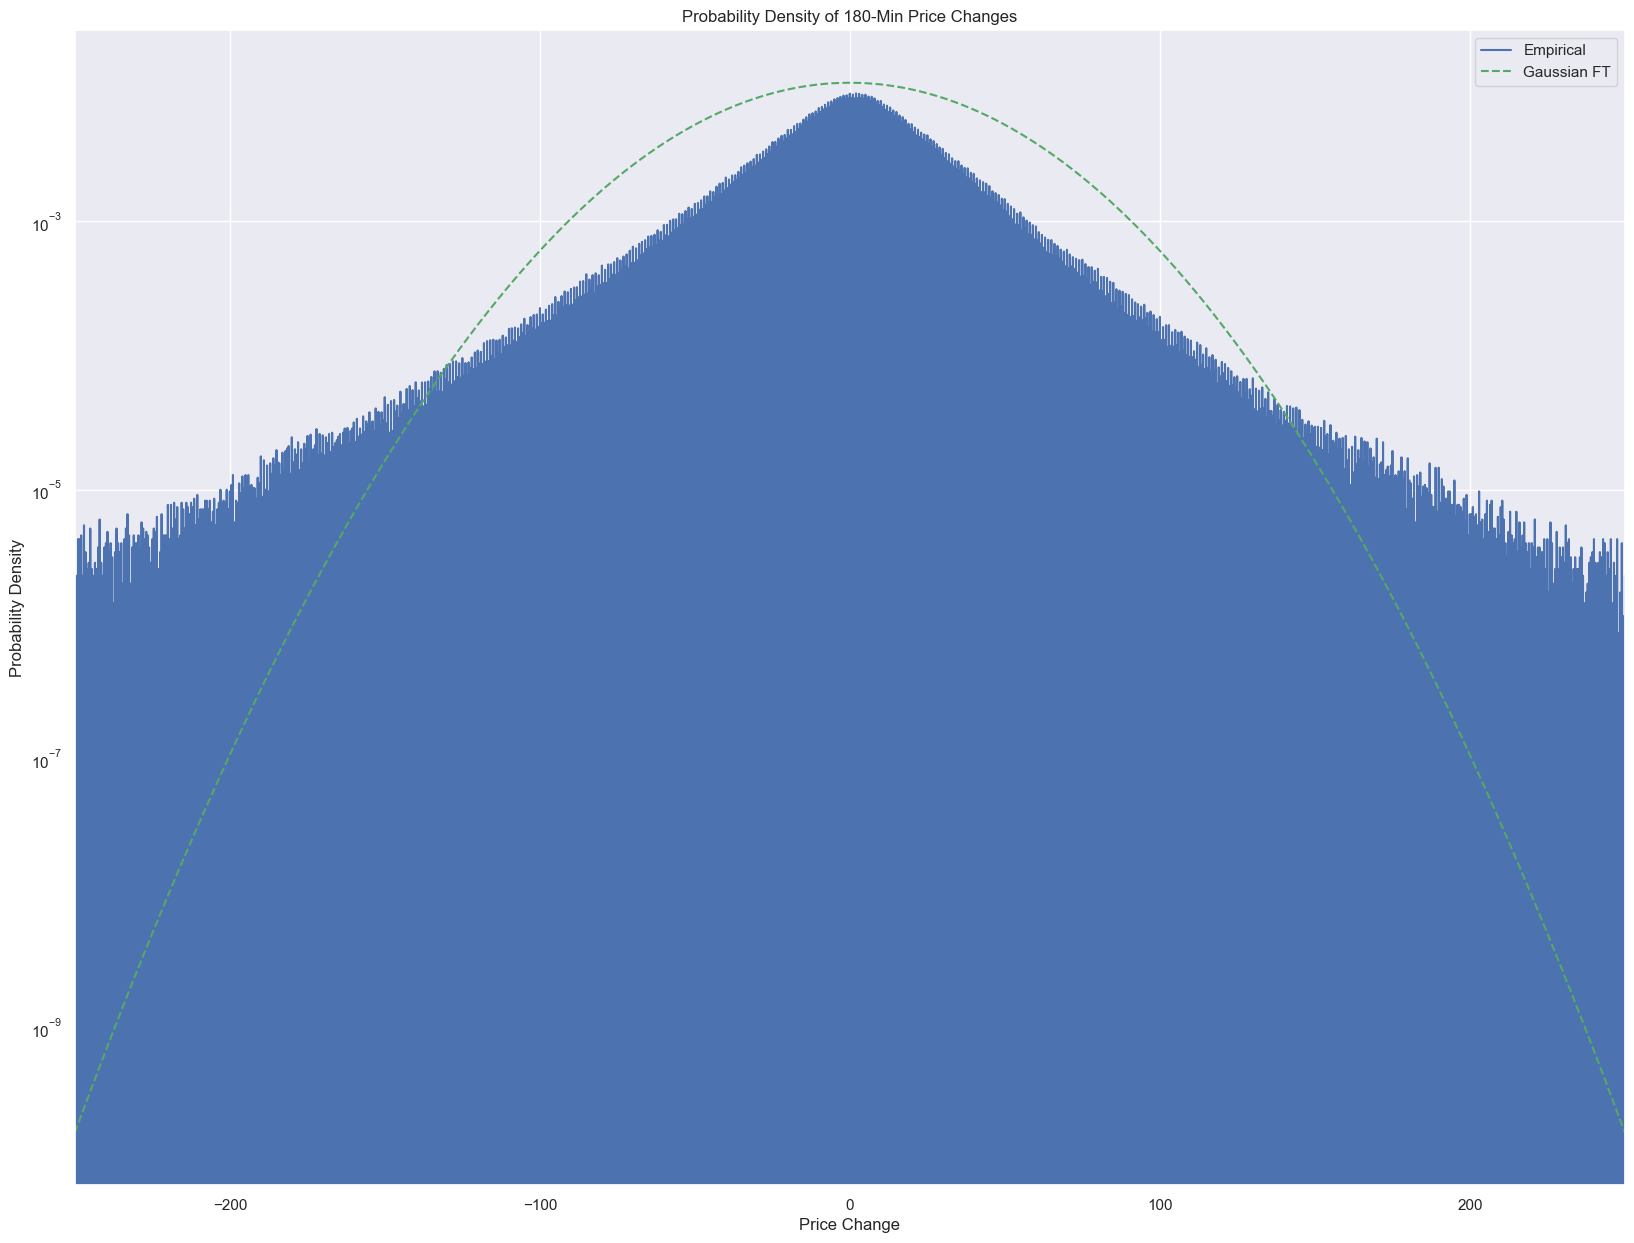

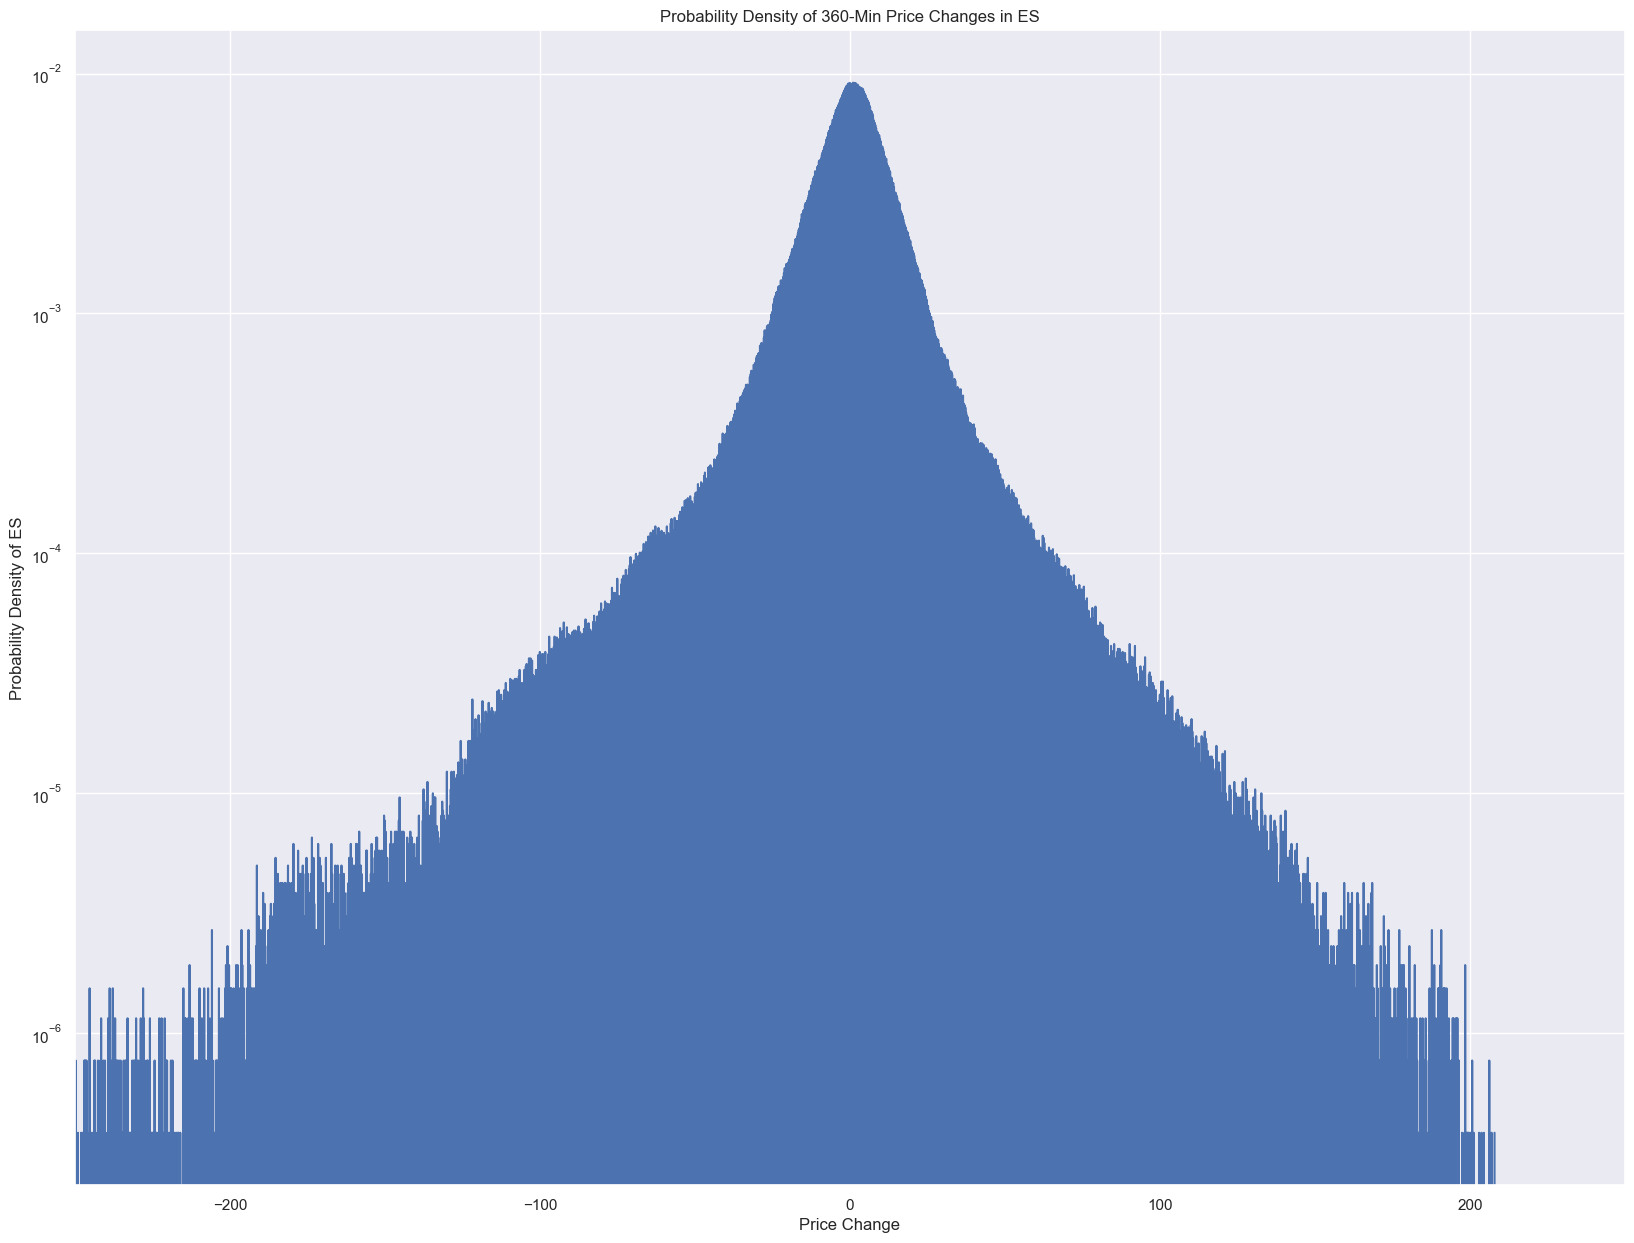

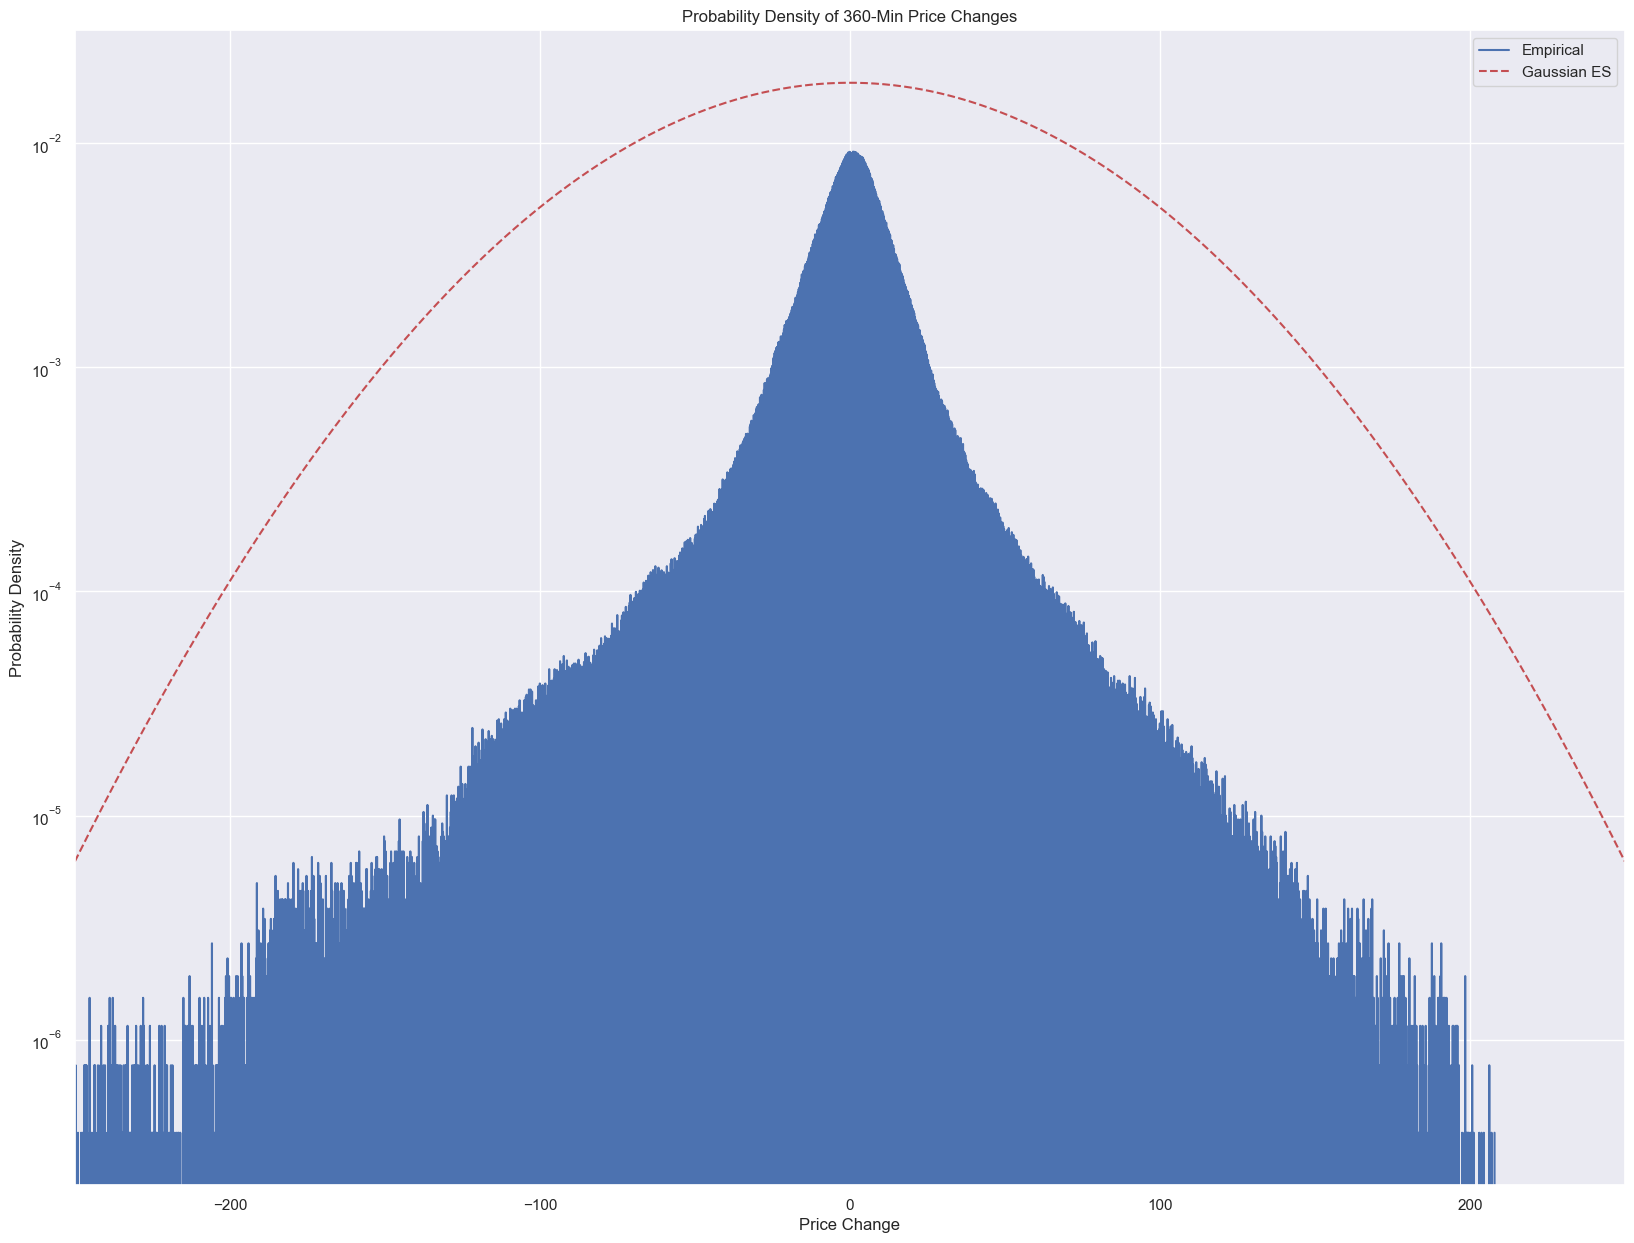

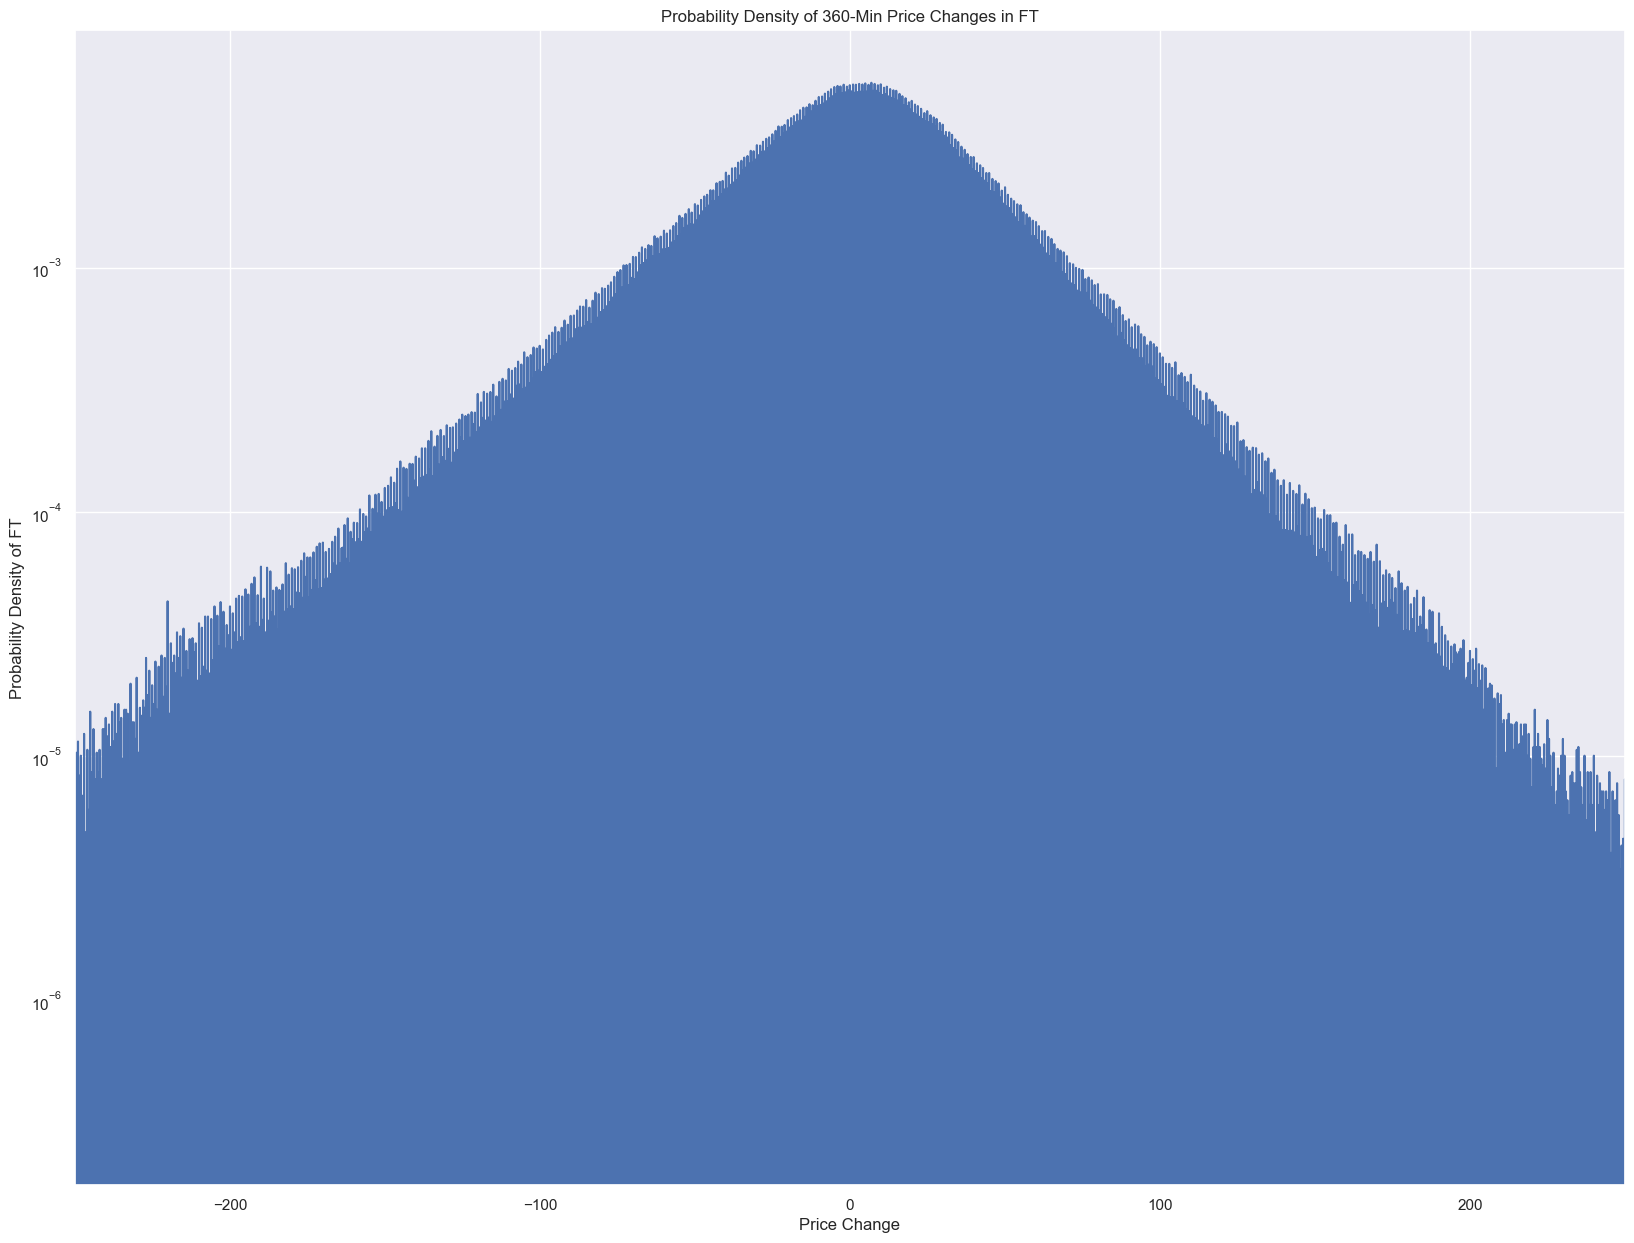

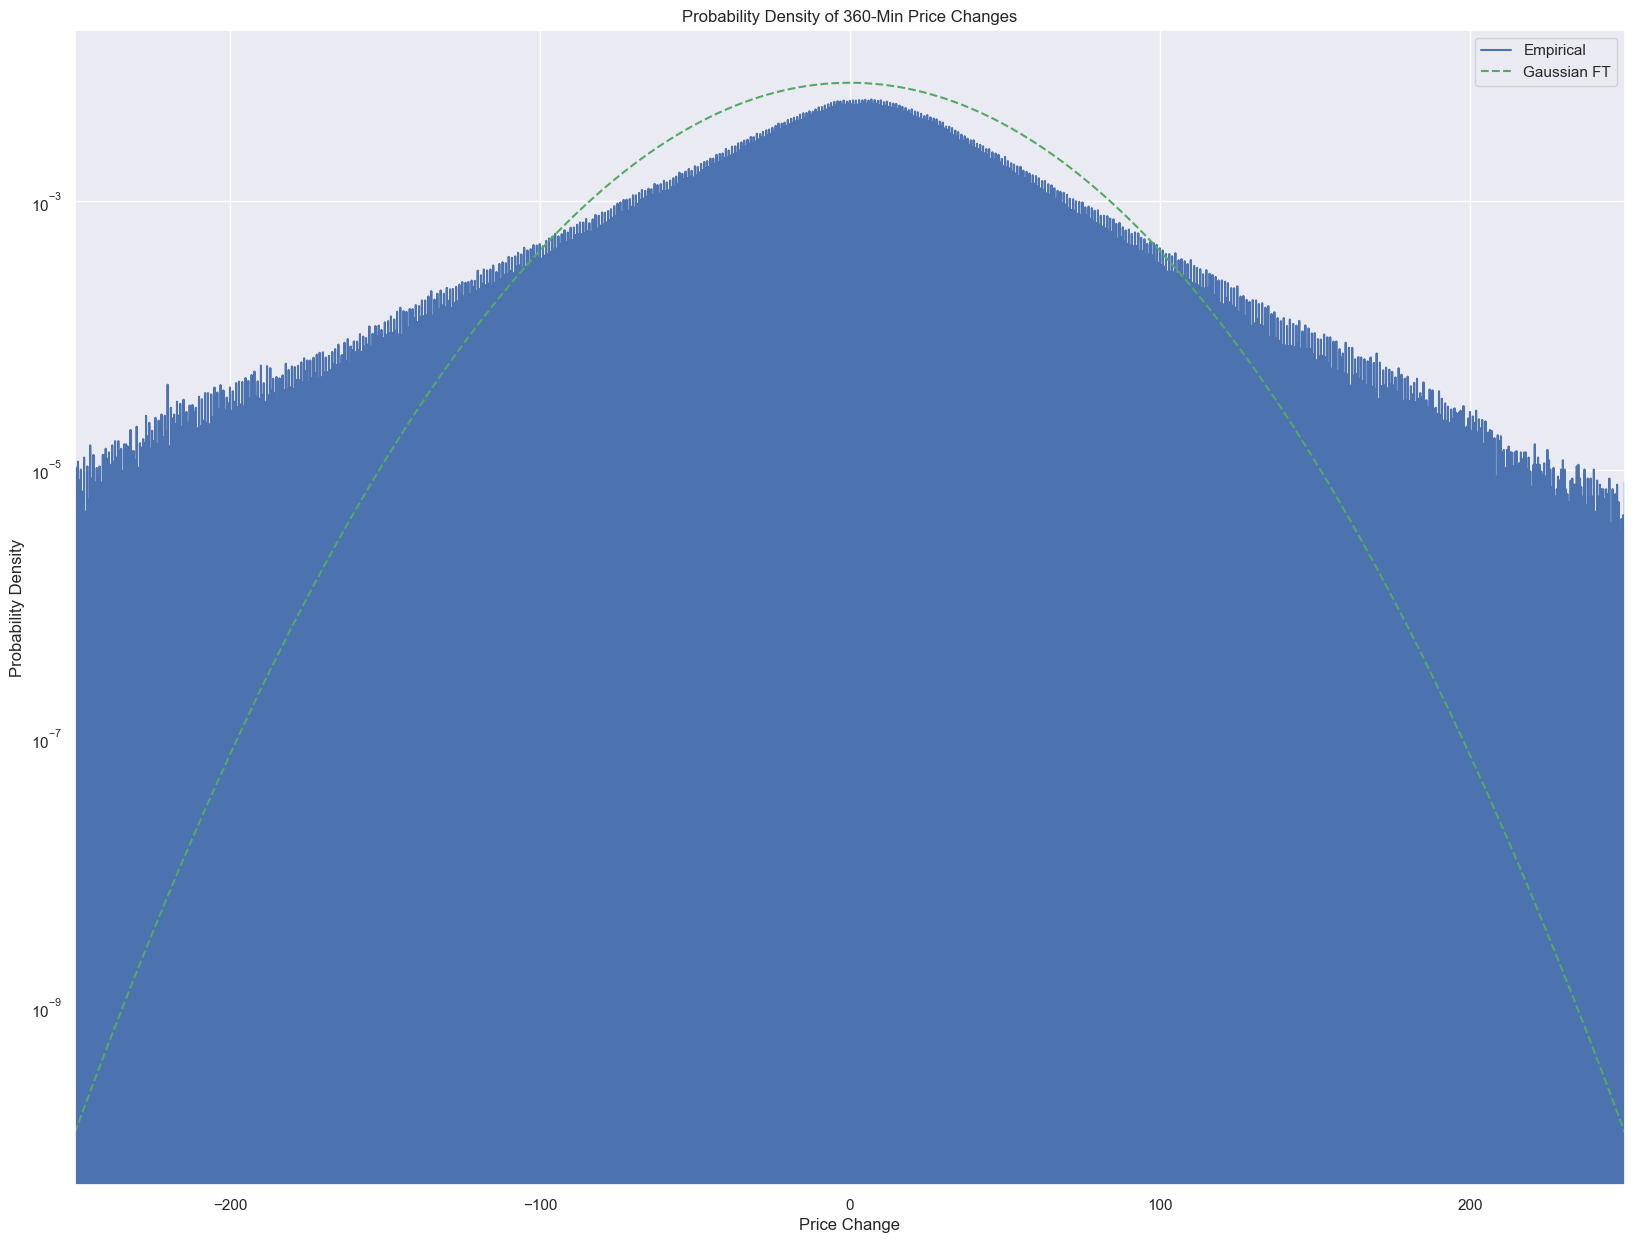

In [12]:
for tau in [5, 30, 60, 120, 180, 360]:
    compute_histogram(ES, FT, tau)